# <center>Optimizing Credit Risk Assessment in BNPL Services: A Comprehensive Analysis of Supervised Learning Models with SMOTE Integration, Spotlighting the Superiority of Cat Boost Algorithm</center>
<center>Ishak Bintang Dikaputra (A11.2021.13763) and Noval Ariyanto (A11.2021.13789)</center>

<center>TEKNIK INFORMATIKA-FAKULTAS ILMU KOMPUTER</center>
<center>UNIVERSITAS DIAN NUSWANTORO SEMARANG</center><br>

![Flow.jpg](../Image/Flow.png)

### **LOAD LIBARY**

In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score, classification_report, roc_curve, auc, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold, cross_val_predict
import time
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### **LOAD DATASET**

In [3]:
data_eda_var = pd.read_csv('../Dataset/variable_description.csv')
data_train = pd.read_csv('../Dataset/train.csv')
data_test = pd.read_csv('../Dataset/test.csv')

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

column_select_var = ['Columns', 'Description']
data_eda_var[column_select_var]

Columns  \
0                        U_ID   
1                        FLAG   
2               CONTRACT_TYPE   
3                      GENDER   
4             NUM_OF_CHILDREN   
5                      INCOME   
6             APPROVED_CREDIT   
7                LOAN_ANNUITY   
8               PRODUCT_PRICE   
9             INCOME_CATEGORY   
10                  EDUCATION   
11              FAMILY_STATUS   
12           HOUSING_CATEGORY   
13                   DAYS_AGE   
14                  DAYS_WORK   
15          DAYS_REGISTRATION   
16       DAYS_SINCE_ID_CHANGE   
17                 APPLY_DAYS   
18                 APPLY_HOUR   
19      ORGANIZATION_CATEGORY   
20           EXTERNAL_SCORE_1   
21           EXTERNAL_SCORE_2   
22           EXTERNAL_SCORE_3   
23                 LN_ID_PREV   
24                       U_ID   
25              CONTRACT_TYPE   
26               LOAN_ANNUITY   
27                APPLICATION   
28            APPROVED_CREDIT   
29           AMT_DOWN_PAYMENT   
30              PRODUCT_PRICE   
31                 APPLY_DAYS   
32                 APPLY_HOUR   
33            CONTRACT_STATUS   
34              DAYS_DECISION   
35               TERM_PAYMENT   
36                YIELD_GROUP   
37                 FIRST_DRAW   
38                  FIRST_DUE   
39                TERMINATION   
40  NFLAG_INSURED_ON_APPROVAL   
41                 LN_ID_PREV   
42                       U_ID   
43                INST_NUMBER   
44                  INST_DAYS   
45                   PAY_DAYS   
46                   AMT_INST   
47                    AMT_PAY   

                                                                                                                                                                                                                                                             Description  
0                                                                                                                                                                                                                                                                Loan ID  
1                                                                                                                                                                                   Target variable (1 - client with late payment more than X days, 0 - all other cases)  
2                                                                                                                                                                                                                            Identification if loan is cash or revolving  
3                                                                                                                                                                                                                                                   Gender of the client  
4                                                                                                                                                                                                                                      Number of children the client has  
5                                                                                                                                                                                                                                           Monthly income of the client  
6                                                                                                                                                                                                                                     Approved credit amount of the loan  
7                                                                                                                                                                                                                        Loan annuity (amount that must be paid monthly)  
8

In [5]:
data_train.head()

U_ID  FLAG    CONTRACT_TYPE GENDER  NUM_OF_CHILDREN    INCOME  \
0  333538     0  Revolving loans      F                1   67500.0   
1  406644     0       Cash loans      F                1  202500.0   
2  259130     0       Cash loans      F                0  180000.0   
3  411997     0       Cash loans      M                0  225000.0   
4  241559     0  Revolving loans      M                0  135000.0   

   APPROVED_CREDIT  LOAN_ANNUITY  PRODUCT_PRICE       INCOME_CATEGORY  \
0         202500.0       10125.0       202500.0               Working   
1         976711.5       49869.0       873000.0  Commercial associate   
2         407520.0       25060.5       360000.0             Pensioner   
3         808650.0       26086.5       675000.0         State servant   
4         180000.0        9000.0       180000.0  Commercial associate   

                       EDUCATION         FAMILY_STATUS   HOUSING_CATEGORY  \
0  Secondary / secondary special               Married       With parents   
1  Secondary / secondary special               Married  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   DAYS_AGE  DAYS_WORK  DAYS_REGISTRATION  DAYS_SINCE_ID_CHANGE APPLY_DAYS  \
0    -11539       -921             -119.0                 -2757    TUESDAY   
1    -15743      -4482            -1797.0                 -2455    TUESDAY   
2    -20775     365243            -8737.0                 -4312   THURSDAY   
3    -20659     -10455            -4998.0                 -4010  WEDNESDAY   
4     -9013      -1190            -3524.0                 -1644     SUNDAY   

   APPLY_HOUR   ORGANIZATION_CATEGORY  EXTERNAL_SCORE_1  EXTERNAL_SCORE_2  \
0          18  Business Entity Type 3          0.572805          0.608276   
1          14                   Other          0.655600          0.684298   
2          14                     NA1               NaN          0.580687   
3          10                 Culture               NaN          0.623740   
4          11            Construction          0.175511          0.492994   

   EXTERNAL_SCORE_3  
0               NaN  
1               NaN  
2          0.749022  
3          0.710674  
4          0.085595

In [6]:
data_test.head()

U_ID  FLAG CONTRACT_TYPE GENDER  NUM_OF_CHILDREN    INCOME  \
0  219092     0    Cash loans      M                3  135000.0   
1  141577     0    Cash loans      F                0  144000.0   
2  180205     0    Cash loans      F                1   90000.0   
3  357381     0    Cash loans      M                2  112500.0   
4  271229     0    Cash loans      M                0  216000.0   

   APPROVED_CREDIT  LOAN_ANNUITY  PRODUCT_PRICE INCOME_CATEGORY  \
0         871029.0       44604.0       765000.0         Working   
1         485640.0       34537.5       450000.0         Working   
2         247500.0        8887.5       247500.0         Working   
3         506889.0       24781.5       418500.0         Working   
4         450000.0       21888.0       450000.0         Working   

                       EDUCATION FAMILY_STATUS   HOUSING_CATEGORY  DAYS_AGE  \
0  Secondary / secondary special       Married  House / apartment    -17598   
1               Higher education       Married   Office apartment    -14097   
2  Secondary / secondary special       Married  House / apartment    -18384   
3  Secondary / secondary special       Married  House / apartment    -12170   
4              Incomplete higher       Married  House / apartment    -10790   

   DAYS_WORK  DAYS_REGISTRATION  DAYS_SINCE_ID_CHANGE APPLY_DAYS  APPLY_HOUR  \
0      -2650            -1411.0                 -1131   SATURDAY           7   
1      -7408            -7908.0                 -4872     MONDAY          14   
2      -2826            -8226.0                 -1930   SATURDAY          12   
3       -926             -916.0                 -4048   THURSDAY          13   
4       -577            -4640.0                 -2035     MONDAY          14   

    ORGANIZATION_CATEGORY  EXTERNAL_SCORE_1  EXTERNAL_SCORE_2  \
0  Business Entity Type 3               NaN          0.145475   
1            Kindergarten               NaN          0.682675   
2           Self-employed          0.814700          0.686312   
3                   Other          0.399219          0.266520   
4  Business Entity Type 3          0.368452          0.610483   

   EXTERNAL_SCORE_3  
0          0.651260  
1               NaN  
2          0.758393  
3          0.058826  
4          0.392774

In [7]:
pal = ['#163020', '#3A4D39', '#4F6F52', '#739072', '#98BF97', '#B1DEAF', '#B9E8B7', '#C7F7C6']
pal_2 = ['#4F6F52', '#A5D9AA']
pal_dark = ['#304D30', "#9EC8B9"]
pal_1 = '#3A4D39'

# **1. PRE-PROCESSING**

### **a. HANDLING MISSING VALUE**

Menggabungkan data **Train** dan **Test** agar memudahkan untuk melakukan cleaning data

In [8]:
data_detect_outliers = pd.concat([data_train, data_test], axis=0)
data_detect_outliers.reset_index(drop=True, inplace=True)
data_detect_outliers.head()

U_ID  FLAG    CONTRACT_TYPE GENDER  NUM_OF_CHILDREN    INCOME  \
0  333538     0  Revolving loans      F                1   67500.0   
1  406644     0       Cash loans      F                1  202500.0   
2  259130     0       Cash loans      F                0  180000.0   
3  411997     0       Cash loans      M                0  225000.0   
4  241559     0  Revolving loans      M                0  135000.0   

   APPROVED_CREDIT  LOAN_ANNUITY  PRODUCT_PRICE       INCOME_CATEGORY  \
0         202500.0       10125.0       202500.0               Working   
1         976711.5       49869.0       873000.0  Commercial associate   
2         407520.0       25060.5       360000.0             Pensioner   
3         808650.0       26086.5       675000.0         State servant   
4         180000.0        9000.0       180000.0  Commercial associate   

                       EDUCATION         FAMILY_STATUS   HOUSING_CATEGORY  \
0  Secondary / secondary special               Married       With parents   
1  Secondary / secondary special               Married  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   DAYS_AGE  DAYS_WORK  DAYS_REGISTRATION  DAYS_SINCE_ID_CHANGE APPLY_DAYS  \
0    -11539       -921             -119.0                 -2757    TUESDAY   
1    -15743      -4482            -1797.0                 -2455    TUESDAY   
2    -20775     365243            -8737.0                 -4312   THURSDAY   
3    -20659     -10455            -4998.0                 -4010  WEDNESDAY   
4     -9013      -1190            -3524.0                 -1644     SUNDAY   

   APPLY_HOUR   ORGANIZATION_CATEGORY  EXTERNAL_SCORE_1  EXTERNAL_SCORE_2  \
0          18  Business Entity Type 3          0.572805          0.608276   
1          14                   Other          0.655600          0.684298   
2          14                     NA1               NaN          0.580687   
3          10                 Culture               NaN          0.623740   
4          11            Construction          0.175511          0.492994   

   EXTERNAL_SCORE_3  
0               NaN  
1               NaN  
2          0.749022  
3          0.710674  
4          0.085595

1. DETECT MISSING

In [9]:
columns = ['U_ID','INCOME', 'PRODUCT_PRICE', 'DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE',
                   'APPROVED_CREDIT', 'LOAN_ANNUITY','EXTERNAL_SCORE_1', 'EXTERNAL_SCORE_2', 'EXTERNAL_SCORE_3']

unique_values = pd.DataFrame(columns=['Column', 'Unique_Values'])

for column in data_detect_outliers.columns:
    if column not in columns:
        unique_values = pd.concat([unique_values, pd.DataFrame({
            'Column': [column],
            'Unique_Values': [data_detect_outliers[column].unique()]
        })], ignore_index=True)

for index, row in unique_values.iterrows():
    print(f"Column: {row['Column']}")
    print(f"Unique: {row['Unique_Values']}\n")

Column: FLAG
Unique: [0 1]

Column: CONTRACT_TYPE
Unique: ['Revolving loans' 'Cash loans']

Column: GENDER
Unique: ['F' 'M']

Column: NUM_OF_CHILDREN
Unique: [1 0 2 3 4 6 5 8 7 9]

Column: INCOME_CATEGORY
Unique: ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Unemployed'
 'Student' 'Businessman']

Column: EDUCATION
Unique: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Column: FAMILY_STATUS
Unique: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

Column: HOUSING_CATEGORY
Unique: ['With parents' 'House / apartment' 'Municipal apartment'
 'Rented apartment' 'Office apartment' 'Co-op apartment']

Column: APPLY_DAYS
Unique: ['TUESDAY' 'THURSDAY' 'WEDNESDAY' 'SUNDAY' 'MONDAY' 'FRIDAY' 'SATURDAY']

Column: APPLY_HOUR
Unique: [18 14 10 11  9 16 12 15  6  7  8  5 13 17 19  4 21  0  1  3 20  2 23 22]

Column: ORGANIZATION_CATEGORY
Unique: ['Business Entity Type 3' 'Other' 'NA1' 'Culture' 'Con

Dengan memeriksa nilai pada kolom DAYS, terlihat adanya potensi nilai-nilai yang mencolok (outliers).

In [10]:
cek_column = ['DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE'] 
total_positif = (data_detect_outliers[cek_column] > 0).sum()
print(total_positif)

DAYS_AGE                    0
DAYS_WORK               13980
DAYS_REGISTRATION           0
DAYS_SINCE_ID_CHANGE        0
dtype: int64


Untuk menganalisis lebih lanjut nilai apa saja yang memiliki nilai positif

In [11]:
cek_column = ['DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE'] 
nilai_positif = data_detect_outliers[data_detect_outliers[cek_column] > 0]

for column in cek_column:
    column_nilai = nilai_positif[column][nilai_positif[column] > 0]
    print(f"{column}: {column_nilai.tolist()}")

DAYS_AGE: []
DAYS_WORK: [365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 365243.0, 36524

Untuk memastikan bahwa tidak ada nilai positif selain nilai 365243.0

In [12]:
cek_column = ['DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE'] 
kondisi_prediksi_positif = (data_detect_outliers[cek_column] > 0) & (data_detect_outliers[cek_column] != 365243.0)
total_positif = kondisi_prediksi_positif.sum()
print("Total positive values (other than 365243) for each column:")
print(total_positif)

Total positive values (other than 365243) for each column:
DAYS_AGE                0
DAYS_WORK               0
DAYS_REGISTRATION       0
DAYS_SINCE_ID_CHANGE    0
dtype: int64


Jika terdapat nilai positif pada data yang hanya muncul sebagai 365243, maka langkah yang tepat adalah menggantinya dengan nilai 1. Hal ini dilakukan karena nilai 365243 secara kontekstual mewakili jumlah hari dalam satu tahun, dan penggantian ini akan mengonversi nilai tersebut ke dalam format yang lebih sesuai dengan data waktu yang umum.

In [13]:
count_365243 = (data_detect_outliers['DAYS_WORK'] == 365243).sum()
print(count_365243)

13980


In [14]:
data_detect_outliers['DAYS_WORK'].replace(365243, 1, inplace=True)

In [15]:
data_detect_outliers[['DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE']].head()

DAYS_AGE  DAYS_WORK  DAYS_REGISTRATION  DAYS_SINCE_ID_CHANGE
0    -11539       -921             -119.0                 -2757
1    -15743      -4482            -1797.0                 -2455
2    -20775          1            -8737.0                 -4312
3    -20659     -10455            -4998.0                 -4010
4     -9013      -1190            -3524.0                 -1644

Selanjutnya, akan dilakukan penggantian nilai ke dalam satuan tahun pada kolom **DAYS** untuk mempermudah pembacaan. Untuk melakukan ini, kami akan membuat sebuah fungsi **konversi tahun** yang nantinya akan diimplementasikan pada beberapa kolom yang menggunakan format hari dengan kondisi dimana nilai yang selain 1, karena kita sudah mengubahnya menjadi format tahunan.

In [16]:
def days_to_years(days):
    days_in_a_year = 365.25
    years = days / days_in_a_year
    return years

In [17]:
columns_yang_dirubah = ['DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE']
data_detect_outliers[columns_yang_dirubah] = data_detect_outliers[columns_yang_dirubah].applymap(lambda x: days_to_years(x) if x != 1 else x)

In [18]:
data_detect_outliers[['DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE']].head()

DAYS_AGE  DAYS_WORK  DAYS_REGISTRATION  DAYS_SINCE_ID_CHANGE
0 -31.592060  -2.521561          -0.325804             -7.548255
1 -43.101985 -12.271047          -4.919918             -6.721424
2 -56.878850   1.000000         -23.920602            -11.805613
3 -56.561259 -28.624230         -13.683778            -10.978782
4 -24.676249  -3.258042          -9.648186             -4.501027

Mengubah nilai menjadi int agar mudah dalam membaca data

In [19]:
data_detect_outliers[['DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE']] = data_detect_outliers[['DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE']].astype(int)
data_detect_outliers[['DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE']].head()

DAYS_AGE  DAYS_WORK  DAYS_REGISTRATION  DAYS_SINCE_ID_CHANGE
0       -31         -2                  0                    -7
1       -43        -12                 -4                    -6
2       -56          1                -23                   -11
3       -56        -28                -13                   -10
4       -24         -3                 -9                    -4

In [20]:
data_detect_outliers.head()

U_ID  FLAG    CONTRACT_TYPE GENDER  NUM_OF_CHILDREN    INCOME  \
0  333538     0  Revolving loans      F                1   67500.0   
1  406644     0       Cash loans      F                1  202500.0   
2  259130     0       Cash loans      F                0  180000.0   
3  411997     0       Cash loans      M                0  225000.0   
4  241559     0  Revolving loans      M                0  135000.0   

   APPROVED_CREDIT  LOAN_ANNUITY  PRODUCT_PRICE       INCOME_CATEGORY  \
0         202500.0       10125.0       202500.0               Working   
1         976711.5       49869.0       873000.0  Commercial associate   
2         407520.0       25060.5       360000.0             Pensioner   
3         808650.0       26086.5       675000.0         State servant   
4         180000.0        9000.0       180000.0  Commercial associate   

                       EDUCATION         FAMILY_STATUS   HOUSING_CATEGORY  \
0  Secondary / secondary special               Married       With parents   
1  Secondary / secondary special               Married  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   DAYS_AGE  DAYS_WORK  DAYS_REGISTRATION  DAYS_SINCE_ID_CHANGE APPLY_DAYS  \
0       -31         -2                  0                    -7    TUESDAY   
1       -43        -12                 -4                    -6    TUESDAY   
2       -56          1                -23                   -11   THURSDAY   
3       -56        -28                -13                   -10  WEDNESDAY   
4       -24         -3                 -9                    -4     SUNDAY   

   APPLY_HOUR   ORGANIZATION_CATEGORY  EXTERNAL_SCORE_1  EXTERNAL_SCORE_2  \
0          18  Business Entity Type 3          0.572805          0.608276   
1          14                   Other          0.655600          0.684298   
2          14                     NA1               NaN          0.580687   
3          10                 Culture               NaN          0.623740   
4          11            Construction          0.175511          0.492994   

   EXTERNAL_SCORE_3  
0               NaN  
1               NaN  
2          0.749022  
3          0.710674  
4          0.085595

**2. FILLNA**

- FillNa EXTERNAL_SCORE_2 dengan Mean
- LOAN_ANNUITY dengan Mean
- PRODUCT_PRICE dengan Mean
- EXTERNAL_SCORE_2 dengan Mean

In [21]:
data_detect_outliers.isnull().sum()

U_ID                         0
FLAG                         0
CONTRACT_TYPE                0
GENDER                       0
NUM_OF_CHILDREN              0
INCOME                       0
APPROVED_CREDIT              0
LOAN_ANNUITY                 1
PRODUCT_PRICE               82
INCOME_CATEGORY              0
EDUCATION                    0
FAMILY_STATUS                0
HOUSING_CATEGORY             0
DAYS_AGE                     0
DAYS_WORK                    0
DAYS_REGISTRATION            0
DAYS_SINCE_ID_CHANGE         0
APPLY_DAYS                   0
APPLY_HOUR                   0
ORGANIZATION_CATEGORY        0
EXTERNAL_SCORE_1         43157
EXTERNAL_SCORE_2           153
EXTERNAL_SCORE_3         15158
dtype: int64

Isi nilai yang hilang (NaN) pada kolom LOAN_ANNUITY, PRODUCT_PRICE, dan EXTERNAL_SCORE_2 dengan nilai **Mean** karena frekuensi data yang hilang pada ketiga kolom tersebut tergolong rendah.

In [22]:
mean_loan_annuity = data_detect_outliers['LOAN_ANNUITY'].mean()
mean_product_price = data_detect_outliers['PRODUCT_PRICE'].mean()
mean_EXTERNAL_SCORE_2_price = data_detect_outliers['EXTERNAL_SCORE_2'].mean()

data_detect_outliers['LOAN_ANNUITY'].fillna(mean_loan_annuity, inplace=True)
data_detect_outliers['PRODUCT_PRICE'].fillna(mean_product_price, inplace=True)
data_detect_outliers['EXTERNAL_SCORE_2'].fillna(mean_EXTERNAL_SCORE_2_price, inplace=True)

Untuk kolom EXTERNAL_SCORE_1 dan EXTERNAL_SCORE_3, kita perlu menggunakan pendekatan yang berbeda karena proporsi nilai NaN cukup tinggi. Oleh karena itu, tidak mungkin untuk mengisi nilai yang hilang dengan Mean secara otomatis. 

Isi nilai yang hilang pada kolom EXTERNAL_SCORE_1 dengan langkah berikut:
1. Jika nilai pada kolom EXTERNAL_SCORE_1 dan EXTERNAL_SCORE_3 tidak mengandung nilai NaN:
- Maka tambahkan nilai rata-rata (mean) dari kolom EXTERNAL_SCORE_1 ke dalam kolom EXTERNAL_SCORE_1 yang memiliki nilai NaN.


Imputasi NaN pada kolom EXTERNAL_SCORE_1 dapat dilakukan dengan menggunakan kondisi berdasarkan hubungan yang mungkin sebanding dengan kolom EXTERNAL_SCORE_2. Jika nilai pada kolom EXTERNAL_SCORE_1 dan 3 tidak mengandung nilai NaN, kita dapat memanfaatkan informasi ini untuk menambahkan nilai Mean dari kolom EXTERNAL_SCORE_2 ke dalam kolom EXTERNAL_SCORE_1 yang memiliki nilai NaN.

Asumsi ini dilakukan atas dasar bahwa EXTERNAL_SCORE_1, EXTERNAL_SCORE_2, dan EXTERNAL_SCORE_3 memiliki potensi korelasi yang serupa, pendekatan ini dapat membantu mengisi nilai yang hilang secara lebih kontekstual.

In [23]:
mean = data_detect_outliers["EXTERNAL_SCORE_1"].mean()
mask_kondisi = data_detect_outliers["EXTERNAL_SCORE_3"].isna() & data_detect_outliers["EXTERNAL_SCORE_1"].isna()
data_detect_outliers.loc[mask_kondisi, "EXTERNAL_SCORE_1"] = mean

Dengan kondisi diatas if EXTERNAL_SCORE_1 dan EXTERNAL_SCORE_3 NaN maka melakukan imputasi dengan memasukan nilai Mean dari EXTERNAL_SCORE_1, kita bisa mengasumsikan bahwa EXTERNAL_SCORE_1 dan 3 tidak bertemu secara bersama sama dalam satu row, maka kami akan menambahkan nilai (EXTERNAL_SCORE_2 + EXTERNAL_SCORE_3) / 2

FillNa EXTERNAL_SCORE_1 = jika EXTERNAL_SCORE_1 NAN maka:
1. Menambahkan (EXTERNAL_SCORE_2 + EXTERNAL_SCORE_3) / 2

In [24]:
# Diatas sudah dikondisikan jika Score 1 dan Score 3 tidak akan bertemu bersama dengan nilai NAN 
# Kondisi 1: (Score 2 + Score 3) / 2, dan di isikan ke Score 1
mask_condition = data_detect_outliers["EXTERNAL_SCORE_1"].isna() & ~data_detect_outliers["EXTERNAL_SCORE_3"].isna()
data_detect_outliers.loc[mask_condition, "EXTERNAL_SCORE_1"] = (data_detect_outliers["EXTERNAL_SCORE_2"] + data_detect_outliers["EXTERNAL_SCORE_3"]) / 2
data_detect_outliers.reset_index(drop=True, inplace=True)

Kondisi diatas juga akan di implementasikan ke EXTERNAL_SCORE_3 dengan menambahkan (EXTERNAL_SCORE_1 + EXTERNAL_SCORE_2) /2

1. FillNa EXTERNAL_SCORE_3 with EXTERNAL_SCORE_2 + EXTERNAL_SCORE_1

In [25]:
data_mean_2 = data_detect_outliers[data_detect_outliers["EXTERNAL_SCORE_1"] != data_detect_outliers["EXTERNAL_SCORE_1"].isna()]
data_mean_3 = data_detect_outliers[data_detect_outliers["EXTERNAL_SCORE_2"] != data_detect_outliers["EXTERNAL_SCORE_2"].isna()]
mean = (data_detect_outliers["EXTERNAL_SCORE_1"] + data_detect_outliers['EXTERNAL_SCORE_2']) /2

data_detect_outliers.loc[data_detect_outliers["EXTERNAL_SCORE_3"].isnull(), "EXTERNAL_SCORE_3"] = mean

In [26]:
data_detect_outliers.isnull().sum()

U_ID                     0
FLAG                     0
CONTRACT_TYPE            0
GENDER                   0
NUM_OF_CHILDREN          0
INCOME                   0
APPROVED_CREDIT          0
LOAN_ANNUITY             0
PRODUCT_PRICE            0
INCOME_CATEGORY          0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_CATEGORY         0
DAYS_AGE                 0
DAYS_WORK                0
DAYS_REGISTRATION        0
DAYS_SINCE_ID_CHANGE     0
APPLY_DAYS               0
APPLY_HOUR               0
ORGANIZATION_CATEGORY    0
EXTERNAL_SCORE_1         0
EXTERNAL_SCORE_2         0
EXTERNAL_SCORE_3         0
dtype: int64

In [27]:
data_detect_outliers[['EXTERNAL_SCORE_1', 'EXTERNAL_SCORE_2', 'EXTERNAL_SCORE_3']].describe()

EXTERNAL_SCORE_1  EXTERNAL_SCORE_2  EXTERNAL_SCORE_3
count      76264.000000      7.626400e+04      76264.000000
mean           0.509854      5.144614e-01          0.507845
std            0.169157      1.907183e-01          0.183532
min            0.000269      8.173617e-08          0.000527
25%            0.405422      3.934733e-01          0.380800
50%            0.504667      5.655424e-01          0.529328
75%            0.628626      6.634999e-01          0.646330
max            0.951624      8.549997e-01          0.896010

### **b. DETECT OUTLIERS**

In [28]:
data_detect_outliers.columns

Index(['U_ID', 'FLAG', 'CONTRACT_TYPE', 'GENDER', 'NUM_OF_CHILDREN', 'INCOME',
       'APPROVED_CREDIT', 'LOAN_ANNUITY', 'PRODUCT_PRICE', 'INCOME_CATEGORY',
       'EDUCATION', 'FAMILY_STATUS', 'HOUSING_CATEGORY', 'DAYS_AGE',
       'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE', 'APPLY_DAYS',
       'APPLY_HOUR', 'ORGANIZATION_CATEGORY', 'EXTERNAL_SCORE_1',
       'EXTERNAL_SCORE_2', 'EXTERNAL_SCORE_3'],
      dtype='object')

Deteksi Pada Column **'INCOME', 'APPROVED_CREDIT', 'LOAN_ANNUITY', 'PRODUCT_PRICE'**

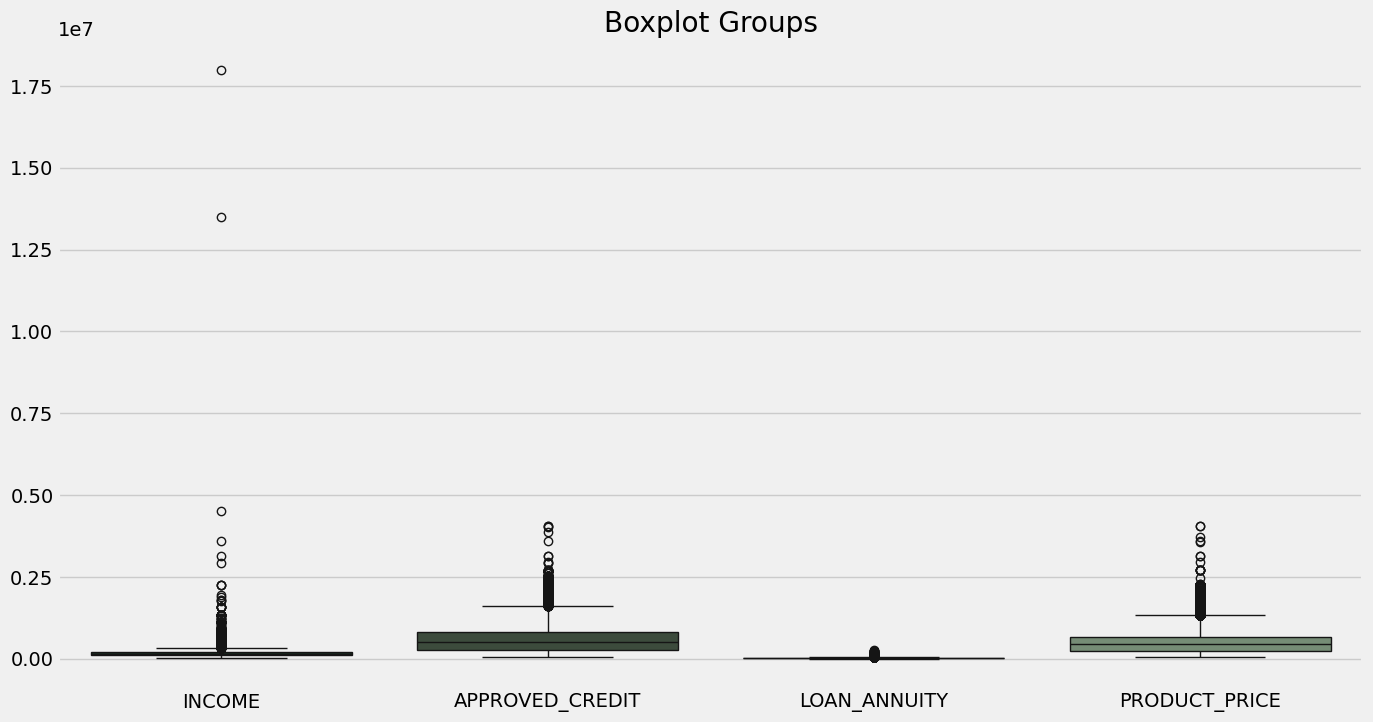

Lower, Upper Bounds, and Median for Quartiles:
+-----------------+-------------+-------------+-----------+
|      Column     | Lower Bound | Upper Bound |   Median  |
+-----------------+-------------+-------------+-----------+
|      INCOME     |   112500.0  |   337500.0  | 148500.00 |
| APPROVED_CREDIT |   270000.0  |  1616625.0  | 512064.00 |
|   LOAN_ANNUITY  |   16528.5   |   61697.25  |  24853.50 |
|  PRODUCT_PRICE  |   238500.0  |  1341000.0  | 450000.00 |
+-----------------+-------------+-------------+-----------+


In [29]:
columns = data_detect_outliers[['INCOME', 'APPROVED_CREDIT', 'LOAN_ANNUITY', 'PRODUCT_PRICE']]

plt.figure(figsize=(15, 8))
sns.boxplot(data=columns,palette=pal)
plt.title('Boxplot Groups')
plt.show()

table_bounds = PrettyTable()
table_bounds.field_names = ["Column", "Lower Bound", "Upper Bound", "Median"]

for column in columns.columns:
    Q1 = columns[column].quantile(0.25)
    Q2 = columns[column].median()
    Q3 = columns[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1
    upper_bound = Q3 + 1.5 * IQR

    table_bounds.add_row([column, f'{lower_bound}', f'{upper_bound}', f'{Q2:.2f}'])

print("Lower, Upper Bounds, and Median for Quartiles:")
print(table_bounds)

Deteksi Pada Column **'DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE'**

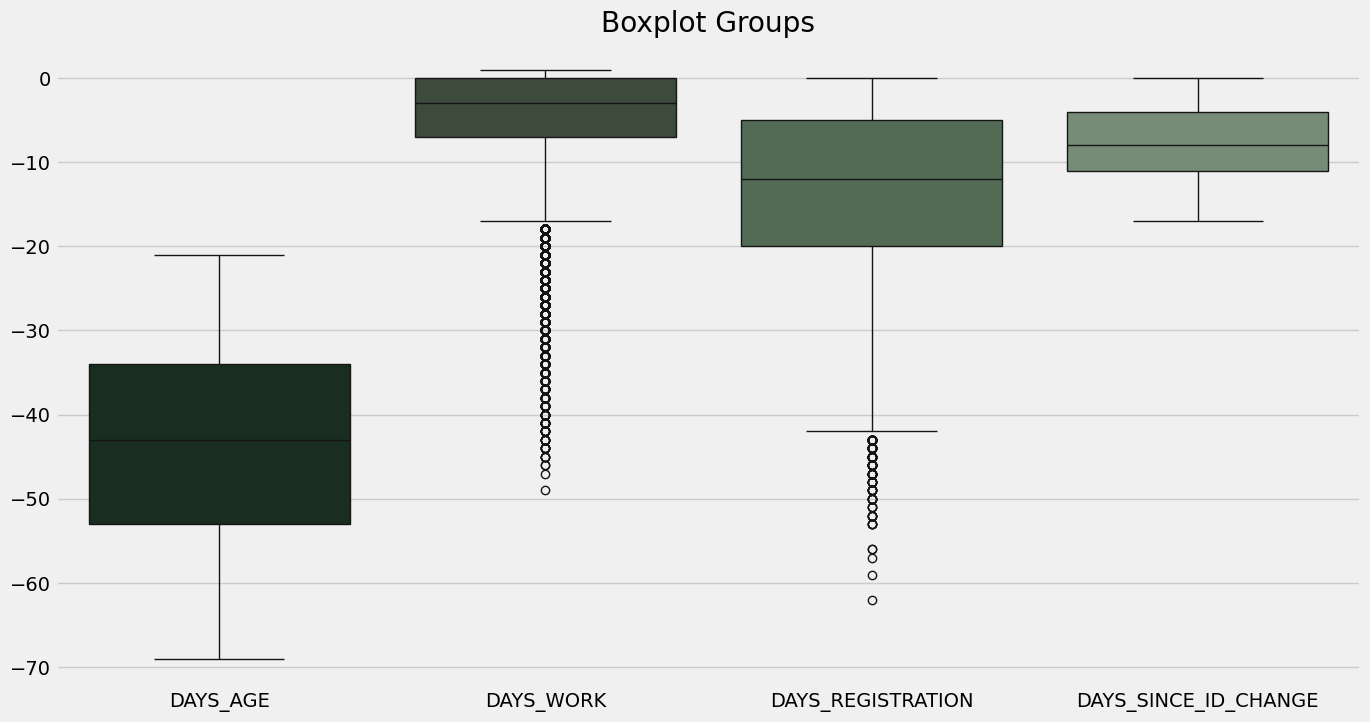

Lower, Upper Bounds, and Median for Quartiles:
+----------------------+-------------+-------------+--------+
|        Column        | Lower Bound | Upper Bound | Median |
+----------------------+-------------+-------------+--------+
|       DAYS_AGE       |    -81.5    |    -34.0    | -43.00 |
|      DAYS_WORK       |    -17.5    |     0.0     | -3.00  |
|  DAYS_REGISTRATION   |    -42.5    |     -5.0    | -12.00 |
| DAYS_SINCE_ID_CHANGE |    -21.5    |     -4.0    | -8.00  |
+----------------------+-------------+-------------+--------+


In [30]:
columns = data_detect_outliers[['DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE']]

plt.figure(figsize=(15, 8))
sns.boxplot(data=columns,palette=pal)
plt.title('Boxplot Groups')
plt.show()

table_bounds = PrettyTable()
table_bounds.field_names = ["Column", "Lower Bound", "Upper Bound", "Median"]

for column in columns.columns:
    Q1 = columns[column].quantile(0.25)
    Q2 = columns[column].median()
    Q3 = columns[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3

    table_bounds.add_row([column, f'{lower_bound}', f'{upper_bound}', f'{Q2:.2f}'])

print("Lower, Upper Bounds, and Median for Quartiles:")
print(table_bounds)

In [31]:
data_eda = data_detect_outliers.copy()

### **c. TRANSFORMATION**

**1. LABEL ENCODER & ONE HOT**


Membuat function agar mudah mengimplementasikannya

In [32]:
def encode_categorical_features(data, categorical_columns, one_hot_columns):
    label_encoder = LabelEncoder()
    for column in categorical_columns:
        data[column] = label_encoder.fit_transform(data[column])
    encoded_data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)
    return encoded_data

In [33]:
categorical_columns = ['CONTRACT_TYPE', 'GENDER', 'INCOME_CATEGORY', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_CATEGORY', 'ORGANIZATION_CATEGORY']
one_hot_columns = ['APPLY_DAYS']

data_detect_outliers = encode_categorical_features(data_detect_outliers, categorical_columns, one_hot_columns)

data_train.head()

U_ID  FLAG    CONTRACT_TYPE GENDER  NUM_OF_CHILDREN    INCOME  \
0  333538     0  Revolving loans      F                1   67500.0   
1  406644     0       Cash loans      F                1  202500.0   
2  259130     0       Cash loans      F                0  180000.0   
3  411997     0       Cash loans      M                0  225000.0   
4  241559     0  Revolving loans      M                0  135000.0   

   APPROVED_CREDIT  LOAN_ANNUITY  PRODUCT_PRICE       INCOME_CATEGORY  \
0         202500.0       10125.0       202500.0               Working   
1         976711.5       49869.0       873000.0  Commercial associate   
2         407520.0       25060.5       360000.0             Pensioner   
3         808650.0       26086.5       675000.0         State servant   
4         180000.0        9000.0       180000.0  Commercial associate   

                       EDUCATION         FAMILY_STATUS   HOUSING_CATEGORY  \
0  Secondary / secondary special               Married       With parents   
1  Secondary / secondary special               Married  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   DAYS_AGE  DAYS_WORK  DAYS_REGISTRATION  DAYS_SINCE_ID_CHANGE APPLY_DAYS  \
0    -11539       -921             -119.0                 -2757    TUESDAY   
1    -15743      -4482            -1797.0                 -2455    TUESDAY   
2    -20775     365243            -8737.0                 -4312   THURSDAY   
3    -20659     -10455            -4998.0                 -4010  WEDNESDAY   
4     -9013      -1190            -3524.0                 -1644     SUNDAY   

   APPLY_HOUR   ORGANIZATION_CATEGORY  EXTERNAL_SCORE_1  EXTERNAL_SCORE_2  \
0          18  Business Entity Type 3          0.572805          0.608276   
1          14                   Other          0.655600          0.684298   
2          14                     NA1               NaN          0.580687   
3          10                 Culture               NaN          0.623740   
4          11            Construction          0.175511          0.492994   

   EXTERNAL_SCORE_3  
0               NaN  
1               NaN  
2          0.749022  
3          0.710674  
4          0.085595

### **d. STANDARD SCALER**

In [34]:
numeric_columns = ['INCOME', 'APPROVED_CREDIT', 'LOAN_ANNUITY', 'PRODUCT_PRICE', 'DAYS_AGE', 'DAYS_WORK',
                   'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE', 'EXTERNAL_SCORE_1', 'EXTERNAL_SCORE_2', 'EXTERNAL_SCORE_3']

scaler = StandardScaler()
data_detect_outliers[numeric_columns] = scaler.fit_transform(data_detect_outliers[numeric_columns])
data_detect_outliers.head()

U_ID  FLAG  CONTRACT_TYPE  GENDER  NUM_OF_CHILDREN    INCOME  \
0  333538     0              1       0                1 -0.794811   
1  406644     0              0       0                1  0.264700   
2  259130     0              0       0                0  0.088115   
3  411997     0              0       1                0  0.441286   
4  241559     0              1       1                0 -0.265055   

   APPROVED_CREDIT  LOAN_ANNUITY  PRODUCT_PRICE  INCOME_CATEGORY  EDUCATION  \
0        -0.984108     -1.172487      -0.908393                6          4   
1         0.945318      1.574001       0.913742                1          4   
2        -0.473174     -0.140377      -0.480375                2          4   
3         0.526489     -0.069476       0.375662                3          1   
4        -1.040180     -1.250229      -0.969539                1          4   

   FAMILY_STATUS  HOUSING_CATEGORY  DAYS_AGE  DAYS_WORK  DAYS_REGISTRATION  \
0              1                 5  1.041523   0.429663           1.363671   
1              1                 1  0.037117  -1.139542           0.948535   
2              1                 1 -1.050990   0.900425          -1.023362   
3              1                 1 -1.050990  -3.650270           0.014478   
4              3                 1  1.627427   0.272743           0.429614   

   DAYS_SINCE_ID_CHANGE  APPLY_HOUR  ORGANIZATION_CATEGORY  EXTERNAL_SCORE_1  \
0              0.173956          18                      5          0.372150   
1              0.415649          14                     34          0.861610   
2             -0.792818          14                     33          0.916317   
3             -0.551125          10                      8          0.930228   
4              0.899036          11                      7         -1.976542   

   EXTERNAL_SCORE_2  EXTERNAL_SCORE_3  APPLY_DAYS_MONDAY  APPLY_DAYS_SATURDAY  \
0          0.491904          0.450583              False                False   
1          0.890516          0.883256              False                False   
2          0.347245          1.314098              False                False   
3          0.572990          1.105155              False                False   
4         -0.112563         -2.300707              False                False   

   APPLY_DAYS_SUNDAY  APPLY_DAYS_THURSDAY  APPLY_DAYS_TUESDAY  \
0              False                False                True   
1              False                False                True   
2              False                 True               False   
3              False                False               False   
4               True                False               False   

   APPLY_DAYS_WEDNESDAY  
0                 False  
1                 False  
2                 False  
3                  True  
4                 False

**PEMBAGIAN DATASET TRAIN & TEST SESUAI INDEX SEMULA**

In [35]:
data_detect_outliers.reset_index(drop=True, inplace=True)
data_detect_outliers.shape

(76264, 28)

Untuk memastikan apakah pemotongan sudah cocok dengan index data train awal

In [36]:
data_train.tail(2)

U_ID  FLAG CONTRACT_TYPE GENDER  NUM_OF_CHILDREN   INCOME  \
61501  313981     0    Cash loans      F                0  94500.0   
61502  293198     0    Cash loans      F                0  90000.0   

       APPROVED_CREDIT  LOAN_ANNUITY  PRODUCT_PRICE INCOME_CATEGORY  \
61501         360000.0       17509.5       360000.0         Working   
61502         203760.0       20281.5       180000.0       Pensioner   

                           EDUCATION         FAMILY_STATUS   HOUSING_CATEGORY  \
61501  Secondary / secondary special               Married  House / apartment   
61502  Secondary / secondary special  Single / not married  House / apartment   

       DAYS_AGE  DAYS_WORK  DAYS_REGISTRATION  DAYS_SINCE_ID_CHANGE  \
61501    -11258      -4159            -5060.0                 -3698   
61502    -24604     365243           -12794.0                 -4105   

      APPLY_DAYS  APPLY_HOUR   ORGANIZATION_CATEGORY  EXTERNAL_SCORE_1  \
61501     FRIDAY          15  Business Entity Type 3               NaN   
61502    TUESDAY          11                     NA1               NaN   

       EXTERNAL_SCORE_2  EXTERNAL_SCORE_3  
61501          0.694125          0.105473  
61502          0.250811          0.644679

In [37]:
train_indices = range(0, 61503)
test_indices = range(61503, len(data_detect_outliers))

data_train = data_detect_outliers.loc[train_indices]
data_test = data_detect_outliers.loc[test_indices]

data_train.reset_index(drop=True, inplace=True)
data_train.tail(2)

U_ID  FLAG  CONTRACT_TYPE  GENDER  NUM_OF_CHILDREN    INCOME  \
61501  313981     0              0       0                0 -0.582908   
61502  293198     0              0       0                0 -0.618225   

       APPROVED_CREDIT  LOAN_ANNUITY  PRODUCT_PRICE  INCOME_CATEGORY  \
61501        -0.591599     -0.662185      -0.480375                6   
61502        -0.980968     -0.470627      -0.969539                2   

       EDUCATION  FAMILY_STATUS  HOUSING_CATEGORY  DAYS_AGE  DAYS_WORK  \
61501          4              1                 1  1.125224  -0.982622   
61502          4              3                 1 -1.971696   0.900425   

       DAYS_REGISTRATION  DAYS_SINCE_ID_CHANGE  APPLY_HOUR  \
61501           0.014478             -0.551125          15   
61502          -2.268771             -0.792818          11   

       ORGANIZATION_CATEGORY  EXTERNAL_SCORE_1  EXTERNAL_SCORE_2  \
61501                      5         -0.650615          0.942040   
61502                     33         -0.367169         -1.382415   

       EXTERNAL_SCORE_3  APPLY_DAYS_MONDAY  APPLY_DAYS_SATURDAY  \
61501         -2.192399              False                False   
61502          0.745569              False                False   

       APPLY_DAYS_SUNDAY  APPLY_DAYS_THURSDAY  APPLY_DAYS_TUESDAY  \
61501              False                False               False   
61502              False                False                True   

       APPLY_DAYS_WEDNESDAY  
61501                 False  
61502                 False

In [38]:
data_test.to_csv('../Data Cleaning/test_cleaning.csv', index=False)
data_train.to_csv('../Data Cleaning/train_cleaning.csv', index=False)

In [39]:
data_train.drop('U_ID',inplace=True, axis=1)
data_test.drop('U_ID', inplace=True, axis=1)

In [40]:
data_train.head()

FLAG  CONTRACT_TYPE  GENDER  NUM_OF_CHILDREN    INCOME  APPROVED_CREDIT  \
0     0              1       0                1 -0.794811        -0.984108   
1     0              0       0                1  0.264700         0.945318   
2     0              0       0                0  0.088115        -0.473174   
3     0              0       1                0  0.441286         0.526489   
4     0              1       1                0 -0.265055        -1.040180   

   LOAN_ANNUITY  PRODUCT_PRICE  INCOME_CATEGORY  EDUCATION  FAMILY_STATUS  \
0     -1.172487      -0.908393                6          4              1   
1      1.574001       0.913742                1          4              1   
2     -0.140377      -0.480375                2          4              1   
3     -0.069476       0.375662                3          1              1   
4     -1.250229      -0.969539                1          4              3   

   HOUSING_CATEGORY  DAYS_AGE  DAYS_WORK  DAYS_REGISTRATION  \
0                 5  1.041523   0.429663           1.363671   
1                 1  0.037117  -1.139542           0.948535   
2                 1 -1.050990   0.900425          -1.023362   
3                 1 -1.050990  -3.650270           0.014478   
4                 1  1.627427   0.272743           0.429614   

   DAYS_SINCE_ID_CHANGE  APPLY_HOUR  ORGANIZATION_CATEGORY  EXTERNAL_SCORE_1  \
0              0.173956          18                      5          0.372150   
1              0.415649          14                     34          0.861610   
2             -0.792818          14                     33          0.916317   
3             -0.551125          10                      8          0.930228   
4              0.899036          11                      7         -1.976542   

   EXTERNAL_SCORE_2  EXTERNAL_SCORE_3  APPLY_DAYS_MONDAY  APPLY_DAYS_SATURDAY  \
0          0.491904          0.450583              False                False   
1          0.890516          0.883256              False                False   
2          0.347245          1.314098              False                False   
3          0.572990          1.105155              False                False   
4         -0.112563         -2.300707              False                False   

   APPLY_DAYS_SUNDAY  APPLY_DAYS_THURSDAY  APPLY_DAYS_TUESDAY  \
0              False                False                True   
1              False                False                True   
2              False                 True               False   
3              False                False               False   
4               True                False               False   

   APPLY_DAYS_WEDNESDAY  
0                 False  
1                 False  
2                 False  
3                  True  
4                 False

In [41]:
data_test.head()

FLAG  CONTRACT_TYPE  GENDER  NUM_OF_CHILDREN    INCOME  \
61503     0              0       1                3 -0.265055   
61504     0              0       0                0 -0.194421   
61505     0              0       0                1 -0.618225   
61506     0              0       1                2 -0.441640   
61507     0              0       1                0  0.370652   

       APPROVED_CREDIT  LOAN_ANNUITY  PRODUCT_PRICE  INCOME_CATEGORY  \
61503         0.681944      1.210166       0.620244                6   
61504        -0.278490      0.514526      -0.235793                6   
61505        -0.871963     -1.258004      -0.786102                6   
61506        -0.225535     -0.159657      -0.321397                6   
61507        -0.367309     -0.359611      -0.235793                6   

       EDUCATION  FAMILY_STATUS  HOUSING_CATEGORY  DAYS_AGE  DAYS_WORK  \
61503          4              1                 1 -0.381386  -0.354939   
61504          1              1                 3  0.455619  -2.394906   
61505          4              1                 1 -0.548787  -0.354939   
61506          4              1                 1  0.874122   0.429663   
61507          2              1                 1  1.208924   0.586584   

       DAYS_REGISTRATION  DAYS_SINCE_ID_CHANGE  APPLY_HOUR  \
61503           1.052319              1.140729           7   
61504          -0.815794             -1.276205          14   
61505          -0.919578              0.657342          12   
61506           1.156103             -0.792818          13   
61507           0.118262              0.657342          14   

       ORGANIZATION_CATEGORY  EXTERNAL_SCORE_1  EXTERNAL_SCORE_2  \
61503                      5         -0.659078         -1.934735   
61504                     28         -0.030664          0.882009   
61505                     43          1.802160          0.901075   
61506                     34         -0.654041         -1.300050   
61507                      5         -0.835928          0.503476   

       EXTERNAL_SCORE_3  APPLY_DAYS_MONDAY  APPLY_DAYS_SATURDAY  \
61503          0.781425              False                 True   
61504          0.467641               True                False   
61505          1.365159              False                 True   
61506         -2.446566              False                False   
61507         -0.626987               True                False   

       APPLY_DAYS_SUNDAY  APPLY_DAYS_THURSDAY  APPLY_DAYS_TUESDAY  \
61503              False                False               False   
61504              False                False               False   
61505              False                False               False   
61506              False                 True               False   
61507              False                False               False   

       APPLY_DAYS_WEDNESDAY  
61503                 False  
61504                 False  
61505                 False  
61506                 False  
61507                 False

# **2. HANDLING IMBALANCE**

In [42]:
columns = data_test.columns[data_test.columns != 'FLAG']

features_train = data_train[columns]
target_train = data_train['FLAG']

features_test = data_test[columns]
target_test = data_test['FLAG']

X_train, X_test, y_train, y_test = train_test_split(features_train, target_train, test_size=0.2, random_state=42)

In [43]:
print("Dimensi features_train:", features_train.shape)
print("Dimensi target_train:", target_train.shape)
print("Dimensi features_test:", features_test.shape)
print("Dimensi target_test:", target_test.shape)

Dimensi features_train: (61503, 26)
Dimensi target_train: (61503,)
Dimensi features_test: (14761, 26)
Dimensi target_test: (14761,)


In [44]:
print("Nama Kolom Target pada Training Set:", target_train.name)
print("Nama Kolom Target pada Testing Set:", target_test.name)

Nama Kolom Target pada Training Set: FLAG
Nama Kolom Target pada Testing Set: FLAG


In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((49202, 26), (49202,), (12301, 26), (12301,))

In [46]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

In [47]:
data_train_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)
data_test_resampled = pd.concat([X_test_resampled, y_test_resampled], axis=1)
data = pd.concat([data_train_resampled, data_test_resampled])

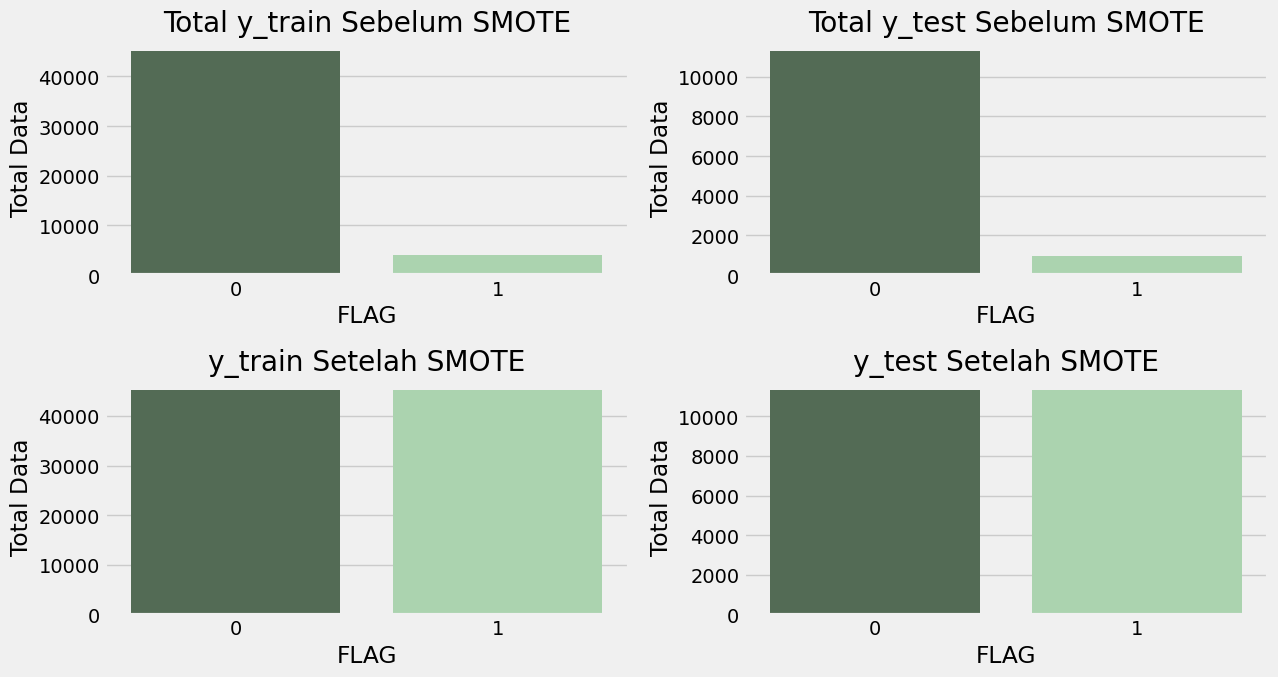

X_train_resampled shape: (90416, 26)
y_train_resampled shape: (90416,)
X_test_resampled shape: (22652, 26)
y_test_resampled shape: (22652,)


In [48]:
plt.figure(figsize=(13, 7))

plt.subplot(2, 2, 1)
sns.countplot(x=y_train, palette=pal_2)
plt.title('Total y_train Sebelum SMOTE')
plt.xlabel('FLAG')
plt.ylabel('Total Data')

plt.subplot(2, 2, 2)
sns.countplot(x=y_test, palette=pal_2)
plt.title('Total y_test Sebelum SMOTE')
plt.xlabel('FLAG')
plt.ylabel('Total Data')

plt.subplot(2, 2, 3)
sns.countplot(x=y_train_resampled, palette=pal_2)
plt.title('y_train Setelah SMOTE')
plt.xlabel('FLAG')
plt.ylabel('Total Data')

plt.subplot(2, 2, 4)
sns.countplot(x=y_test_resampled, palette=pal_2)
plt.title('y_test Setelah SMOTE')
plt.xlabel('FLAG')
plt.ylabel('Total Data')

plt.tight_layout()
plt.show()

print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("X_test_resampled shape:", X_test_resampled.shape)
print("y_test_resampled shape:", y_test_resampled.shape)


# **3. EDA**

In [49]:
data_eda.columns

Index(['U_ID', 'FLAG', 'CONTRACT_TYPE', 'GENDER', 'NUM_OF_CHILDREN', 'INCOME',
       'APPROVED_CREDIT', 'LOAN_ANNUITY', 'PRODUCT_PRICE', 'INCOME_CATEGORY',
       'EDUCATION', 'FAMILY_STATUS', 'HOUSING_CATEGORY', 'DAYS_AGE',
       'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE', 'APPLY_DAYS',
       'APPLY_HOUR', 'ORGANIZATION_CATEGORY', 'EXTERNAL_SCORE_1',
       'EXTERNAL_SCORE_2', 'EXTERNAL_SCORE_3'],
      dtype='object')

In [50]:
data_eda.drop('U_ID', inplace=True, axis=1)
nama_kolom = {
    'GENDER': 'Gender',
    'CONTRACT_TYPE': 'Jenis Pinjaman',
    'NUM_OF_CHILDREN': 'Anak',
    'INCOME': 'Bulanan',
    'APPROVED_CREDIT': 'Pinjaman',
    'LOAN_ANNUITY': 'Angsuran',
    'PRODUCT_PRICE': 'Harga Produk',
    'INCOME_CATEGORY': 'Pekerjaan',
    'EDUCATION': 'Pendidikan',
    'FAMILY_STATUS': 'Status',
    'HOUSING_CATEGORY': 'Tempat Tinggal',
    'APPLY_DAYS': 'Hari Pengajuan',
    'APPLY_HOUR': 'Jam Pengajuan',
    'ORGANIZATION_CATEGORY': 'Kategori Pekerjaan',
    'EXTERNAL_SCORE_1': 'Score 1',
    'EXTERNAL_SCORE_2': 'Score 2',
    'EXTERNAL_SCORE_3': 'Score 3'
}

data_eda.rename(columns=nama_kolom, inplace=True)

In [51]:
data_eda.head()

FLAG   Jenis Pinjaman Gender  Anak   Bulanan  Pinjaman  Angsuran  \
0     0  Revolving loans      F     1   67500.0  202500.0   10125.0   
1     0       Cash loans      F     1  202500.0  976711.5   49869.0   
2     0       Cash loans      F     0  180000.0  407520.0   25060.5   
3     0       Cash loans      M     0  225000.0  808650.0   26086.5   
4     0  Revolving loans      M     0  135000.0  180000.0    9000.0   

   Harga Produk             Pekerjaan                     Pendidikan  \
0      202500.0               Working  Secondary / secondary special   
1      873000.0  Commercial associate  Secondary / secondary special   
2      360000.0             Pensioner  Secondary / secondary special   
3      675000.0         State servant               Higher education   
4      180000.0  Commercial associate  Secondary / secondary special   

                 Status     Tempat Tinggal  DAYS_AGE  DAYS_WORK  \
0               Married       With parents       -31         -2   
1               Married  House / apartment       -43        -12   
2               Married  House / apartment       -56          1   
3               Married  House / apartment       -56        -28   
4  Single / not married  House / apartment       -24         -3   

   DAYS_REGISTRATION  DAYS_SINCE_ID_CHANGE Hari Pengajuan  Jam Pengajuan  \
0                  0                    -7        TUESDAY             18   
1                 -4                    -6        TUESDAY             14   
2                -23                   -11       THURSDAY             14   
3                -13                   -10      WEDNESDAY             10   
4                 -9                    -4         SUNDAY             11   

       Kategori Pekerjaan   Score 1   Score 2   Score 3  
0  Business Entity Type 3  0.572805  0.608276  0.590541  
1                   Other  0.655600  0.684298  0.669949  
2                     NA1  0.664854  0.580687  0.749022  
3                 Culture  0.667207  0.623740  0.710674  
4            Construction  0.175511  0.492994  0.085595

In [52]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76264 entries, 0 to 76263
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FLAG                  76264 non-null  int64  
 1   Jenis Pinjaman        76264 non-null  object 
 2   Gender                76264 non-null  object 
 3   Anak                  76264 non-null  int64  
 4   Bulanan               76264 non-null  float64
 5   Pinjaman              76264 non-null  float64
 6   Angsuran              76264 non-null  float64
 7   Harga Produk          76264 non-null  float64
 8   Pekerjaan             76264 non-null  object 
 9   Pendidikan            76264 non-null  object 
 10  Status                76264 non-null  object 
 11  Tempat Tinggal        76264 non-null  object 
 12  DAYS_AGE              76264 non-null  int32  
 13  DAYS_WORK             76264 non-null  int32  
 14  DAYS_REGISTRATION     76264 non-null  int32  
 15  DAYS_SINCE_ID_CHANG

In [53]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

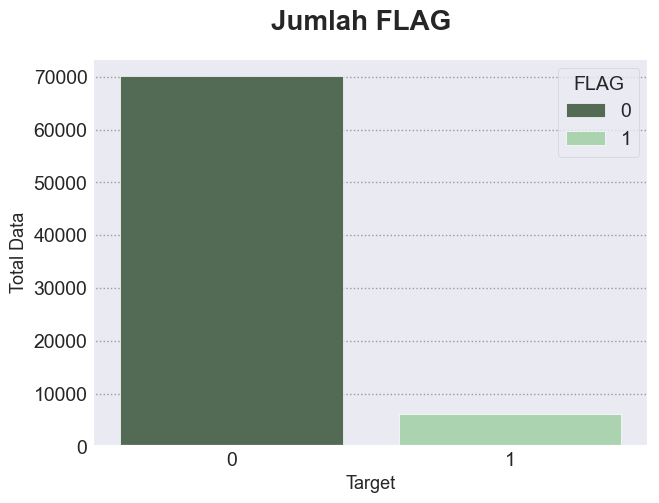

In [54]:
sns.countplot(x='FLAG', hue='FLAG', data=data_eda, palette=pal_2)
plt.suptitle('Jumlah FLAG', fontsize=20, fontweight='bold')
plt.ylabel('Total Data', fontsize=13)
plt.xlabel('Target', fontsize=13)
plt.show()

Dalam analisis ini, dapat diamati bahwa jumlah orang yang melakukan pembayaran terlambat lebih rendah dibandingkan dengan mereka yang membayar tepat waktu. Sebanyak lebih dari 6000 individu tercatat sebagai telat membayar. Selanjutnya, kita akan menyelidiki karakteristik yang mungkin membedakan antara kedua kelompok ini:

1. Apakah terdapat perbedaan signifikan dalam karakteristik antara individu yang memiliki faktor lain dan yang membayar terlambat?
2. Apakah terdapat faktor-faktor tambahan yang dapat mempengaruhi kemungkinan telat pembayaran?

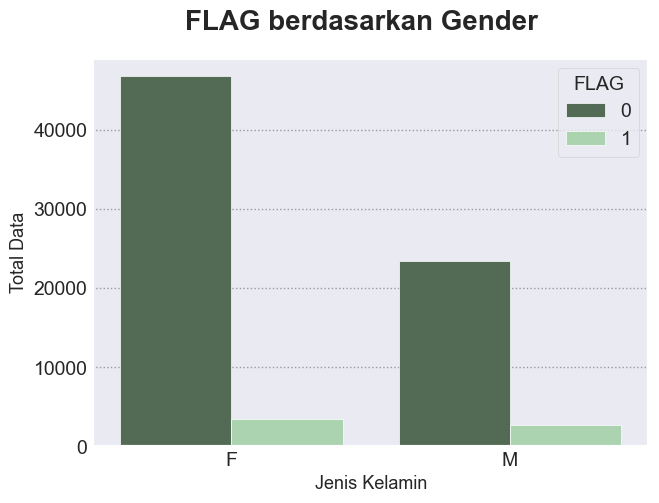

In [55]:
sns.countplot(x='Gender', hue='FLAG', data=data_eda, palette=pal_2)
plt.suptitle('FLAG berdasarkan Gender', fontsize=20, fontweight='bold')
plt.ylabel('Total Data', fontsize=13)
plt.xlabel('Jenis Kelamin', fontsize=13)
plt.show()

Dalam analisis lebih lanjut terkait jenis kelamin, terdapat keunggulan jumlah perempuan sekitar 1000 individu dibandingkan dengan laki-laki. Selanjutnya, kita dapat mengevaluasi perbedaan antara jenis kelamin dalam konteks kemungkinan pembayaran terlambat. Beberapa temuan yang mungkin diidentifikasi meliputi:

- Kemungkinan karena perempuan secara umum memiliki tingkat pendapatan yang lebih tinggi, pekerjaan yang lebih stabil, dan tanggung jawab yang lebih sedikit.
- Kemungkinan karena laki-laki menjadi kepala keluarga dengan kondisi kuangan yang sulit sehingga memiliki lebih banyak tanggung jawab finansial dan lebih mungkin untuk mengalami kesulitan keuangan.
- Kemungkinan karena laki-laki dengan pendapatan rendah memiliki lebih sedikit uang untuk dibelanjakan dan lebih mungkin untuk mengalami kesulitan keuangan.

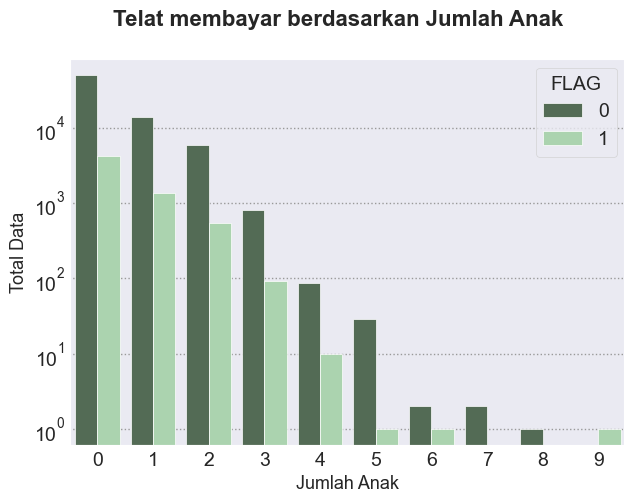

In [56]:
sns.countplot(x='Anak', hue='FLAG', data=data_eda, palette=pal_2)
plt.suptitle('Telat membayar berdasarkan Jumlah Anak', fontsize=16, fontweight='bold')
plt.yscale('log')
plt.ylabel('Total Data', fontsize=13)
plt.xlabel('Jumlah Anak', fontsize=13)
plt.show()

Dari analisis keseluruhan, tampak bahwa rata-rata keterlambatan pembayaran cenderung lebih tinggi pada individu yang tidak memiliki anak. Penting untuk dicatat bahwa seiring dengan peningkatan jumlah anak, potensi untuk mengalami keterlambatan pembayaran cenderung menurun.

- Hubungan antara jumlah anak dan potensi untuk telat membayar tidak linear. Ada kemungkinan adanya titik balik di mana semakin banyak anak seseorang, semakin kecil kemungkinan mereka untuk mengalami keterlambatan pembayaran. Karena semakin banyak tanggung jawab maka potensi untuk membeli barang dengan harga yang tinggi

Hasil analisis ini menunjukkan bahwa dalam konteks keterlambatan pembayaran, faktor **jumlah Anak tidak menjadi penentu utama dalam telat membayar**. Oleh karena itu, mari kita lanjutkan untuk menganalisis lebih jauh mengenai pola **Jenis Pinjaman** dari setiap individu untuk mengetahui karateristik peminjam.

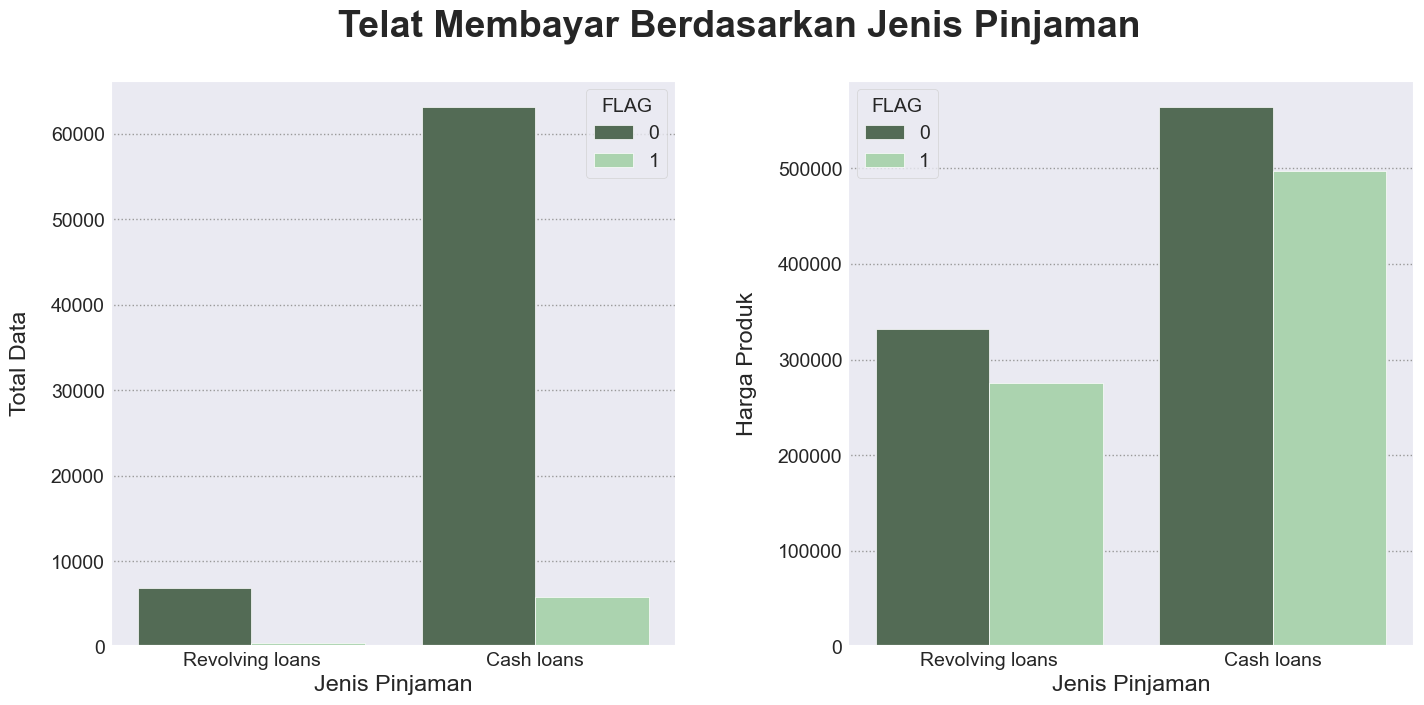

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

plt.subplots_adjust(wspace=0.3)

sns.countplot(x='Jenis Pinjaman', hue='FLAG', data=data_eda, palette=pal_2, ax=axes[0])
axes[0].set_ylabel('Total Data', labelpad=15)
axes[0].set_xlabel('Jenis Pinjaman')

sns.barplot(x='Jenis Pinjaman', y='Harga Produk', hue='FLAG', data=data_eda, palette=pal_2, ax=axes[1], ci=None)
axes[1].set_ylim(0, None)
axes[1].set_ylabel('Harga Produk', labelpad=15)
axes[1].set_xlabel('Jenis Pinjaman')

fig.suptitle('Telat Membayar Berdasarkan Jenis Pinjaman', fontsize=27, fontweight='bold')
plt.show()

Dari visualisasi diatas untuk jenis pinjaman yang banyak adalah pinjaman secara tunai, perbedaan data sangat tinggi sekitar 70.000 individu lebih memilih secara tunai yang tidak bergulir. Namun terbilang sedikit juga peminjam secara cash yang telat membayar daripada individu dengan faktor lain.

- Individu yang meminjam secara tunai membayar tepat waktu, karena meminjam dengan keperluan pinjaman lebih tinggi daripada meminjam secara bergilir, perbedaannya sekitar 200.000 ribu yang memungkinkan untuk membayar tidak tepat waktu kerana lebih sulit untuk membayar kembali pinjaman mereka.

Selanjutnya akan menganalisis antara **Jenis pinjaman** VS **Pendapatan bulanan**

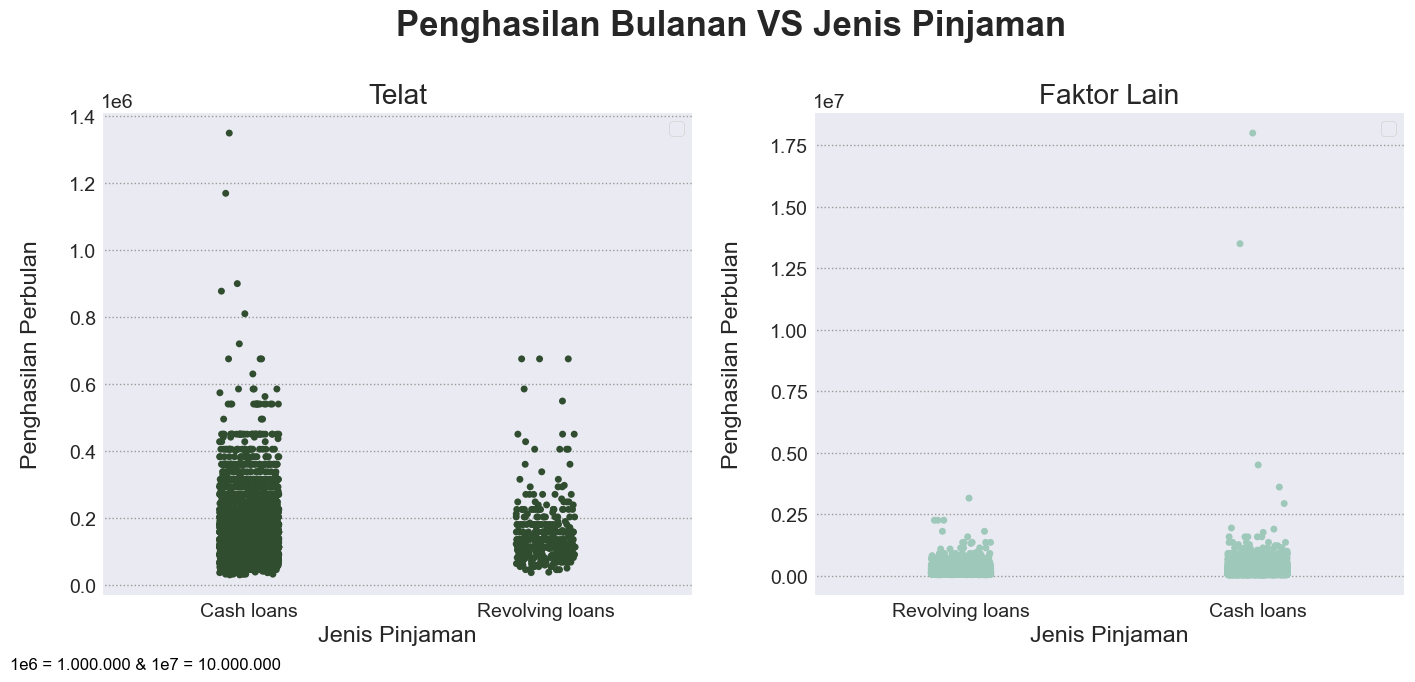

In [58]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.stripplot(x='Jenis Pinjaman', y='Bulanan', hue='FLAG', data=data_eda[data_eda['FLAG'] == 1], jitter=True, palette=[pal_dark[0]])
plt.ylabel('Penghasilan Perbulan', labelpad=20)
plt.title('Telat')
plt.legend('')

plt.subplot(1, 2, 2)
sns.stripplot(x='Jenis Pinjaman', y='Bulanan', hue='FLAG', data=data_eda[data_eda['FLAG'] == 0], jitter=True, palette=[pal_dark[1]])
plt.ylabel('Penghasilan Perbulan', labelpad=20)
plt.title('Faktor Lain')

plt.figtext(0.2, -0.05, '1e6 = 1.000.000 & 1e7 = 10.000.000', ha='right', fontsize=12, color='black')
plt.suptitle("Penghasilan Bulanan VS Jenis Pinjaman", fontsize=25, fontweight='bold', y=1.05)
plt.legend('')
plt.show()

Dalam analisis lebih lanjut, terfokus pada individu yang mengalami keterlambatan pembayaran bulanan dengan metode pembayaran uang tunai, ditemukan bahwa pendapatan bulanan rata-rata berada dalam kisaran 50.000 hingga 400.000 ribu. Pada sisi lain, untuk jenis peminjaman bergilir variasi pendapatan bulanan lebih rendah daripada Individu dengan pinjaman tunai berkisar antara 100.000 hingga 250.000 ribu.

Namun, dalam analisis ditemukan bahwa beberapa individu yang mengalami keterlambatan pembayaran memiliki pendapatan bulanan yang tinggi, melebihi 1 juta terutama pada jenis pinjaman **tunai** yang terlambat membayar. Ini merupakan temuan yang menarik karena individu yang mengalami keterlambatan pembayaran dengan tipe pinjaman bergilir cenderung memiliki batasan pendapatan bulanan paling tinggi sekitar 700.000 ribu.

- Analisis terbaru menunjukkan bahwa individu yang telat membayar dengan tipe peminjaman *bergilir* memiliki pendapatan perbulan rata-rata **lebih rendah** daripada individu yang telat membayar dengan tipe peminjaman *tunai*. Hal ini mungkin karena orang-orang dengan pendapatan yang lebih rendah lebih mungkin untuk mengalami **kesulitan keuangan** dengan cara meminjam secara terus menerus dan lebih mungkin untuk telat membayar pinjaman mereka.

Berikut adalah beberapa rekomendasi spesifik berdasarkan analisis tersebut:

1. STC Paylater dapat melakukan pemeriksaan kredit terlebih dahulu kepada individu yang mengambil pinjaman uang cash dengan pendapatan yang lebih rendah. Ini dapat membantu mereka untuk mengidentifikasi individu yang memiliki risiko lebih tinggi untuk telat membayar.

Untuk identifikasi lebih lanjut kami melakukan analisis terhadap **Pendapatan bulanan** dengan **Umur** setiap individu

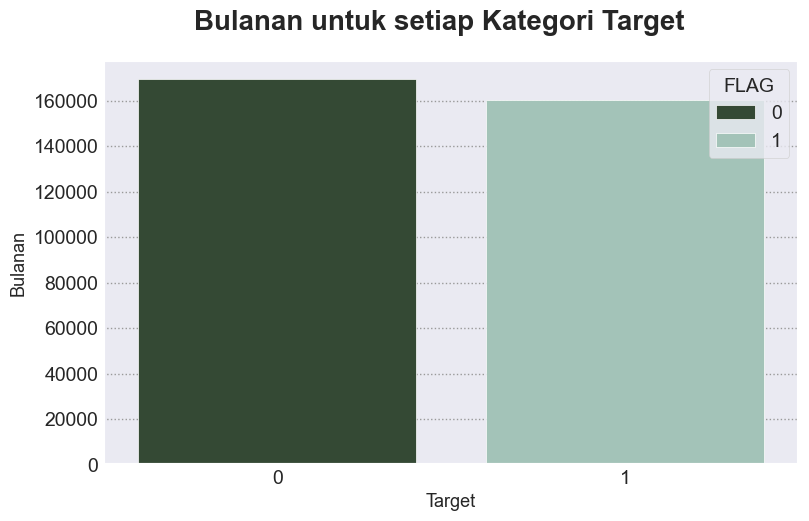

In [59]:
plt.figure(figsize=(8, 5))
sns.barplot(x='FLAG', y='Bulanan', hue="FLAG", data=data_eda, palette=pal_dark, errorbar=None)
plt.suptitle('Bulanan untuk setiap Kategori Target', fontsize=20, fontweight='bold')
plt.xlabel('Target', fontsize=13)
plt.ylabel('Bulanan', fontsize=13)
plt.show()

Kesimpulan ini dapat mendukung kesimpulan sebelumnya, yaitu risiko keterlambatan pembayaran lebih tinggi untuk individu dengan gaji bulanan. Jika rata-rata pendapatan bulanan individu yang terlambat membayar cenderung memiliki rentang gaji yang lebih terbatas, maka hal ini menunjukkan bahwa individu tersebut memiliki penghasilan yang relatif rendah.

- Ketidakpastian pendapatan. Individu dengan penghasilan rendah mungkin memiliki pekerjaan yang tidak stabil atau memiliki penghasilan yang fluktuatif. Hal ini dapat membuat mereka kesulitan untuk memenuhi kewajiban pembayaran pinjamannya.

In [60]:
data_eda[['Bulanan', 'Jenis Pinjaman', 'DAYS_AGE', 'FLAG']].head()

Bulanan   Jenis Pinjaman  DAYS_AGE  FLAG
0   67500.0  Revolving loans       -31     0
1  202500.0       Cash loans       -43     0
2  180000.0       Cash loans       -56     0
3  225000.0       Cash loans       -56     0
4  135000.0  Revolving loans       -24     0

Melihat bahwa sulit dalam merepresntasikan nilai Umur dalam nilai negatif maka saya ingin merubah nilai DAYS_AGE menjadi positif dan menaruhnya di columns baru **Umur**

In [61]:
data_eda['Umur'] = data_eda['DAYS_AGE'].abs()

### **Scope anlisis kami sekarang terpaku kepada data Individu yang telat membayar**

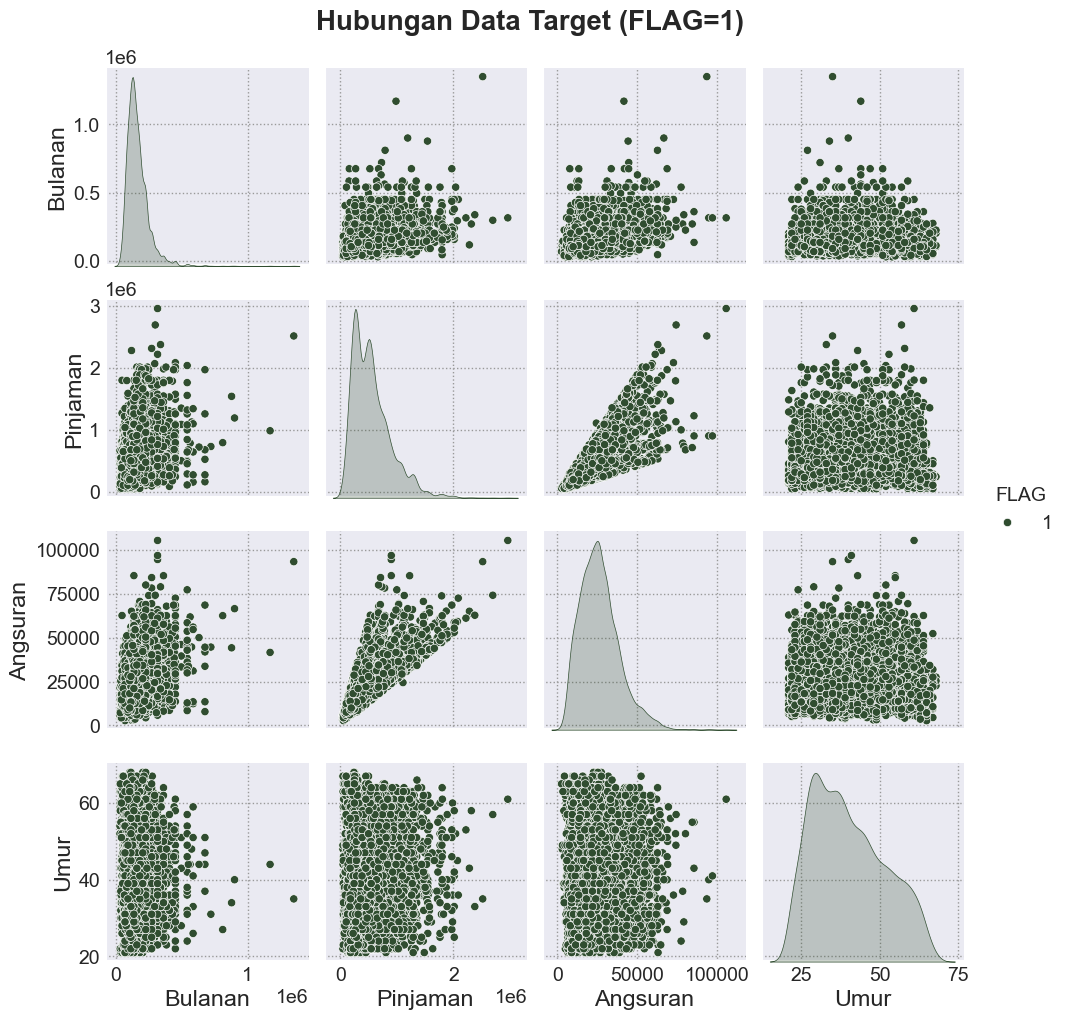

In [62]:
columns_plot = ['Bulanan', 'Pinjaman', 'Angsuran', 'Umur', 'FLAG']
data_flag_1 = data_eda[data_eda['FLAG'] == 1]

sns.pairplot(data_flag_1[columns_plot], hue='FLAG', markers=["o", "s"], palette=pal_dark)
plt.suptitle('Hubungan Data Target (FLAG=1)', fontsize=20, y=1.02, fontweight='bold')
plt.show()

Melihat dari ploting bahwa Individu yang telat membayar berada di range cukup bervariasi dari 25 - 50 tahun, namun hal ini belum bisa menjadi penentu bahwa umur range tersebut dijadikan pertimbangan untuk Aprove peminjaman.

Dalam konteks angsuran dan pinjaman, terlihat hubungan yang cukup linear. Artinya, ketika jumlah pinjaman meningkat, bunga yang harus dibayarkan juga ikut meningkat. Akibatnya, besaran angsuran bulanan akan semakin besar. Selain itu, tingginya tingkat bunga pinjaman juga akan menyebabkan besaran angsuran bulanan yang lebih tinggi.

Berikut adalah beberapa contoh penggunaan hubungan linear antara angsuran dan pinjaman:

- STC Paylater dapat menggunakan hubungan pendapatan bulanan untuk memperkirakan angsuran yang harus dibayarkan oleh calon peminjam. Hal ini dapat membantu STC Paylater untuk menentukan apakah calon peminjam tersebut dapat memenuhi kewajibannya untuk membayar angsuran.
- STC Paylater juga dapat menggunakan hubungan ini untuk menawarkan opsi pinjaman yang lebih terjangkau kepada calon peminjam. Misalnya, STC Paylater dapat menawarkan pinjaman dengan jumlah yang lebih kecil atau tenor yang lebih lama kepada calon peminjam yang memiliki penghasilan bulanan yang lebih rendah

Kami juga melihat bahwa umur salah satu individu umur 30 - 65 memiliki bulanan yang besar namun telat membayar, untuk menganalisis lebih jauh kami akan melihat individu yang memiliki **Bulanan besar** dan **Angsuran besar** tersebut. Mengapa mereka telat membayar?

In [63]:
bulanan_tinggi_data = data_flag_1[data_flag_1['Bulanan'] > 600000]
bulanan_tinggi_data.drop(['DAYS_AGE', 'Score 1', 'Score 2', 'Score 3'], axis=1, inplace=True)
bulanan_tinggi_data.head()

FLAG   Jenis Pinjaman Gender  Anak    Bulanan   Pinjaman  Angsuran  \
5550      1       Cash loans      F     0   810000.0   790830.0   62613.0   
5697      1       Cash loans      M     0   720000.0   728460.0   44694.0   
6537      1       Cash loans      F     2  1350000.0  2517300.0   93420.0   
9999      1       Cash loans      M     1   675000.0   521280.0   41926.5   
18536     1  Revolving loans      M     0   675000.0   675000.0   33750.0   

       Harga Produk             Pekerjaan                     Pendidikan  \
5550       675000.0  Commercial associate              Incomplete higher   
5697       675000.0  Commercial associate  Secondary / secondary special   
6537      2250000.0  Commercial associate              Incomplete higher   
9999       450000.0  Commercial associate  Secondary / secondary special   
18536      675000.0               Working               Higher education   

                     Status     Tempat Tinggal  DAYS_WORK  DAYS_REGISTRATION  \
5550   Single / not married  House / apartment         -1                -12   
5697   Single / not married  House / apartment         -6                 -9   
6537                Married  House / apartment         -7                -11   
9999                Married       With parents         -2                 -3   
18536               Married  House / apartment         -3                 -1   

       DAYS_SINCE_ID_CHANGE Hari Pengajuan  Jam Pengajuan  \
5550                     -7       THURSDAY             13   
5697                     -9        TUESDAY              8   
6537                    -11       THURSDAY             16   
9999                    -11       THURSDAY             10   
18536                    -2       THURSDAY             13   

           Kategori Pekerjaan  Umur  
5550                     Bank    27  
5697             Construction    31  
6537   Business Entity Type 1    35  
9999   Business Entity Type 3    44  
18536                Security    37

In [64]:
bulanan_tinggi_data.describe()

FLAG       Anak       Bulanan      Pinjaman      Angsuran  \
count  13.0  13.000000  1.300000e+01  1.300000e+01     13.000000   
mean    1.0   0.615385  8.082692e+05  1.024742e+06  47207.423077   
std     0.0   0.869718  2.205424e+05  6.711227e+05  22658.955163   
min     1.0   0.000000  6.300000e+05  1.575000e+05   7875.000000   
25%     1.0   0.000000  6.750000e+05  6.750000e+05  41661.000000   
50%     1.0   0.000000  6.750000e+05  7.908300e+05  44644.500000   
75%     1.0   1.000000  8.775000e+05  1.256400e+06  62613.000000   
max     1.0   2.000000  1.350000e+06  2.517300e+06  93420.000000   

       Harga Produk  DAYS_WORK  DAYS_REGISTRATION  DAYS_SINCE_ID_CHANGE  \
count  1.300000e+01  13.000000          13.000000             13.000000   
mean   9.051923e+05  -5.307692         -10.538462             -5.692308   
std    5.864890e+05   4.171023           8.252428              4.210792   
min    1.575000e+05 -13.000000         -28.000000            -12.000000   
25%    6.750000e+05  -8.000000         -15.000000             -9.000000   
50%    6.795000e+05  -3.000000          -9.000000             -6.000000   
75%    1.125000e+06  -2.000000          -5.000000             -2.000000   
max    2.250000e+06  -1.000000           0.000000              0.000000   

       Jam Pengajuan       Umur  
count      13.000000  13.000000  
mean       13.153846  40.384615  
std         3.184498   7.077411  
min         8.000000  27.000000  
25%        10.000000  35.000000  
50%        13.000000  44.000000  
75%        16.000000  44.000000  
max        18.000000  51.000000

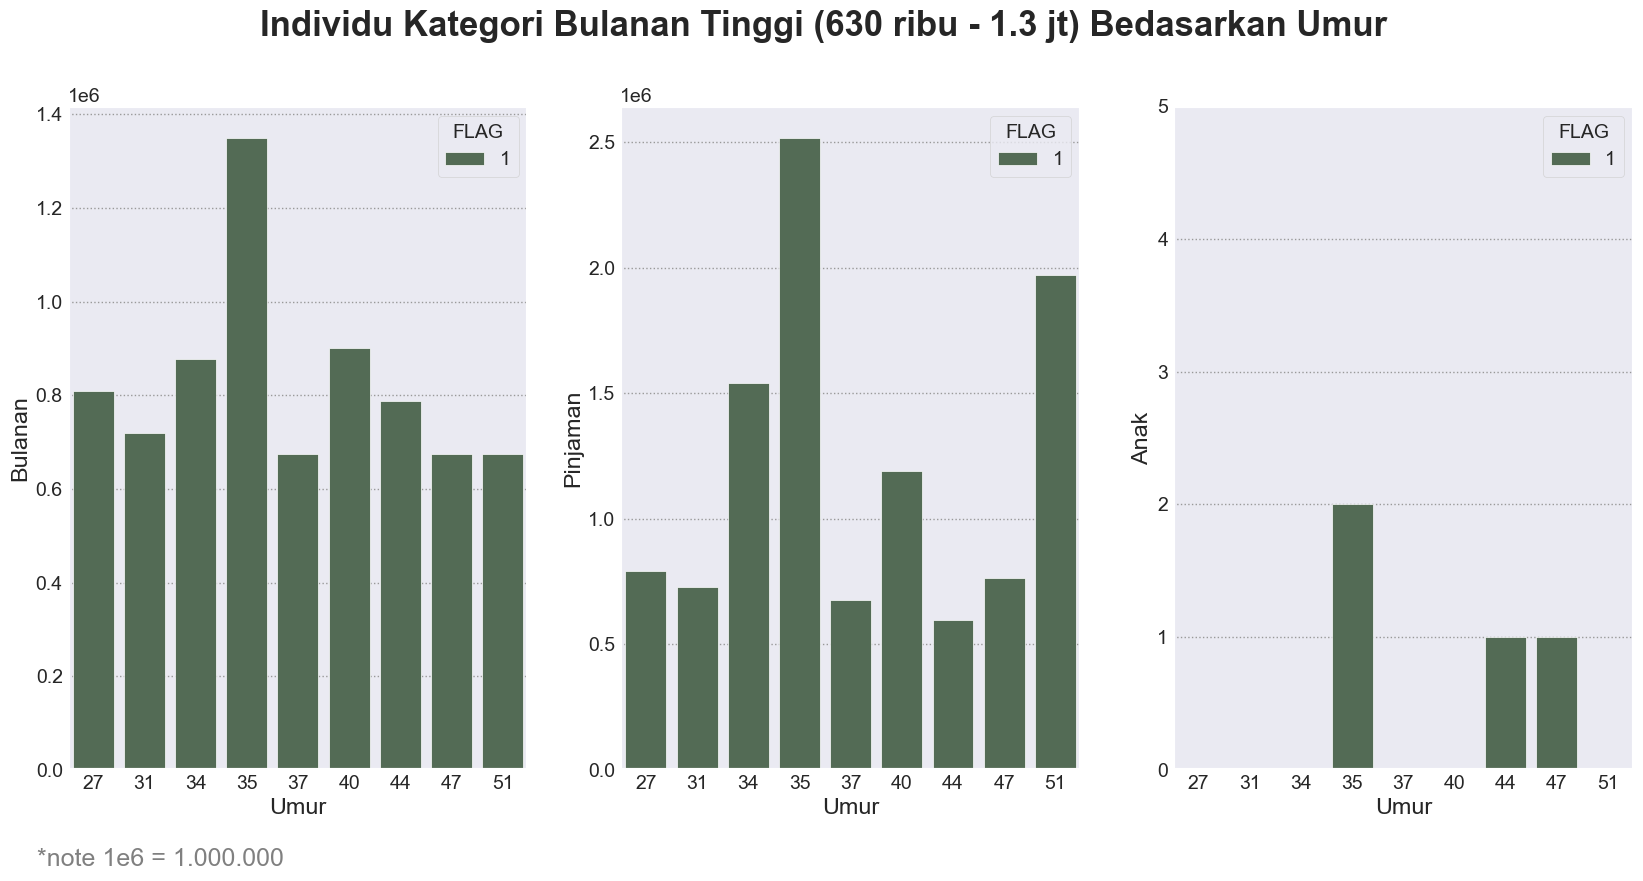

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

sns.barplot(x='Umur', y='Bulanan', hue='FLAG', data=bulanan_tinggi_data, errorbar=None, ax=axes[0], palette=pal_2)

sns.barplot(x='Umur', y='Pinjaman', hue='FLAG', data=bulanan_tinggi_data, errorbar=None, ax=axes[1], palette=pal_2)
axes[1].set_ylim(0, None)

sns.barplot(x='Umur', y='Anak', hue='FLAG', data=bulanan_tinggi_data, errorbar=None, ax=axes[2], palette=pal_2)
axes[2].set_ylim(0, 4)
axes[2].set_yticks(range(0, 6, 1))

plt.subplots_adjust(top=0.9, wspace=0.2)
plt.figtext(0.2, -0.05, '*note 1e6 = 1.000.000', ha='right', fontsize=18, color='grey')
plt.suptitle('Individu Kategori Bulanan Tinggi (630 ribu - 1.3 jt) Bedasarkan Umur', fontsize=25, fontweight='bold', y=1.02)
plt.show()

Bulanan tertinggi 13 individu yang telat membayar termasuk memiliki golongan **Bulanan** yang tinggi sekitar 600.000 - 1.350.000

1. Umur 27 - 51
2. Anak 0 - 2
3. Rata rata Status Menikah
4. Rata rata Pekerjaan Comercial associate
5. Rata rata Laki - Laki
6. Pinjaman 157.000 ribu - 2.5 jt, Rata rata 1 jt
7. Angsuran 7.800 - 93.000, Rata rata 47.000
8. Harga Produk yang dibeli 157.000 - 2.2 jt, Rata rata 905.000
9. Bekerja selama 1 - 13 tahun, Rata rata 5 tahun
10. Pendapatan 630.000 ribu - 1.3 jt

Melihat bahwa Bulanan Individu ini tinggi namun enggan untuk melakukan pembayaran, maka rekomendasi yang bisa kami berikan adalah:

- STC Paylater dapat mempertimbangkan rasio keinginan membeli harga produk terhadap pendapatan bulanan individu. Jika harga produk tidak mendekati pendapatan bulanan, maka individu tersebut memiliki risiko yang lebih tinggi untuk terlambat membayar, terutama jika individu tersebut bekerja sebagai wiraswasta yang tidak memiliki gaji tetap. Jadi kemungkinan banyak kondisi dimana Individu tersebut tidak bisa membayar tepat waktu yang ditentukan, karena Individu yang bekerja di sektor informal mungkin tidak memiliki perlindungan yang sama dari hukum dan peraturan, sehingga mereka mungkin lebih rentan terhadap ketidakadilan dalam pembagian bulanan.

- Individu yang sudah menikah dan memiliki gaji tinggi juga perlu dipertimbangkan secara lebih mendalam. terutama faktor kondisi kepala keluarga yaitu laki-laki dapat menjadi potensi untuk keterlambatan pembayaran.

- Lamanya individu bekerja perlu diperhatikan, karena rata-rata individu memiliki riwayat kerja yang relatif singkat daripada yang lain, yaitu sekitar 5 tahun.

Kami juga memberikan kesimpulan untuk STC PayLeter kepada Individu yang memiliki Bulanan tergolong tinggi:

1. Mempertimbangkan peminjaman kepada yang bekerja di sektor Informal walaupun memiliki tingkat gaji tinggi tapi enggan membayar pinjaman kembali.
2. Kondisi kepala keluarga dalam konteks laki-laki yang sudah memiliki pasangan.
3. Bekerja sama dengan lembaga keuangan lain untuk menyediakan pinjaman dengan persyaratan yang lebih baik bagi individu di sektor informal.

Melihat distribusi pinjaman, mayoritas paling tinggi untuk Individu yang telat berada dalam rentang usia 25-40 tahun, dengan jumlah pinjaman total yang harus dibayar berkisar antara 200 - 600 ribu. Meski demikian, menariknya, terdapat sejumlah individu di kategori usia 30-60 tahun yang juga melakukan peminjaman, bahkan dengan jumlah yang signifikan, melebihi 1 juta padahal dalam prakteknya faktor utama untuk membayar adalah uang namun rata rata mereka cuma memiliki tertinggi adlaah individu dengan pendapatan max 400 ribu. Hal ini menunjukkan **diversitas** dalam penggunaan layanan pinjaman, baik dari segi usia maupun besaran nominal pinjaman. Dilain sisi kami melihat bahwa rata rata memiliki sedikit anak, hal itu juga bisa dipertimbangkan untuk Individu yang memiliki umur tua untuk dipertimbangkan mengambil pinjaman karena tidak banyak juga keluarga yang membantu untuk membayar tagihan apalagi melihat potensi orang tua yang sudah berumur mulai tidak bisa optimal dalam bekerja.

**Merubah nilai ke Tahun untuk memudahkan Analisis**

In [66]:
data_flag_1[['Lama_Bekerja', 'Pindah_Lokasi', 'Pergantian_ID']] = data_flag_1[['DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE']].abs()

In [67]:
data_flag_1['Lama_Bekerja'].describe()

count    6172.000000
mean        4.122327
std         4.932516
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        43.000000
Name: Lama_Bekerja, dtype: float64

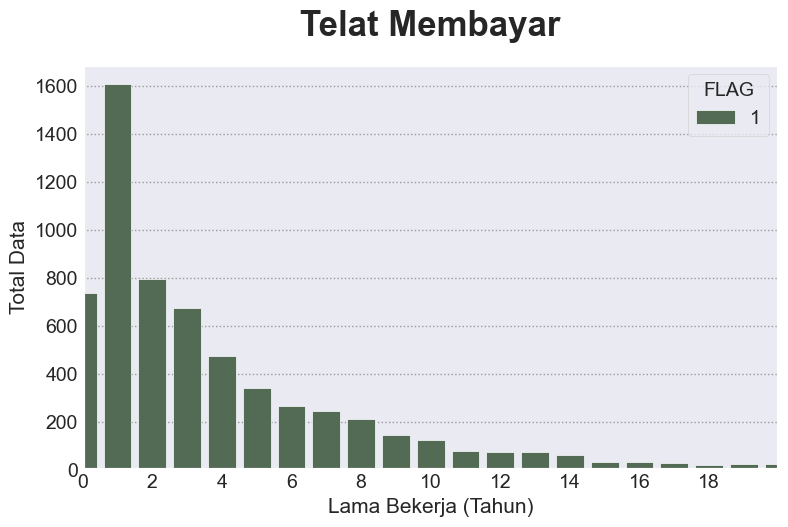

In [68]:
plt.figure(figsize=(8,5))
sns.countplot(data=data_flag_1, x="Lama_Bekerja", palette=pal_2, hue='FLAG')
plt.ylabel('')
plt.xticks(range(0,20,2))
plt.xlim(0,20)
plt.xlabel('Lama Bekerja (Tahun)', fontsize=15)
plt.ylabel('Total Data', fontsize=15)
plt.title("Telat Membayar", fontsize=25, fontweight='bold', y=1.05)
plt.show()

Individu yang baru saja mulai bekerja di pekerjaannya saat ini cenderung memiliki risiko terlambat bayar yang lebih tinggi daripada individu yang telah bekerja di pekerjaannya saat ini selama beberapa tahun. Bisa menjadi rekomendasi untuk persyaratan minimal kerja 1 tahun

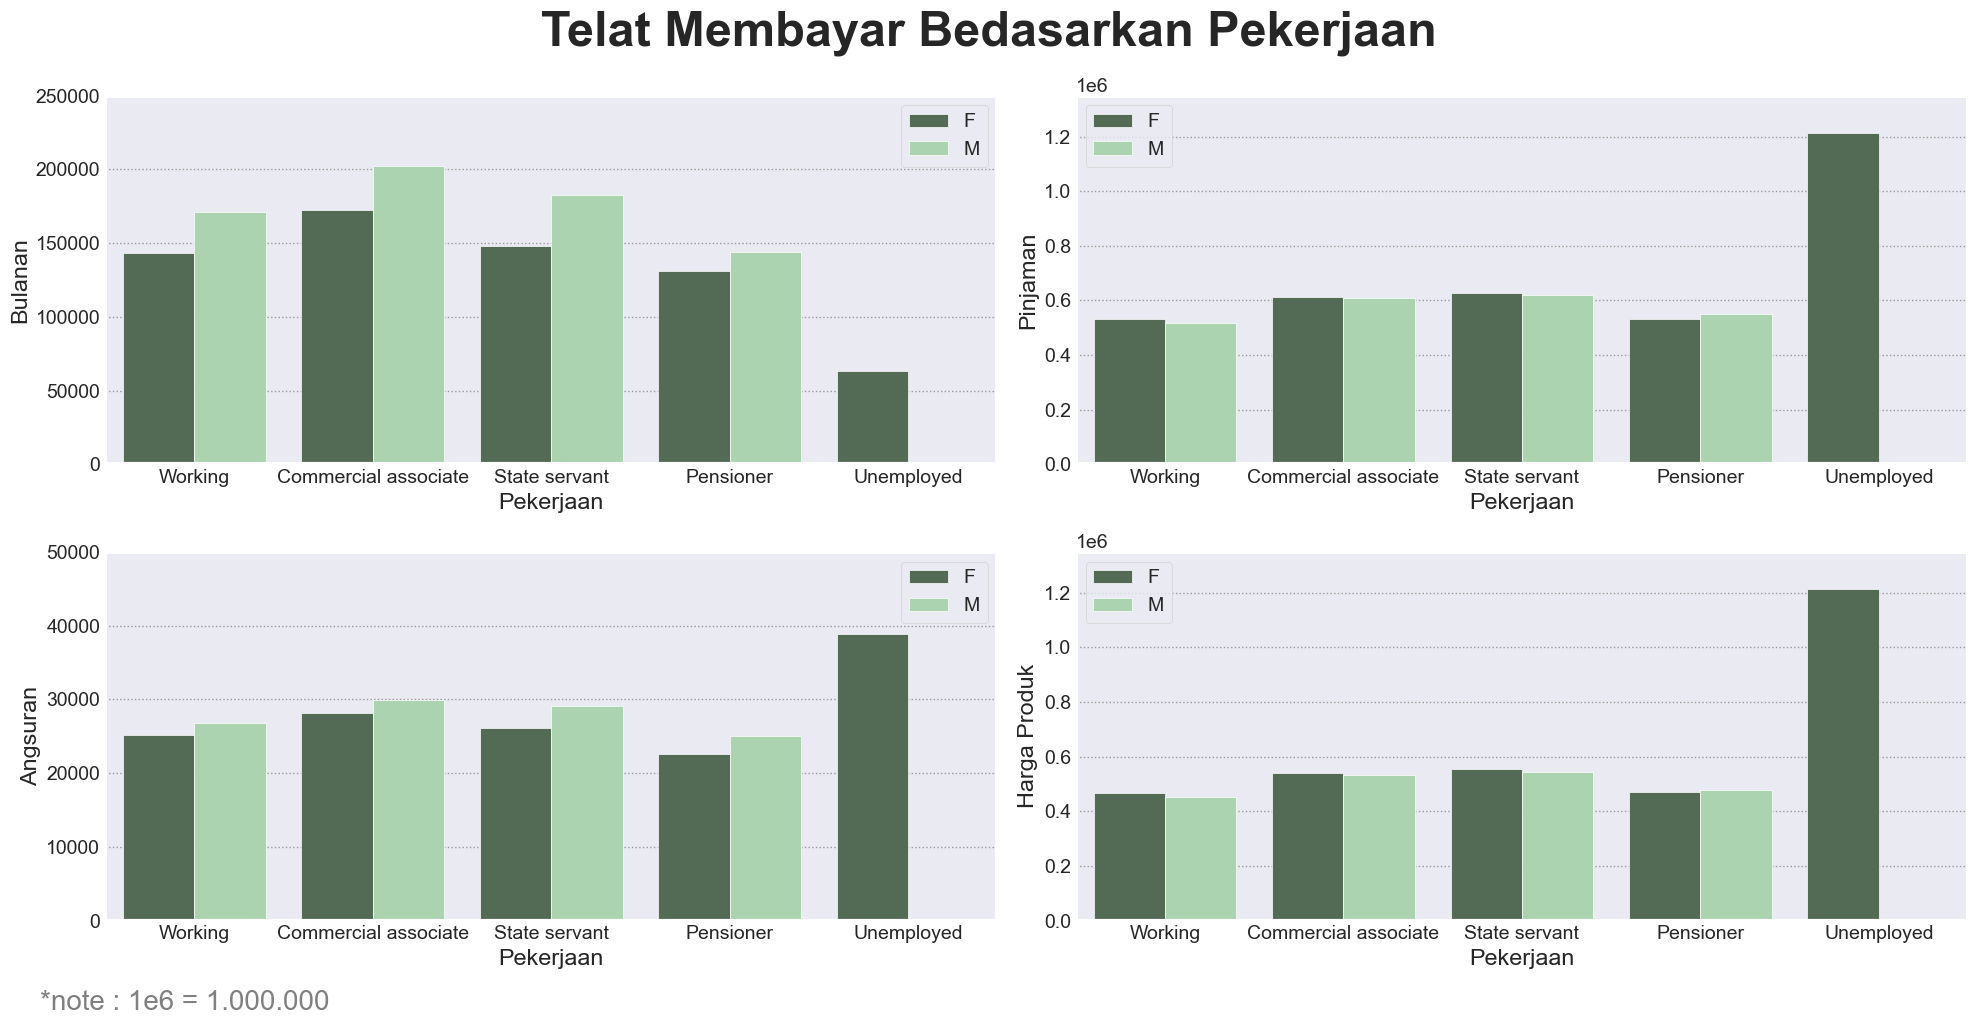

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()

columns = ['Bulanan', 'Pinjaman', 'Angsuran', 'Harga Produk']
ylabel = ['', '', '', '']

for i, column in enumerate(columns):
    ax = axes[i]
    sns.barplot(data=data_flag_1, x="Pekerjaan", y=column, hue='Gender', palette=pal_2, errorbar=None, ax=ax)
    ax.set_ylabel(f'{column}')
    ax.set_xlabel('Pekerjaan')
    
    if column == 'Angsuran':
        ax.set_ylim(0, 50000)
    elif column == 'Bulanan':
        ax.set_ylim(0, 250000)
    else:
        ax.set_ylim(0, 1350000)
    ax.legend()

plt.suptitle("Telat Membayar Bedasarkan Pekerjaan", fontsize=35, fontweight='bold')
plt.figtext(0.17, -0.02, '*note : 1e6 = 1.000.000', ha='right', fontsize=20, color='grey')
plt.tight_layout()
plt.show()

Kami menemukan pola dimana yang telat membayar adalah Individu Laki laki yang tidak memiliki pekerjaan namun berani untuk membeli produk dengan harga yang mahal sekitar 1.200.000, melihat bahwa bulanan yang rata rata dibawah daripada pekerjaan yang lain.

Rekomendasi untuk STC PayLeter:
1. Batasi jumlah pinjamanan yang dapat diajukan oleh individu laki-laki yang tidak memiliki pekerjaan. STC Paylater dapat membatasi jumlah pinjamanan dengan harga produk yang relatif rendah oleh individu laki-laki yang tidak memiliki pekerjaan untuk mengurangi risiko terlambat bayar.

In [70]:
unique_counts = data_flag_1['Kategori Pekerjaan'].value_counts()
unique_counts.head(10)

Kategori Pekerjaan
Business Entity Type 3    1547
Self-employed              936
NA1                        740
Other                      343
Business Entity Type 2     240
Construction               208
Medicine                   189
Trade: type 7              187
Government                 170
Kindergarten               137
Name: count, dtype: int64

Melihat bahwa banyak individu yang terlambat membayar memiliki pekerjaan kategori "Business Entity Type 3", kami melakukan analisis lebih lanjut untuk memahami pola variasi di antara individu-individu tersebut.

In [71]:
kategori = data_flag_1[(data_flag_1['Kategori Pekerjaan'] == 'Business Entity Type 3')]
kategori.head()

FLAG Jenis Pinjaman Gender  Anak   Bulanan   Pinjaman  Angsuran  \
14      1     Cash loans      M     0  270000.0   889515.0   31644.0   
87      1     Cash loans      F     0  360000.0   443178.0   35145.0   
96      1     Cash loans      F     3  315000.0  1096020.0   56092.5   
117     1     Cash loans      F     0  171000.0   314100.0   19111.5   
118     1     Cash loans      M     2  157500.0  1334731.5   43186.5   

     Harga Produk             Pekerjaan                     Pendidikan  \
14       742500.0               Working  Secondary / secondary special   
87       391500.0  Commercial associate               Higher education   
96       900000.0  Commercial associate  Secondary / secondary special   
117      225000.0               Working  Secondary / secondary special   
118     1165500.0               Working               Higher education   

                   Status     Tempat Tinggal  DAYS_AGE  DAYS_WORK  \
14                Married  House / apartment       -45         -2   
87   Single / not married    Co-op apartment       -27         -2   
96                Married  House / apartment       -38         -5   
117        Civil marriage  House / apartment       -41        -14   
118               Married  House / apartment       -43        -17   

     DAYS_REGISTRATION  DAYS_SINCE_ID_CHANGE Hari Pengajuan  Jam Pengajuan  \
14                  -7                     0         MONDAY             14   
87                 -13                    -7         FRIDAY             19   
96                  -8                    -8       THURSDAY              7   
117                -20                   -11       THURSDAY             13   
118                 -6                   -10         FRIDAY             11   

         Kategori Pekerjaan   Score 1   Score 2   Score 3  Umur  Lama_Bekerja  \
14   Business Entity Type 3  0.640231  0.574258  0.706205    45             2   
87   Business Entity Type 3  0.383590  0.672110  0.095070    27             2   
96   Business Entity Type 3  0.285842  0.544488  0.151008    38             5   
117  Business Entity Type 3  0.407691  0.607760  0.239226    41            14   
118  Business Entity Type 3  0.525376  0.551481  0.499272    43            17   

     Pindah_Lokasi  Pergantian_ID  
14               7              0  
87              13              7  
96               8              8  
117             20             11  
118              6             10

In [72]:
kategori[['Jenis Pinjaman', 'Status', 'Pendidikan', 'Tempat Tinggal']].value_counts().head()

Jenis Pinjaman   Status                Pendidikan                     Tempat Tinggal   
Cash loans       Married               Secondary / secondary special  House / apartment    597
                 Single / not married  Secondary / secondary special  House / apartment    158
                 Civil marriage        Secondary / secondary special  House / apartment    131
                 Married               Higher education               House / apartment    127
Revolving loans  Married               Secondary / secondary special  House / apartment     49
Name: count, dtype: int64

Berdasarkan data yang Anda sebutkan, berikut adalah beberapa faktor yang dapat menyebabkan individu yang memiliki jenis pinjaman, status, pendidikan, dan tempat tinggal seperti yang disebutkan di atas lebih berisiko terlambat membayar:

1. Jenis pinjaman
Pinjaman tunai cenderung lebih berisiko terlambat bayar daripada pinjaman bergulir. Hal ini karena pinjaman tunai harus dilunasi dalam waktu yang telah ditentukan, sedangkan pinjaman bergulir dapat digunakan berulang kali.

2. Status
Individu yang sudah menikah cenderung memiliki lebih banyak tanggung jawab, seperti tanggung jawab keluarga. Hal ini dapat menyebabkan mereka merasa lebih tertekan untuk membayar pinjaman mereka, sehingga mereka lebih mungkin terlambat membayar.

3. Pendidikan
Individu dengan tingkat pendidikan yang lebih tinggi cenderung memiliki pemahaman yang lebih baik tentang keuangan. Hal ini dapat membuat mereka lebih mampu mengelola keuangan mereka dengan bijak, sehingga mereka lebih kecil kemungkinannya terlambat membayar pinjaman.

4. Tempat tinggal
Individu yang tinggal di daerah dengan biaya hidup yang tinggi cenderung memiliki lebih sedikit sumber daya untuk membayar pinjaman mereka. Hal ini dapat menyebabkan mereka lebih berisiko terlambat membayar.

Berdasarkan faktor-faktor tersebut, berikut adalah beberapa rekomendasi untuk STC Paylater untuk mengurangi risiko terlambat bayar untuk individu dengan jenis pinjaman, status, pendidikan, dan tempat tinggal seperti yang disebutkan di atas:

- Batasi jumlah pinjaman yang dapat diajukan oleh individu dengan jenis pinjaman tunai.
- Pertimbangkan tingkat pendidikan individu saat menilai kelayakan kredit mereka.
- Berikan diskon atau keringanan pembayaran untuk individu yang tinggal di daerah dengan biaya hidup yang tinggi.

**Rekomendasi-rekomendasi ini dapat membantu STC Paylater untuk mengurangi risiko terlambat bayar dan meningkatkan kualitas layanan mereka.**

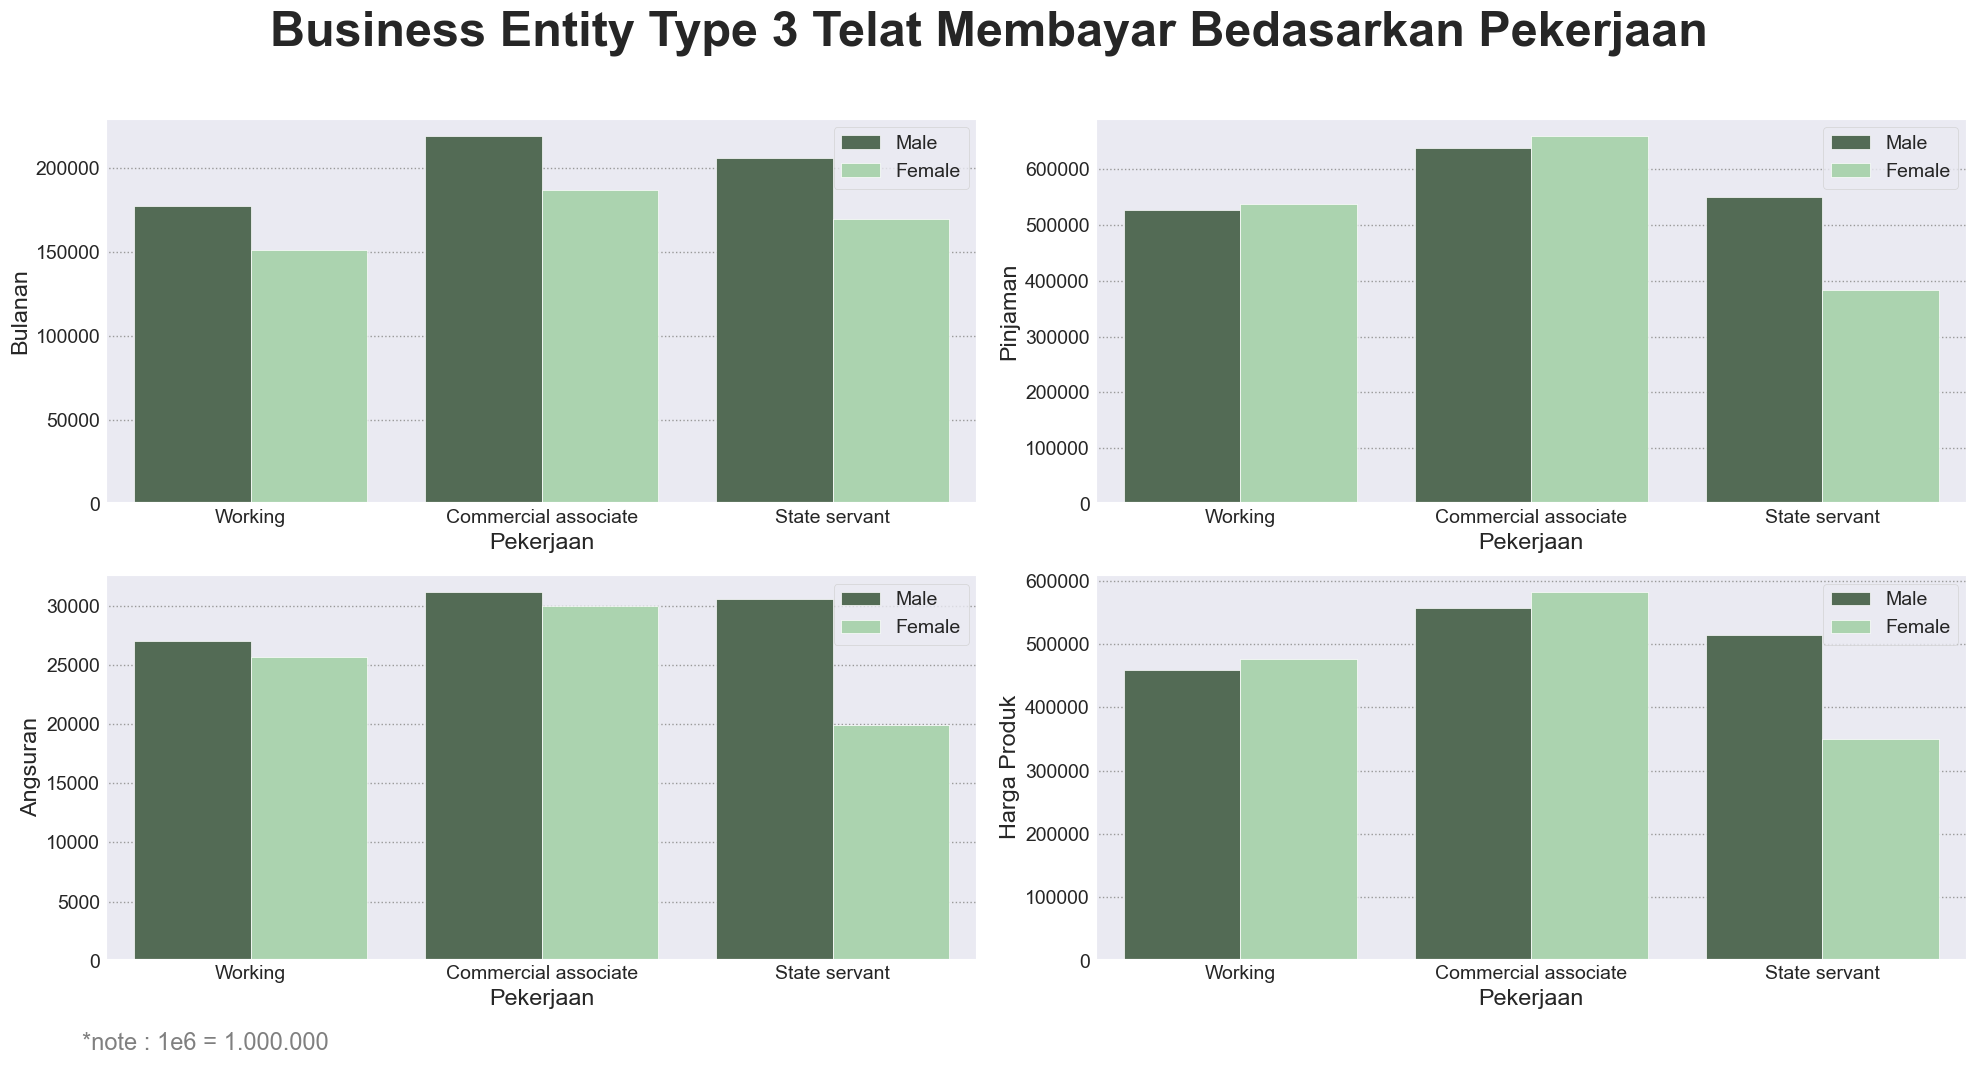

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()

columns = ['Bulanan', 'Pinjaman', 'Angsuran', 'Harga Produk']
ylabel = ['', '', '', '']

for i, column in enumerate(columns):
    ax = axes[i]
    sns.barplot(data=kategori, x="Pekerjaan", y=column, hue='Gender', palette=pal_2, errorbar=None, ax=ax)
    ax.set_ylabel(f'{column}')
    ax.set_xlabel('Pekerjaan')
    ax.legend(['Male', 'Female'])

plt.suptitle("Business Entity Type 3 Telat Membayar Bedasarkan Pekerjaan", fontsize=35, fontweight='bold', y=1.02)
plt.figtext(0.17, -0.02, '*note : 1e6 = 1.000.000', ha='right', fontsize=17, color='grey')
plt.tight_layout()
plt.show()

Pekerjaan yang dimiliki Individu yang bekerja di sektor Business Entity Type 3 ada tiga kategori yaitu Working, Comercial Associate, dan State servant. Bisa jadi pertimbangan bahwa ketika terdapat Individu yang bekerja disektor yang sama untuk dipertimbangkan secara matang terhadap pekerjaan mereka yang memiliki bulanan rendah namun sangat berani untuk membeli produk dengan harga yang tergolong mahal untuk bulanan mereka, Untuk memperkuat rekomendasi dari kami.

Kami menemukan beberapa tren bagi yang bisa di gunakan untuk pertimbangan STC PayLeter kami merangkum beberapa kondisi pertimbangan:

1. Analisis menunjukkan bahwa membatasi pembelian produk mahal untuk Individu dengan pendapatan bulanan yang rendah cenderung. Oleh karena itu, perlu mempertimbangkan pembatasan pembelian untuk mereka dengan pendapatan lebih rendah.

2. Status pekerjaan, baik bekerja atau tidak, memiliki pengaruh besar terhadap kemungkinan telat pembayaran. Oleh karena itu, penting untuk mempertimbangkan kondisi pekerjaan Individu ketika menetapkan batas waktu pembayaran.

3. Peminjam yang telah bekerja minimal selama 1 tahun memiliki tingkat risiko telat yang lebih rendah. Oleh karena itu, sebaiknya mempertimbangkan pengajuan pinjaman yang tinggi hanya dari mereka yang telah bekerja dalam kurun waktu tersebut.

4. Individu dengan usia yang lebih tua perlu mendapat perhatian lebih lanjut, terutama terkait dengan besaran pinjaman. Analisis sebelumnya menunjukkan bahwa mereka cenderung memiliki keluarga yang lebih kecil, sehingga bantuan finansial dari keluarga mungkin lebih terbatas.

5. Beberapa individu memilih meminjam secara tunai tanpa bergilir. Ini dapat dianggap sebagai pertimbangan penting, dan perlu dipertimbangkan bagaimana memanfaatkan pendapatan gaji mereka.

# **4. MODEL DEVELOPMENT**

### **MODELING DATA NON SMOTE**

**Decision Tree**

Cross-Validation Results:
Fold 1: Accuracy = 0.8729803881719338
Fold 2: Accuracy = 0.8686109135250483
Fold 3: Accuracy = 0.8672764227642277
Fold 4: Accuracy = 0.8711382113821138
Fold 5: Accuracy = 0.8708333333333333

Best Fold: 1
Decision Tree Model:
Time: 4.1617 seconds
Accuracy: 0.8674091537273393
Precision: 0.16462167689161555

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11326
           1       0.16      0.17      0.16       975

    accuracy                           0.87     12301
   macro avg       0.55      0.55      0.55     12301
weighted avg       0.87      0.87      0.87     12301



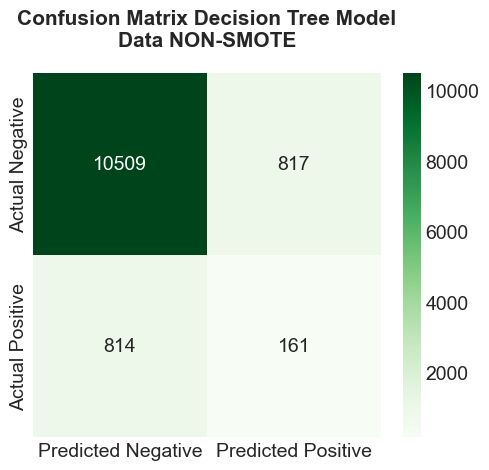

In [74]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
decision_tree_model_nonSmote = DecisionTreeClassifier(random_state=42, 
                                             max_depth=None, 
                                             min_samples_leaf=2, 
                                             min_samples_split=2)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []
feature_importance_list = []

for train_index, test_index in cv.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    decision_tree_model_nonSmote.fit(X_train_fold, y_train_fold)
    y_val_pred = decision_tree_model_nonSmote.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    cv_results.append(accuracy_fold)

    feature_importance_fold = decision_tree_model_nonSmote.feature_importances_
    feature_importance_list.append(feature_importance_fold)

best_fold = pd.Series(cv_results).idxmax() + 1

print("Cross-Validation Results:")
for i, accuracy in enumerate(cv_results):
    print(f"Fold {i + 1}: Accuracy = {accuracy}")

print(f"\nBest Fold: {best_fold}")

decision_tree_model_nonSmote.fit(X_train,y_train)
dt_predictions_nonSmote = decision_tree_model_nonSmote.predict(X_test)
end_time = time.time()

time_dt_noSmote = end_time - start_time
dt_accuracy_nonSmote = accuracy_score(y_test, dt_predictions_nonSmote)
dt_classification_report_nonSmote = classification_report(y_test, dt_predictions_nonSmote)
dt_precision_nonSmote = precision_score(y_test, dt_predictions_nonSmote)
dt_confusion_matrix_noSmote = confusion_matrix(y_test, dt_predictions_nonSmote)

print("Decision Tree Model:")
print(f"Time: {time_dt_noSmote:.4f} seconds")
print(f"Accuracy: {dt_accuracy_nonSmote}")
print(f"Precision: {dt_precision_nonSmote}")
print("\nClassification Report:")
print(dt_classification_report_nonSmote)

plt.figure(figsize=(5, 4.5))
sns.heatmap(dt_confusion_matrix_noSmote, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Decision Tree Model\nData NON-SMOTE', fontsize=15, y=1.05, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Random Forest**

Cross-Validation Results:
Fold 1: Accuracy = 0.9188090641195
Fold 2: Accuracy = 0.9193171425668123
Fold 3: Accuracy = 0.9188008130081301
Fold 4: Accuracy = 0.9192073170731707
Fold 5: Accuracy = 0.9189024390243903

Best Fold: 2
Random Forest Model:
Time: 611.7482 seconds
Accuracy: 0.9204942687586375
Precision: 0.4

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11326
           1       0.40      0.01      0.01       975

    accuracy                           0.92     12301
   macro avg       0.66      0.50      0.49     12301
weighted avg       0.88      0.92      0.88     12301



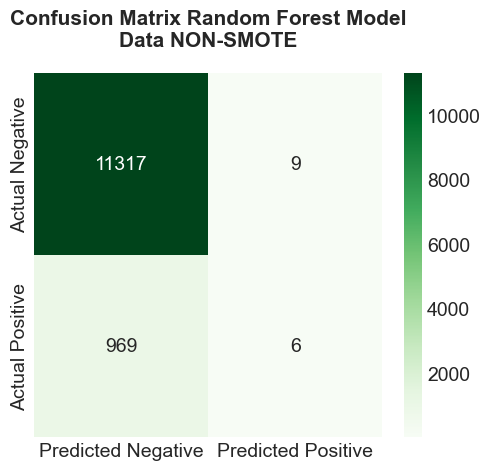

In [75]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
random_forest_model_nonSmote = RandomForestClassifier(random_state=42,
                                             n_estimators=1000,
                                             min_samples_split=2,
                                             min_samples_leaf=1,
                                             max_depth=30)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []
feature_importance_list = []

for train_index, test_index in cv.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    random_forest_model_nonSmote.fit(X_train_fold, y_train_fold)
    y_val_pred = random_forest_model_nonSmote.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    cv_results.append(accuracy_fold)

    feature_importance_fold = random_forest_model_nonSmote.feature_importances_
    feature_importance_list.append(feature_importance_fold)

best_fold = pd.Series(cv_results).idxmax() + 1

print("Cross-Validation Results:")
for i, accuracy in enumerate(cv_results):
    print(f"Fold {i + 1}: Accuracy = {accuracy}")

print(f"\nBest Fold: {best_fold}")

random_forest_model_nonSmote.fit(X_train, y_train)
rf_predictions_nonSmote = random_forest_model_nonSmote.predict(X_test)
end_time = time.time()

time_rf_noSmote = end_time - start_time
rf_accuracy_nonSmote = accuracy_score(y_test, rf_predictions_nonSmote)
rf_classification_report_nonSmote = classification_report(y_test, rf_predictions_nonSmote)
rf_precision_nonSmote = precision_score(y_test, rf_predictions_nonSmote)
rf_confusion_matrix_noSmote = confusion_matrix(y_test, rf_predictions_nonSmote)

print("Random Forest Model:")
print(f"Time: {time_rf_noSmote:.4f} seconds")
print(f"Accuracy: {rf_accuracy_nonSmote}")
print(f"Precision: {rf_precision_nonSmote}")
print("\nClassification Report:")
print(rf_classification_report_nonSmote)

plt.figure(figsize=(5, 4.5))
sns.heatmap(rf_confusion_matrix_noSmote, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Random Forest Model\nData NON-SMOTE', fontsize=15, y=1.05, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Xg Boost**

Cross-Validation Results:
Fold 1: Accuracy = 0.9168783660197134
Fold 2: Accuracy = 0.9171832130881008
Fold 3: Accuracy = 0.9164634146341464
Fold 4: Accuracy = 0.9154471544715447
Fold 5: Accuracy = 0.9171747967479674

Best Fold: 2
XG Boost Model:
Time: 14.5601 seconds
Accuracy: 0.9168360295910901
Precision: 0.27358490566037735

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     11326
           1       0.27      0.03      0.05       975

    accuracy                           0.92     12301
   macro avg       0.60      0.51      0.51     12301
weighted avg       0.87      0.92      0.88     12301



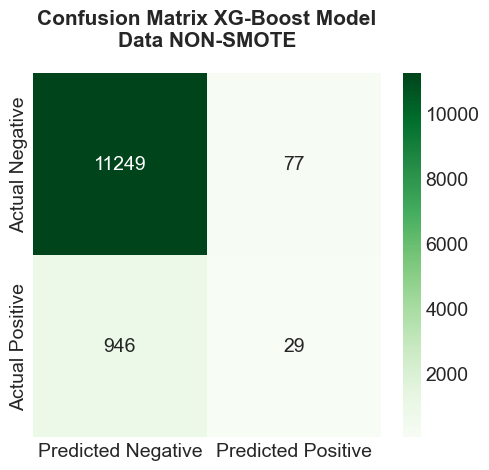

In [76]:
import xgboost as xgb

start_time = time.time()
xgb_model_nonSmote = xgb.XGBClassifier(random_state=42,
                              colsample_bytree = 0.8,
                              learning_rate=0.1,
                              max_depth= 7,
                              min_child_weight= 1,
                              n_estimators= 1000,
                              subsample= 1.0)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []
feature_importance_list = []

for train_index, test_index in cv.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    xgb_model_nonSmote.fit(X_train_fold, y_train_fold)
    y_val_pred = xgb_model_nonSmote.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    cv_results.append(accuracy_fold)

    feature_importance_fold = xgb_model_nonSmote.feature_importances_
    feature_importance_list.append(feature_importance_fold)

best_fold = pd.Series(cv_results).idxmax() + 1

print("Cross-Validation Results:")
for i, accuracy in enumerate(cv_results):
    print(f"Fold {i + 1}: Accuracy = {accuracy}")

print(f"\nBest Fold: {best_fold}")

xgb_model_nonSmote.fit(X_train, y_train)
xgb_predictions_nonSmote = xgb_model_nonSmote.predict(X_test)
end_time = time.time()

time_xg_noSmote = end_time - start_time
xgb_accuracy_nonSmote = accuracy_score(y_test, xgb_predictions_nonSmote)
xgb_classification_report_nonSmote = classification_report(y_test, xgb_predictions_nonSmote)
xg_precision_nonSmote = precision_score(y_test, xgb_predictions_nonSmote)
xg_confusion_matrix_noSmote = confusion_matrix(y_test, xgb_predictions_nonSmote)

print("XG Boost Model:")
print(f"Time: {time_xg_noSmote:.4f} seconds")
print(f"Accuracy: {xgb_accuracy_nonSmote}")
print(f"Precision: {xg_precision_nonSmote}")
print("\nClassification Report:")
print(xgb_classification_report_nonSmote)

plt.figure(figsize=(5, 4.5))
sns.heatmap(xg_confusion_matrix_noSmote, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix XG-Boost Model\nData NON-SMOTE', fontsize=15, y=1.05, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Ada Boost**

Cross-Validation Results:
Fold 1: Accuracy = 0.9177929072248755
Fold 2: Accuracy = 0.9186058327405752
Fold 3: Accuracy = 0.9189024390243903
Fold 4: Accuracy = 0.9186991869918699
Fold 5: Accuracy = 0.9196138211382113

Best Fold: 5
Ada Boost Model:
Time: 141.5763 seconds
Accuracy: 0.9204942687586375
Precision: 0.43478260869565216

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11326
           1       0.43      0.01      0.02       975

    accuracy                           0.92     12301
   macro avg       0.68      0.50      0.49     12301
weighted avg       0.88      0.92      0.88     12301



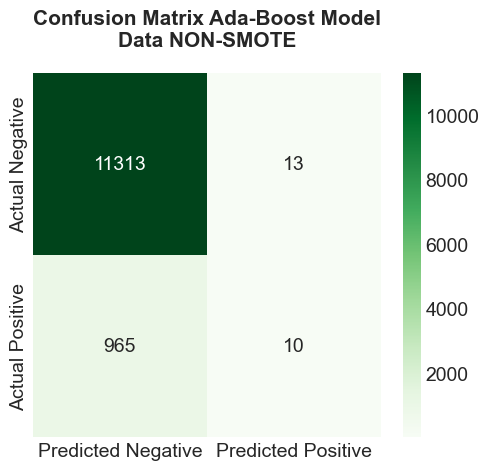

In [77]:
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
adaboost_model_nonSmote = AdaBoostClassifier(n_estimators=500,
                                    algorithm='SAMME',
                                    base_estimator=DecisionTreeClassifier(max_depth=1))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []
feature_importance_list = []

for train_index, test_index in cv.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    adaboost_model_nonSmote.fit(X_train_fold, y_train_fold)
    y_val_pred = adaboost_model_nonSmote.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    cv_results.append(accuracy_fold)

    feature_importance_fold = adaboost_model_nonSmote.feature_importances_
    feature_importance_list.append(feature_importance_fold)

best_fold = pd.Series(cv_results).idxmax() + 1

print("Cross-Validation Results:")
for i, accuracy in enumerate(cv_results):
    print(f"Fold {i + 1}: Accuracy = {accuracy}")

print(f"\nBest Fold: {best_fold}")

adaboost_model_nonSmote.fit(X_train, y_train)
adaboost_predictions_nonSmote = adaboost_model_nonSmote.predict(X_test)
end_time = time.time()

time_ada_noSmote = end_time - start_time
adaboost_accuracy_nonSmote = accuracy_score(y_test, adaboost_predictions_nonSmote)
adaboost_classification_report_nonSmote = classification_report(y_test, adaboost_predictions_nonSmote)
adaboost_precision_nonSmote = precision_score(y_test, adaboost_predictions_nonSmote)
adaboost_confusion_matrix_noSmote = confusion_matrix(y_test, adaboost_predictions_nonSmote)

print("Ada Boost Model:")
print(f"Time: {time_ada_noSmote:.4f} seconds")
print(f"Accuracy: {adaboost_accuracy_nonSmote}")
print(f"Precision: {adaboost_precision_nonSmote}")
print("\nClassification Report:")
print(adaboost_classification_report_nonSmote)

plt.figure(figsize=(5, 4.5))
sns.heatmap(adaboost_confusion_matrix_noSmote, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Ada-Boost Model\nData NON-SMOTE', fontsize=15, y=1.05, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Light GBM**

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3195, number of negative: 36166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 39361, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081172 -> initscore=-2.426532
[LightGBM] [Info] Start training from score -2.426532
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

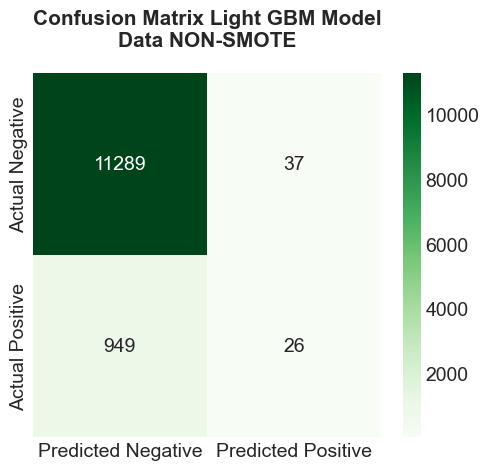

In [78]:
from lightgbm import LGBMClassifier

start_time = time.time()
lgbm_model_nonSmote = LGBMClassifier(colsample_bytree=0.8,
                            learning_rate=0.1,
                            max_depth=7,
                            n_estimators=300,
                            subsample=0.8)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []
feature_importance_list = []

for train_index, test_index in cv.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    lgbm_model_nonSmote.fit(X_train_fold, y_train_fold)
    y_val_pred = lgbm_model_nonSmote.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    cv_results.append(accuracy_fold)

    feature_importance_fold = lgbm_model_nonSmote.feature_importances_
    feature_importance_list.append(feature_importance_fold)

best_fold = pd.Series(cv_results).idxmax() + 1

print("Cross-Validation Results:")
for i, accuracy in enumerate(cv_results):
    print(f"Fold {i + 1}: Accuracy = {accuracy}")

print(f"\nBest Fold: {best_fold}")

lgbm_model_nonSmote.fit(X_train, y_train)
lgbm_predictions_nonSmote = lgbm_model_nonSmote.predict(X_test)
end_time = time.time()

time_light_noSmote = end_time - start_time
lgbm_accuracy_nonSmote = accuracy_score(y_test, lgbm_predictions_nonSmote)
lgbm_classification_report_nonSmote = classification_report(y_test, lgbm_predictions_nonSmote)
lgbm_precision_nonSmote = precision_score(y_test, lgbm_predictions_nonSmote)
lgbm_confusion_matrix_noSmote = confusion_matrix(y_test, lgbm_predictions_nonSmote)

print("LightGBM Model:")
print(f"Time: {time_light_noSmote:.4f} seconds")
print(f"Accuracy: {lgbm_accuracy_nonSmote}")
print(f"Precision: {lgbm_precision_nonSmote}")
print("\nClassification Report:")
print(lgbm_classification_report_nonSmote)

plt.figure(figsize=(5, 4.5))
sns.heatmap(lgbm_confusion_matrix_noSmote, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Light GBM Model\nData NON-SMOTE', fontsize=15, y=1.05, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Cat Boost**

Cross-Validation Results:
Fold 1: Accuracy = 0.9179961386038005
Fold 2: Accuracy = 0.9189106798089625
Fold 3: Accuracy = 0.9198170731707317
Fold 4: Accuracy = 0.9189024390243903
Fold 5: Accuracy = 0.9189024390243903

Best Fold: 3
CatBoost Model:
Time: 52.1782 seconds
Accuracy: 0.9192748557027884
Precision: 0.3392857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11326
           1       0.34      0.02      0.04       975

    accuracy                           0.92     12301
   macro avg       0.63      0.51      0.50     12301
weighted avg       0.88      0.92      0.88     12301



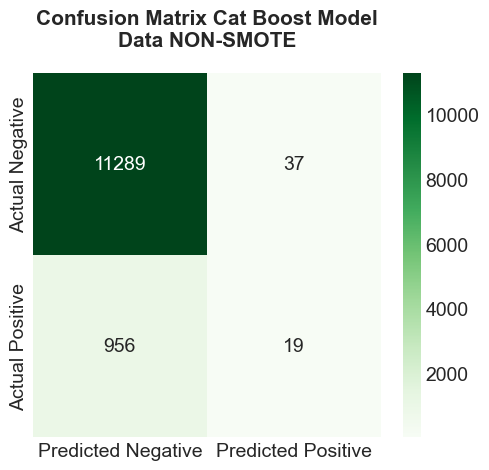

In [79]:
from catboost import CatBoostClassifier

start_time = time.time()
catboost_model_nonSmote = CatBoostClassifier(random_state=42, silent=True)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []
feature_importance_list = []

for train_index, test_index in cv.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    catboost_model_nonSmote.fit(X_train_fold, y_train_fold)
    y_val_pred = catboost_model_nonSmote.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    cv_results.append(accuracy_fold)

    feature_importance_fold = catboost_model_nonSmote.feature_importances_
    feature_importance_list.append(feature_importance_fold)

best_fold = pd.Series(cv_results).idxmax() + 1

print("Cross-Validation Results:")
for i, accuracy in enumerate(cv_results):
    print(f"Fold {i + 1}: Accuracy = {accuracy}")

print(f"\nBest Fold: {best_fold}")

catboost_model_nonSmote.fit(X_train, y_train)
catboost_predictions_nonSmote = catboost_model_nonSmote.predict(X_test)
end_time = time.time()

time_catboost_noSmote = end_time - start_time
catboost_accuracy_nonSmote = accuracy_score(y_test, catboost_predictions_nonSmote)
catboost_classification_report_nonSmote = classification_report(y_test, catboost_predictions_nonSmote)
catboost_precision_nonSmote = precision_score(y_test, catboost_predictions_nonSmote)
catboost_confusion_matrix_noSmote = confusion_matrix(y_test, catboost_predictions_nonSmote)

print("CatBoost Model:")
print(f"Time: {time_catboost_noSmote:.4f} seconds")
print(f"Accuracy: {catboost_accuracy_nonSmote}")
print(f"Precision: {catboost_precision_nonSmote}")
print("\nClassification Report:")
print(catboost_classification_report_nonSmote)

plt.figure(figsize=(5, 4.5))
sns.heatmap(catboost_confusion_matrix_noSmote, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Cat Boost Model\nData NON-SMOTE', fontsize=15, y=1.05, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

### **MODELING DATA SMOTE**

**Decision Tree**

Cross-Validation Results:
Fold 1: Accuracy = 0.8746958637469586
Fold 2: Accuracy = 0.8730852181607034
Fold 3: Accuracy = 0.8692694796217442
Fold 4: Accuracy = 0.8673339600729968
Fold 5: Accuracy = 0.872532212575347

Best Fold: 1
Decision Tree Model:
Time: 10.9663 seconds
Accuracy: 0.8118929895814939
Precision: 0.8613071494323412

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82     11326
           1       0.86      0.74      0.80     11326

    accuracy                           0.81     22652
   macro avg       0.82      0.81      0.81     22652
weighted avg       0.82      0.81      0.81     22652



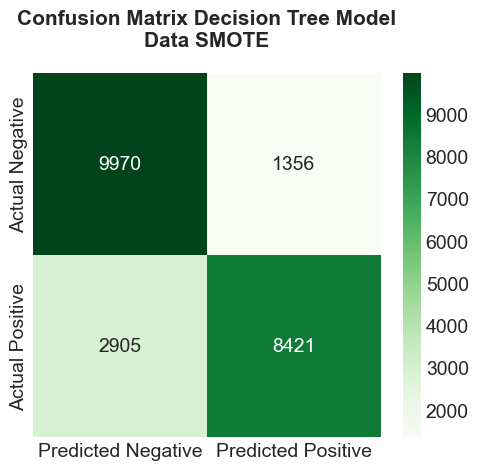

In [80]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
decision_tree_model = DecisionTreeClassifier(random_state=42, 
                                             max_depth=None, 
                                             min_samples_leaf=2, 
                                             min_samples_split=2)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []
feature_importance_list = []

for train_index, test_index in cv.split(X_train_resampled, y_train_resampled):
    X_train_fold, X_val_fold = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]

    decision_tree_model.fit(X_train_fold, y_train_fold)
    y_val_pred = decision_tree_model.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    cv_results.append(accuracy_fold)

    feature_importance_fold = decision_tree_model.feature_importances_
    feature_importance_list.append(feature_importance_fold)

best_fold = pd.Series(cv_results).idxmax() + 1

print("Cross-Validation Results:")
for i, accuracy in enumerate(cv_results):
    print(f"Fold {i + 1}: Accuracy = {accuracy}")

print(f"\nBest Fold: {best_fold}")

decision_tree_model.fit(X_train_resampled,y_train_resampled)
dt_predictions = decision_tree_model.predict(X_test_resampled)
end_time = time.time()

dt_time_smote = end_time - start_time
dt_accuracy = accuracy_score(y_test_resampled, dt_predictions)
dt_classification_report = classification_report(y_test_resampled, dt_predictions)
dt_precision = precision_score(y_test_resampled, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test_resampled, dt_predictions)

print("Decision Tree Model:")
print(f"Time: {dt_time_smote:.4f} seconds")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print("\nClassification Report:")
print(dt_classification_report)

plt.figure(figsize=(5, 4.5))
sns.heatmap(dt_confusion_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Decision Tree Model\nData SMOTE', fontsize=15, y=1.05, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [81]:
dt_feature_importance = decision_tree_model.feature_importances_
dt_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': dt_feature_importance})
dt_importance_df = dt_importance_df.sort_values(by='Importance', ascending=False)

print('Top 5 atas :')
print(dt_importance_df.head(5))
print('Bot 5 atas :')
print(dt_importance_df.tail(5))

Top 5 atas :
                 Feature  Importance
14  DAYS_SINCE_ID_CHANGE    0.192771
17      EXTERNAL_SCORE_1    0.153255
12             DAYS_WORK    0.104910
6          PRODUCT_PRICE    0.072720
19      EXTERNAL_SCORE_3    0.060351
Bot 5 atas :
              Feature  Importance
7     INCOME_CATEGORY    0.007649
8           EDUCATION    0.007364
22  APPLY_DAYS_SUNDAY    0.005698
1              GENDER    0.005003
10   HOUSING_CATEGORY    0.004256


**Random Forest**

Cross-Validation Results:
Fold 1: Accuracy = 0.9416058394160584
Fold 2: Accuracy = 0.9429851241497539
Fold 3: Accuracy = 0.94265332079854
Fold 4: Accuracy = 0.9399435934302937
Fold 5: Accuracy = 0.9399988939888293

Best Fold: 2
Random Forest Model:
Time: 1802.5655 seconds
Accuracy: 0.8486226381776444
Precision: 0.9400423492700323

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     11326
           1       0.94      0.74      0.83     11326

    accuracy                           0.85     22652
   macro avg       0.86      0.85      0.85     22652
weighted avg       0.86      0.85      0.85     22652



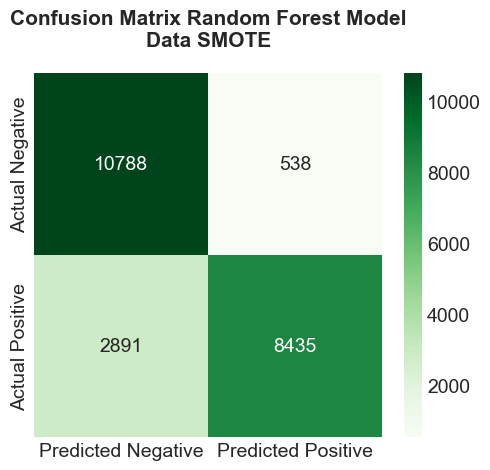

In [82]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
random_forest_model = RandomForestClassifier(random_state=42,
                                             n_estimators=1000,
                                             min_samples_split=2,
                                             min_samples_leaf=1,
                                             max_depth=30)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []
feature_importance_list = []

for train_index, test_index in cv.split(X_train_resampled, y_train_resampled):
    X_train_fold, X_val_fold = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]

    random_forest_model.fit(X_train_fold, y_train_fold)
    y_val_pred = random_forest_model.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    cv_results.append(accuracy_fold)

    feature_importance_fold = random_forest_model.feature_importances_
    feature_importance_list.append(feature_importance_fold)

best_fold = pd.Series(cv_results).idxmax() + 1

print("Cross-Validation Results:")
for i, accuracy in enumerate(cv_results):
    print(f"Fold {i + 1}: Accuracy = {accuracy}")

print(f"\nBest Fold: {best_fold}")

random_forest_model.fit(X_train_resampled, y_train_resampled)
rf_predictions = random_forest_model.predict(X_test_resampled)
end_time = time.time()

rf_time_smote = end_time - start_time
rf_accuracy = accuracy_score(y_test_resampled, rf_predictions)
rf_classification_report = classification_report(y_test_resampled, rf_predictions)
rf_precision = precision_score(y_test_resampled, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test_resampled, rf_predictions)

print("Random Forest Model:")
print(f"Time: {rf_time_smote:.4f} seconds")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print("\nClassification Report:")
print(rf_classification_report)

plt.figure(figsize=(5, 4.5))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Random Forest Model\nData SMOTE', fontsize=15, y=1.05, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [83]:
rf_feature_importance = random_forest_model.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': rf_feature_importance})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

print('Top 5 atas :')
print(rf_importance_df.head(5))
print('Bot 5 atas :')
print(rf_importance_df.tail(5))

Top 5 atas :
                 Feature  Importance
17      EXTERNAL_SCORE_1    0.104039
14  DAYS_SINCE_ID_CHANGE    0.092231
19      EXTERNAL_SCORE_3    0.089437
18      EXTERNAL_SCORE_2    0.077232
12             DAYS_WORK    0.065906
Bot 5 atas :
              Feature  Importance
2     NUM_OF_CHILDREN    0.013450
7     INCOME_CATEGORY    0.011122
1              GENDER    0.008813
10   HOUSING_CATEGORY    0.006869
22  APPLY_DAYS_SUNDAY    0.005451


**XG-Boost**

Cross-Validation Results:
Fold 1: Accuracy = 0.9533289095332891
Fold 2: Accuracy = 0.9556489520544158
Fold 3: Accuracy = 0.9536581319471327
Fold 4: Accuracy = 0.9522756179837416
Fold 5: Accuracy = 0.9540452358568822

Best Fold: 2
XG Boost Model:
Time: 15.3240 seconds
Accuracy: 0.9455235740773441
Precision: 0.9912383177570093

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11326
           1       0.99      0.90      0.94     11326

    accuracy                           0.95     22652
   macro avg       0.95      0.95      0.95     22652
weighted avg       0.95      0.95      0.95     22652



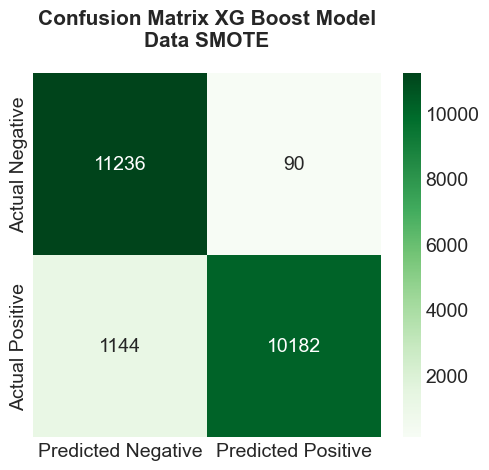

In [84]:
import xgboost as xgb

start_time = time.time()
xgb_model = xgb.XGBClassifier(random_state=42,
                              colsample_bytree = 0.8,
                              learning_rate=0.1,
                              max_depth= 7,
                              min_child_weight= 1,
                              n_estimators= 1000,
                              subsample= 1.0)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []
feature_importance_list = []

for train_index, test_index in cv.split(X_train_resampled, y_train_resampled):
    X_train_fold, X_val_fold = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]

    xgb_model.fit(X_train_fold, y_train_fold)
    y_val_pred = xgb_model.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    cv_results.append(accuracy_fold)

    feature_importance_fold = xgb_model.feature_importances_
    feature_importance_list.append(feature_importance_fold)

best_fold = pd.Series(cv_results).idxmax() + 1

print("Cross-Validation Results:")
for i, accuracy in enumerate(cv_results):
    print(f"Fold {i + 1}: Accuracy = {accuracy}")

print(f"\nBest Fold: {best_fold}")

xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_predictions = xgb_model.predict(X_test_resampled)
end_time = time.time()

xgb_time_smote = end_time - start_time
xgb_accuracy = accuracy_score(y_test_resampled, xgb_predictions)
xgb_classification_report = classification_report(y_test_resampled, xgb_predictions)
xgb_precision = precision_score(y_test_resampled, xgb_predictions)
xgb_confusion_matrix = confusion_matrix(y_test_resampled, xgb_predictions)

print("XG Boost Model:")
print(f"Time: {xgb_time_smote:.4f} seconds")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print("\nClassification Report:")
print(xgb_classification_report)

plt.figure(figsize=(5, 4.5))
sns.heatmap(xgb_confusion_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix XG Boost Model\nData SMOTE', fontsize=15, y=1.05, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [85]:
xg_feature_importance = xgb_model.feature_importances_
xg_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': xg_feature_importance})
xg_importance_df = xg_importance_df.sort_values(by='Importance', ascending=False)

print('Top 5 atas :')
print(xg_importance_df.head(5))
print('Bot 5 atas :')
print(xg_importance_df.tail(5))

Top 5 atas :
                Feature  Importance
0         CONTRACT_TYPE    0.186111
21  APPLY_DAYS_SATURDAY    0.086221
20    APPLY_DAYS_MONDAY    0.083187
12            DAYS_WORK    0.076736
23  APPLY_DAYS_THURSDAY    0.076240
Bot 5 atas :
                  Feature  Importance
7         INCOME_CATEGORY    0.006651
16  ORGANIZATION_CATEGORY    0.006448
15             APPLY_HOUR    0.006223
10       HOUSING_CATEGORY    0.005885
5            LOAN_ANNUITY    0.005715


**Ada-Boost**

Cross-Validation Results:
Fold 1: Accuracy = 0.8955430214554302
Fold 2: Accuracy = 0.8996294862578113
Fold 3: Accuracy = 0.9013991041309517
Fold 4: Accuracy = 0.8951501410164243
Fold 5: Accuracy = 0.8968644583310291

Best Fold: 3
Ada Boost Model:
Time: 423.6632 seconds
Accuracy: 0.9051739360762846
Precision: 0.9170301708469647

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     11326
           1       0.92      0.89      0.90     11326

    accuracy                           0.91     22652
   macro avg       0.91      0.91      0.91     22652
weighted avg       0.91      0.91      0.91     22652



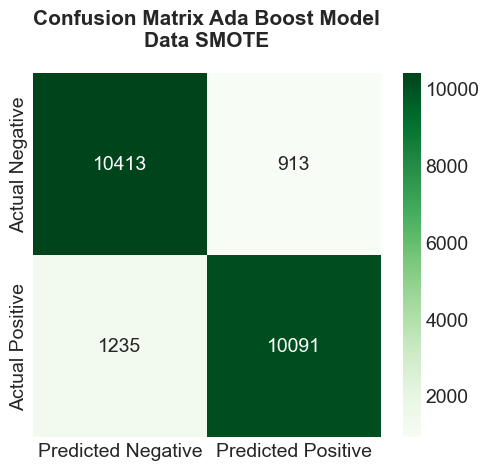

In [86]:
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
adaboost_model = AdaBoostClassifier(n_estimators=500,
                                    algorithm='SAMME',
                                    base_estimator=DecisionTreeClassifier(max_depth=1))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []
feature_importance_list = []

for train_index, test_index in cv.split(X_train_resampled, y_train_resampled):
    X_train_fold, X_val_fold = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]

    adaboost_model.fit(X_train_fold, y_train_fold)
    y_val_pred = adaboost_model.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    cv_results.append(accuracy_fold)

    feature_importance_fold = adaboost_model.feature_importances_
    feature_importance_list.append(feature_importance_fold)

best_fold = pd.Series(cv_results).idxmax() + 1

print("Cross-Validation Results:")
for i, accuracy in enumerate(cv_results):
    print(f"Fold {i + 1}: Accuracy = {accuracy}")

print(f"\nBest Fold: {best_fold}")

adaboost_model.fit(X_train_resampled, y_train_resampled)
adaboost_predictions = adaboost_model.predict(X_test_resampled)
end_time = time.time()

adaboost_time_smote = end_time - start_time
adaboost_accuracy = accuracy_score(y_test_resampled, adaboost_predictions)
adaboost_classification_report = classification_report(y_test_resampled, adaboost_predictions)
adaboost_precision = precision_score(y_test_resampled, adaboost_predictions)
adaboost_confusion_matrix = confusion_matrix(y_test_resampled, adaboost_predictions)

print("Ada Boost Model:")
print(f"Time: {adaboost_time_smote:.4f} seconds")
print(f"Accuracy: {adaboost_accuracy}")
print(f"Precision: {adaboost_precision}")
print("\nClassification Report:")
print(adaboost_classification_report)

plt.figure(figsize=(5, 4.5))
sns.heatmap(adaboost_confusion_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Ada Boost Model\nData SMOTE', fontsize=15, y=1.05, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [87]:
ada_feature_importance = adaboost_model.feature_importances_
ada_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': ada_feature_importance})
ada_importance_df = ada_importance_df.sort_values(by='Importance', ascending=False)

print('Top 5 atas :')
print(ada_importance_df.head(5))
print('Bot 5 atas :')
print(ada_importance_df.tail(5))

Top 5 atas :
                 Feature  Importance
14  DAYS_SINCE_ID_CHANGE    0.261471
12             DAYS_WORK    0.223070
3                 INCOME    0.125065
17      EXTERNAL_SCORE_1    0.043974
6          PRODUCT_PRICE    0.038017
Bot 5 atas :
                  Feature  Importance
16  ORGANIZATION_CATEGORY    0.005742
15             APPLY_HOUR    0.005351
9           FAMILY_STATUS    0.005233
10       HOUSING_CATEGORY    0.001585
7         INCOME_CATEGORY    0.000000


**Light GBM**

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 36166, number of negative: 36166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2934
[LightGBM] [Info] Number of data points in the train set: 72332, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad 

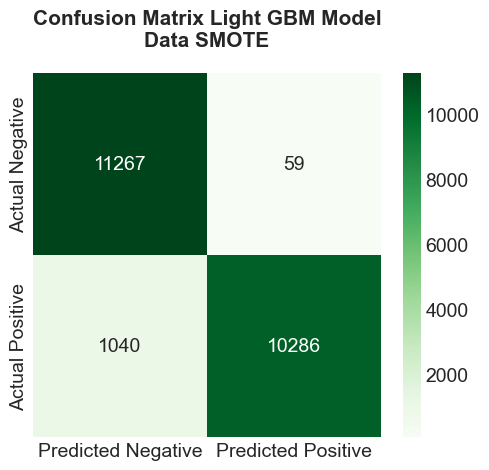

In [88]:
from lightgbm import LGBMClassifier

start_time = time.time()
lgbm_model = LGBMClassifier(colsample_bytree=0.8,
                            learning_rate=0.1,
                            max_depth=7,
                            n_estimators=300,
                            subsample=0.8)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []
feature_importance_list = []

for train_index, test_index in cv.split(X_train_resampled, y_train_resampled):
    X_train_fold, X_val_fold = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]

    lgbm_model.fit(X_train_fold, y_train_fold)
    y_val_pred = lgbm_model.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    cv_results.append(accuracy_fold)

    feature_importance_fold = lgbm_model.feature_importances_
    feature_importance_list.append(feature_importance_fold)

best_fold = pd.Series(cv_results).idxmax() + 1

print("Cross-Validation Results:")
for i, accuracy in enumerate(cv_results):
    print(f"Fold {i + 1}: Accuracy = {accuracy}")

print(f"\nBest Fold: {best_fold}")

lgbm_model.fit(X_train_resampled, y_train_resampled)
lgbm_predictions = lgbm_model.predict(X_test_resampled)
end_time = time.time()

lgbm_time_smote = end_time - start_time
lgbm_accuracy = accuracy_score(y_test_resampled, lgbm_predictions)
lgbm_classification_report = classification_report(y_test_resampled, lgbm_predictions)
lgbm_precision = precision_score(y_test_resampled, lgbm_predictions)
lgbm_confusion_matrix = confusion_matrix(y_test_resampled, lgbm_predictions)

print("Light GBM Model:")
print(f"Time: {lgbm_time_smote:.4f} seconds")
print(f"Accuracy: {lgbm_accuracy}")
print(f"Precision: {lgbm_precision}")
print("\nClassification Report:")
print(lgbm_classification_report)

plt.figure(figsize=(5, 4.5))
sns.heatmap(lgbm_confusion_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Light GBM Model\nData SMOTE', fontsize=15, y=1.05, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [89]:
lgbm_feature_importance = lgbm_model.feature_importances_
lgbm_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': lgbm_feature_importance})
lgbm_importance_df = lgbm_importance_df.sort_values(by='Importance', ascending=False)

print('Top 5 atas :')
print(lgbm_importance_df.head(5))
print('Bot 5 atas :')
print(lgbm_importance_df.tail(5))

Top 5 atas :
                 Feature  Importance
14  DAYS_SINCE_ID_CHANGE         882
11              DAYS_AGE         854
13     DAYS_REGISTRATION         746
3                 INCOME         744
12             DAYS_WORK         696
Bot 5 atas :
              Feature  Importance
1              GENDER          98
20  APPLY_DAYS_MONDAY          93
22  APPLY_DAYS_SUNDAY          71
10   HOUSING_CATEGORY          65
0       CONTRACT_TYPE          42


**Cat Boost**

Cross-Validation Results:
Fold 1: Accuracy = 0.953550099535501
Fold 2: Accuracy = 0.9558148537300226
Fold 3: Accuracy = 0.9540452358568822
Fold 4: Accuracy = 0.9534369297129901
Fold 5: Accuracy = 0.9534922302715257

Best Fold: 2
Cat Boost Model:
Time: 91.1800 seconds
Accuracy: 0.9532491612219671
Precision: 0.9960382645666248

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11326
           1       1.00      0.91      0.95     11326

    accuracy                           0.95     22652
   macro avg       0.96      0.95      0.95     22652
weighted avg       0.96      0.95      0.95     22652



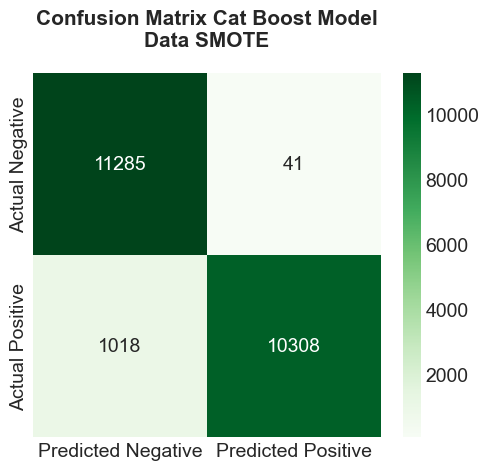

In [90]:
from catboost import CatBoostClassifier, Pool

start_time = time.time()
catboost_model = CatBoostClassifier(random_state=42, silent=True)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []
feature_importance_list = []

for train_index, test_index in cv.split(X_train_resampled, y_train_resampled):
    X_train_fold, X_val_fold = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]

    catboost_model.fit(X_train_fold, y_train_fold)
    y_val_pred = catboost_model.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    cv_results.append(accuracy_fold)

    feature_importance_fold = catboost_model.feature_importances_
    feature_importance_list.append(feature_importance_fold)

best_fold = pd.Series(cv_results).idxmax() + 1

print("Cross-Validation Results:")
for i, accuracy in enumerate(cv_results):
    print(f"Fold {i + 1}: Accuracy = {accuracy}")

print(f"\nBest Fold: {best_fold}")

catboost_model.fit(X_train_resampled, y_train_resampled)
catboost_predictions = catboost_model.predict(X_test_resampled)
end_time = time.time()

catboost_time_smote = end_time - start_time
catboost_accuracy = accuracy_score(y_test_resampled, catboost_predictions)
catboost_classification_report = classification_report(y_test_resampled, catboost_predictions)
catboost_precision = precision_score(y_test_resampled, catboost_predictions)
catboost_confusion_matrix = confusion_matrix(y_test_resampled, catboost_predictions)

print("Cat Boost Model:")
print(f"Time: {catboost_time_smote:.4f} seconds")
print(f"Accuracy: {catboost_accuracy}")
print(f"Precision: {catboost_precision}")
print("\nClassification Report:")
print(catboost_classification_report)

plt.figure(figsize=(5, 4.5))
sns.heatmap(catboost_confusion_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Cat Boost Model\nData SMOTE', fontsize=15, y=1.05, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [91]:
pool = Pool(X_test_resampled, y_test_resampled)

shap_value = catboost_model.get_feature_importance(pool, type='ShapValues')

shap_df = pd.DataFrame(shap_value, columns=X_test_resampled.columns.to_list()+ (['Bias']))
shap_df = shap_df[y_test_resampled==1]

In [92]:
cat_feature_importance = catboost_model.feature_importances_
cat_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': cat_feature_importance})
cat_importance_df = cat_importance_df.sort_values(by='Importance', ascending=False)

print('Top 5 atas :')
print(cat_importance_df.head(5))
print('Bot 5 atas :')
print(cat_importance_df.tail(5))

Top 5 atas :
                 Feature  Importance
14  DAYS_SINCE_ID_CHANGE   34.756866
12             DAYS_WORK   23.587453
13     DAYS_REGISTRATION   12.484781
11              DAYS_AGE    4.795039
24    APPLY_DAYS_TUESDAY    3.821499
Bot 5 atas :
             Feature  Importance
8          EDUCATION    0.214281
2    NUM_OF_CHILDREN    0.213409
1             GENDER    0.167328
7    INCOME_CATEGORY    0.117694
10  HOUSING_CATEGORY    0.082467


# **5. MODEL EVALUATION**

### **a. AUC**

AUC-ROC adalah metrik yang berguna untuk membandingkan kinerja berbagai model. Dengan memplot kurva ROC untuk beberapa model dalam satu grafik, Anda dapat menilai secara visual model mana yang lebih baik dalam hal membedakan antara dua kelas yaitu FLAG = 0 atau FLAG = 1

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


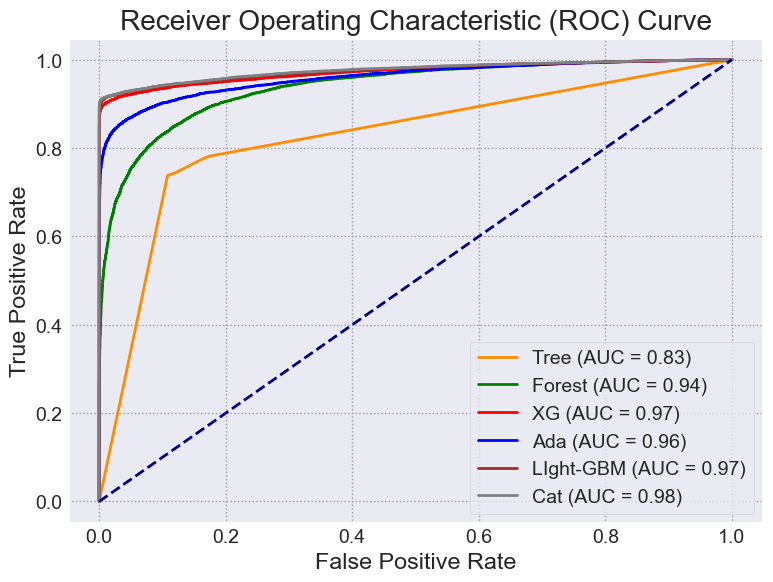

In [93]:
y_prob_tree = decision_tree_model.predict_proba(X_test_resampled)[:, 1]
y_prob_rf = random_forest_model.predict_proba(X_test_resampled)[:, 1]
y_prob_xg = xgb_model.predict_proba(X_test_resampled)[:, 1]
y_prob_ada = adaboost_model.predict_proba(X_test_resampled)[:, 1]
y_prob_lgbm = lgbm_model.predict_proba(X_test_resampled)[:, 1]
y_prob_cat = catboost_model.predict_proba(X_test_resampled)[:, 1]

fpr_tree, tpr_tree, _ = roc_curve(y_test_resampled, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

fpr_rf, tpr_rf, _ = roc_curve(y_test_resampled, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xg, tpr_xg, _ = roc_curve(y_test_resampled, y_prob_xg)
roc_auc_xg = auc(fpr_xg, tpr_xg)

fpr_ada, tpr_ada, _ = roc_curve(y_test_resampled, y_prob_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test_resampled, y_prob_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

fpr_cat, tpr_cat, _ = roc_curve(y_test_resampled, y_prob_cat)
roc_auc_cat = auc(fpr_cat, tpr_cat)

plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label=f'Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xg, tpr_xg, color='red', lw=2, label=f'XG (AUC = {roc_auc_xg:.2f})')
plt.plot(fpr_ada, tpr_ada, color='blue', lw=2, label=f'Ada (AUC = {roc_auc_ada:.2f})')
plt.plot(fpr_lgbm, tpr_lgbm, color='brown', lw=2, label=f'LIght-GBM (AUC = {roc_auc_lgbm:.2f})')
plt.plot(fpr_cat, tpr_cat, color='grey', lw=2, label=f'Cat (AUC = {roc_auc_cat:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Perbandingan AUC pada Data SMOTE vs Data Non SMOTE

In [94]:
tree_auc_noSmote = roc_auc_score(y_test, dt_predictions_nonSmote)
rf_auc_noSmote = roc_auc_score(y_test, rf_predictions_nonSmote)
xgb_auc_noSmote = roc_auc_score(y_test, xgb_predictions_nonSmote)
adaboost_auc_noSmote = roc_auc_score(y_test, adaboost_predictions_nonSmote)
lgbm_auc_noSmote = roc_auc_score(y_test, lgbm_predictions_nonSmote)
catboost_auc_noSmote = roc_auc_score(y_test, catboost_predictions_nonSmote)

print("AUC Data Non SMOTE")
print(f"Tree: {tree_auc_noSmote}")
print(f"Forest: {rf_auc_noSmote}")
print(f"XG Boost: {xgb_auc_noSmote}")
print(f"Ada Boost: {adaboost_auc_noSmote}")
print(f"Light GBM: {lgbm_auc_noSmote}")
print(f"Cat Boost: {catboost_auc_noSmote}")

tree_auc_Smote = roc_auc_score(y_test_resampled, dt_predictions)
rf_auc_Smote = roc_auc_score(y_test_resampled, rf_predictions)
xgb_auc_Smote = roc_auc_score(y_test_resampled, xgb_predictions)
adaboost_auc_Smote = roc_auc_score(y_test_resampled, adaboost_predictions)
lgbm_auc_Smote = roc_auc_score(y_test_resampled, lgbm_predictions)
catboost_auc_Smote = roc_auc_score(y_test_resampled, catboost_predictions)

print("\nAUC Data SMOTE")
print(f"Tree: {tree_auc_Smote}")
print(f"Forest: {rf_auc_Smote}")
print(f"XG Boost: {xgb_auc_Smote}")
print(f"Ada Boost: {adaboost_auc_Smote}")
print(f"Light GBM: {lgbm_auc_Smote}")
print(f"Cat Boost: {catboost_auc_Smote}")

AUC Data Non SMOTE
Tree: 0.5464966471517769
Forest: 0.5026796071666282
XG Boost: 0.5114725365281608
Ada Boost: 0.5045543043688903
Light GBM: 0.5116999234798987
Cat Boost: 0.5081101798901552

AUC Data SMOTE
Tree: 0.8118929895814938
Forest: 0.8486226381776443
XG Boost: 0.9455235740773441
Ada Boost: 0.9051739360762846
Light GBM: 0.9514833127317676
Cat Boost: 0.9532491612219671


### **b. Time Model**
Perbandingan Time pada Data SMOTE vs Data Non SMOTE

In [95]:
print("Time (Menit) Data Non SMOTE")
print(f"Tree: {time_dt_noSmote/60}")
print(f"Forest: {time_rf_noSmote/60}")
print(f"XG Boost: {time_xg_noSmote/60}")
print(f"Ada Boost: {time_ada_noSmote/60}")
print(f"Light GBM: {time_light_noSmote/60}")
print(f"Cat Boost: {time_catboost_noSmote/60}")

print("\nTime (Menit) Data SMOTE")
print(f"Tree: {dt_time_smote/60}")
print(f"Forest: {rf_time_smote/60}")
print(f"XG Boost: {xgb_time_smote/60}")
print(f"Ada Boost: {adaboost_time_smote/60}")
print(f"Light GBM: {lgbm_time_smote/60}")
print(f"Cat Boost: {catboost_time_smote/60}")

Time (Menit) Data Non SMOTE
Tree: 0.06936140855153401
Forest: 10.195803717772167
XG Boost: 0.24266910552978516
Ada Boost: 2.3596055110295615
Light GBM: 0.03345062732696533
Cat Boost: 0.8696362376213074

Time (Menit) Data SMOTE
Tree: 0.18277136087417603
Forest: 30.042759017149606
XG Boost: 0.255399215221405
Ada Boost: 7.0610529263814295
Light GBM: 0.06587697267532348
Cat Boost: 1.5196667989095052


### **c. Recall**
Perbandingan Recall pada Data SMOTE vs Data Non SMOTE

In [96]:
tree_recall_noSmote = recall_score(y_test, dt_predictions_nonSmote)
rf_recall_noSmote = recall_score(y_test, rf_predictions_nonSmote)
xgb_recall_noSmote = recall_score(y_test, xgb_predictions_nonSmote)
adaboost_recall_noSmote = recall_score(y_test, adaboost_predictions_nonSmote)
lgbm_recall_noSmote = recall_score(y_test, lgbm_predictions_nonSmote)
catboost_recall_noSmote = recall_score(y_test, catboost_predictions_nonSmote)

print("Recall Data Non SMOTE")
print(f"Tree: {tree_recall_noSmote}")
print(f"Forest: {rf_recall_noSmote}")
print(f"XG Boost: {xgb_recall_noSmote}")
print(f"Ada Boost: {adaboost_recall_noSmote}")
print(f"Light GBM: {lgbm_recall_noSmote}")
print(f"Cat Boost: {catboost_recall_noSmote}")

tree_recall_Smote = recall_score(y_test_resampled, dt_predictions)
rf_recall_Smote = recall_score(y_test_resampled, rf_predictions)
xgb_recall_Smote = recall_score(y_test_resampled, xgb_predictions)
adaboost_recall_Smote = recall_score(y_test_resampled, adaboost_predictions)
lgbm_recall_Smote = recall_score(y_test_resampled, lgbm_predictions)
catboost_recall_Smote = recall_score(y_test_resampled, catboost_predictions)

print("\nRecall Data SMOTE")
print(f"Tree: {tree_recall_Smote}")
print(f"Forest: {rf_recall_Smote}")
print(f"XG Boost: {xgb_recall_Smote}")
print(f"Ada Boost: {adaboost_recall_Smote}")
print(f"Light GBM: {lgbm_recall_Smote}")
print(f"Cat Boost: {catboost_recall_Smote}")

Recall Data Non SMOTE
Tree: 0.16512820512820514
Forest: 0.006153846153846154
XG Boost: 0.029743589743589743
Ada Boost: 0.010256410256410256
Light GBM: 0.02666666666666667
Cat Boost: 0.019487179487179488

Recall Data SMOTE
Tree: 0.7435105067985167
Forest: 0.7447466007416563
XG Boost: 0.8989934663605863
Ada Boost: 0.8909588557301783
Light GBM: 0.9081758785096239
Cat Boost: 0.9101183118488434


### **d. F1 Score**
Perbandingan F1 Score pada Data SMOTE vs Data Non SMOTE

In [97]:
tree_f1_noSmote = f1_score(y_test, dt_predictions_nonSmote)
rf_f1_noSmote = f1_score(y_test, rf_predictions_nonSmote)
xgb_f1_noSmote = f1_score(y_test, xgb_predictions_nonSmote)
adaboost_f1_noSmote = f1_score(y_test, adaboost_predictions_nonSmote)
lgbm_f1_noSmote = f1_score(y_test, lgbm_predictions_nonSmote)
catboost_f1_noSmote = f1_score(y_test, catboost_predictions_nonSmote)

print("F1 Score Data Non SMOTE")
print(f"Tree: {tree_f1_noSmote}")
print(f"Forest: {rf_f1_noSmote}")
print(f"XG Boost: {xgb_f1_noSmote}")
print(f"Ada Boost: {adaboost_f1_noSmote}")
print(f"Light GBM: {lgbm_f1_noSmote}")
print(f"Cat Boost: {catboost_f1_noSmote}")

tree_f1_Smote = f1_score(y_test_resampled, dt_predictions)
rf_f1_Smote = f1_score(y_test_resampled, rf_predictions)
xgb_f1_Smote = f1_score(y_test_resampled, xgb_predictions)
adaboost_f1_Smote = f1_score(y_test_resampled, adaboost_predictions)
lgbm_f1_Smote = f1_score(y_test_resampled, lgbm_predictions)
catboost_f1_Smote = f1_score(y_test_resampled, catboost_predictions)

print("\nF1 Score Data SMOTE")
print(f"Tree: {tree_f1_Smote}")
print(f"Forest: {rf_f1_Smote}")
print(f"XG Boost: {xgb_f1_Smote}")
print(f"Ada Boost: {adaboost_f1_Smote}")
print(f"Light GBM: {lgbm_f1_Smote}")
print(f"Cat Boost: {catboost_f1_Smote}")

F1 Score Data Non SMOTE
Tree: 0.1648745519713262
Forest: 0.01212121212121212
XG Boost: 0.05365402405180388
Ada Boost: 0.02004008016032064
Light GBM: 0.05009633911368016
Cat Boost: 0.03685741998060136

F1 Score Data SMOTE
Tree: 0.7980855802492537
Forest: 0.8310754224346026
XG Boost: 0.9428650801000092
Ada Boost: 0.9038065382892969
Light GBM: 0.9492870656637904
Cat Boost: 0.9511418685121108


### **e. Perbandingan Ploting**
Ploting Perbandingan Accuracy, Precision, dan Time 

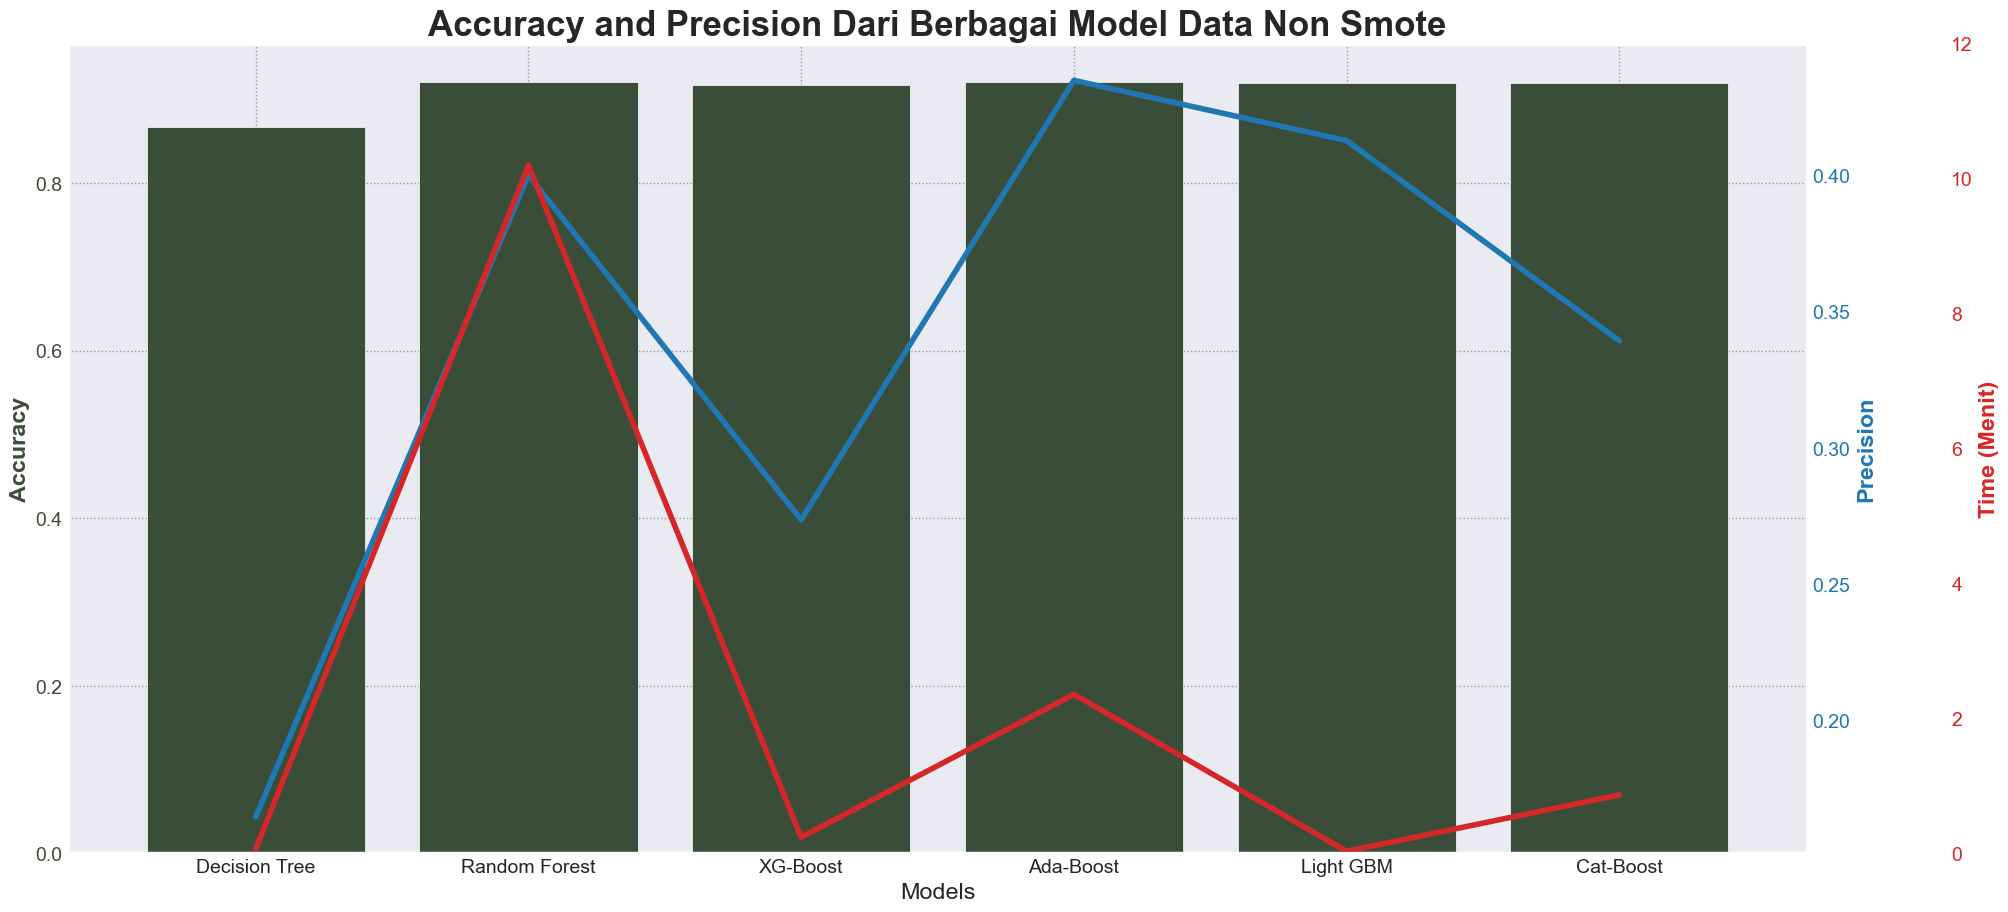

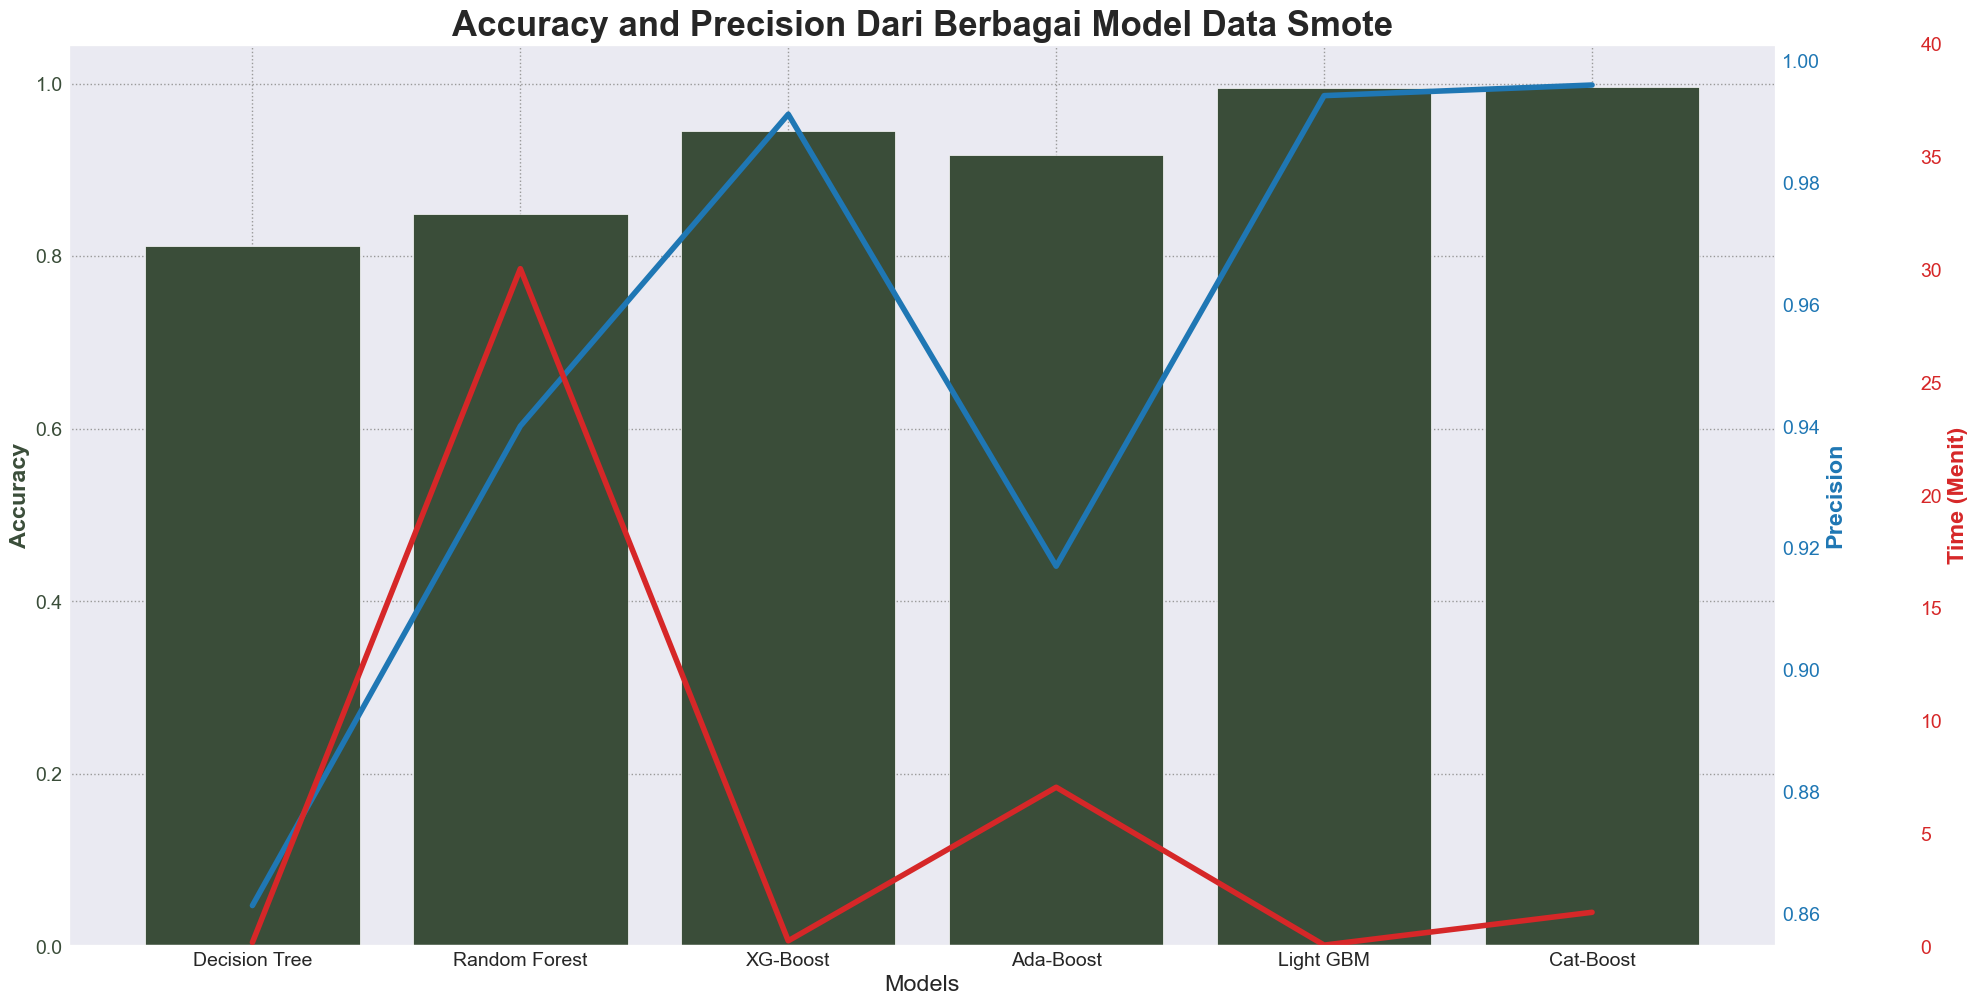

In [98]:
models = ['Decision Tree', 'Random Forest', 'XG-Boost', 'Ada-Boost', 'Light GBM', 'Cat-Boost']
accuracy_noSmote = [dt_accuracy_nonSmote, rf_accuracy_nonSmote, xgb_accuracy_nonSmote, adaboost_accuracy_nonSmote, lgbm_accuracy_nonSmote, catboost_accuracy_nonSmote]
precision_noSmote = [dt_precision_nonSmote, rf_precision_nonSmote, xg_precision_nonSmote, adaboost_precision_nonSmote, lgbm_precision_nonSmote, catboost_precision_nonSmote]
time_noSmote = [(time_dt_noSmote/60), (time_rf_noSmote/60), (time_xg_noSmote/60), (time_ada_noSmote/60), (time_light_noSmote/60), (time_catboost_noSmote/60)]

fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color=pal_1, fontweight='bold')
ax1.bar(models, accuracy_noSmote, color=pal_1)
ax1.tick_params(axis='y', labelcolor=pal_1)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Precision', color=color, fontweight='bold')
ax2.plot(models, precision_noSmote, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 100))
color = 'tab:red'
ax3.set_ylabel('Time (Menit)', color=color, fontweight='bold')
ax3.plot(models, time_noSmote, color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim(0, 12)
ax3.grid(False)
plt.title('Accuracy and Precision Dari Berbagai Model Data Non Smote', fontweight='bold', fontsize=25)
plt.show()

accuracy_Smote = [dt_accuracy, rf_accuracy, xgb_accuracy, adaboost_precision, lgbm_precision, catboost_precision]
precision_Smote = [dt_precision, rf_precision, xgb_precision, adaboost_precision, lgbm_precision, catboost_precision]
time_Smote = [(dt_time_smote/60), (rf_time_smote/60), (xgb_time_smote/60), (adaboost_time_smote/60), (lgbm_time_smote/60), (catboost_time_smote/60)]

fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color=pal_1, fontweight='bold')
ax1.bar(models, accuracy_Smote, color=pal_1)
ax1.tick_params(axis='y', labelcolor=pal_1)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Precision', color=color, fontweight='bold')
ax2.plot(models, precision_Smote, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 100))
color = 'tab:red'
ax3.set_ylabel('Time (Menit)', color=color, fontweight='bold')
ax3.plot(models, time_Smote, color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim(0, 40)
ax3.grid(False)

fig.tight_layout()
plt.title('Accuracy and Precision Dari Berbagai Model Data Smote', fontweight='bold', fontsize=25)
plt.show()

# **6. FEATURES IMPORTANT**

Selanjutnya, kami akan melakukan analisis terhadap fitur-fitur yang tersedia untuk mengidentifikasi fitur-fitur yang memiliki kontribusi atau signifikansi yang tinggi **Features Important** bervariasi pada peminjam yang mengalami keterlambatan pembayaran dan peminjam yang tidak mengalami keterlambatan pembayaran.

In [99]:
print('Top 5 atas :')
print(cat_importance_df.head(5))

Top 5 atas :
                 Feature  Importance
14  DAYS_SINCE_ID_CHANGE   34.756866
12             DAYS_WORK   23.587453
13     DAYS_REGISTRATION   12.484781
11              DAYS_AGE    4.795039
24    APPLY_DAYS_TUESDAY    3.821499


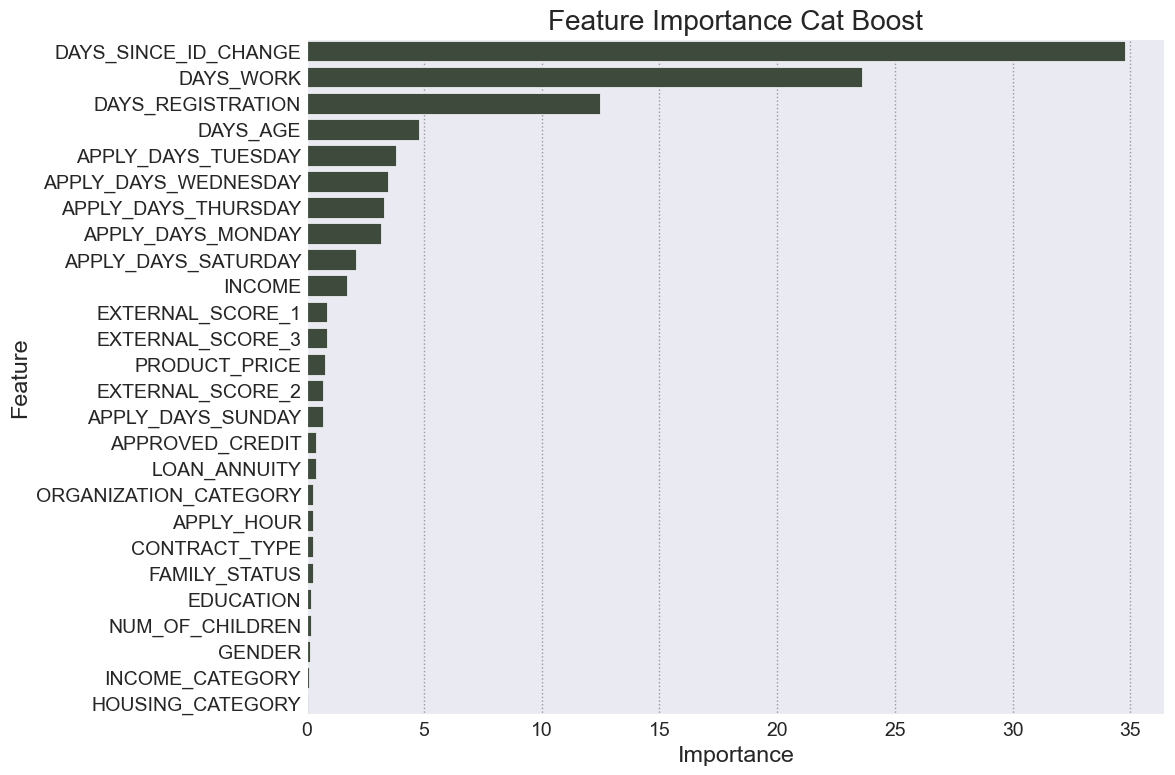

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=cat_importance_df, color=pal_1, saturation=0.7, ci=None)
plt.title('Feature Importance Cat Boost')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.tight_layout(pad=-4)
plt.show()

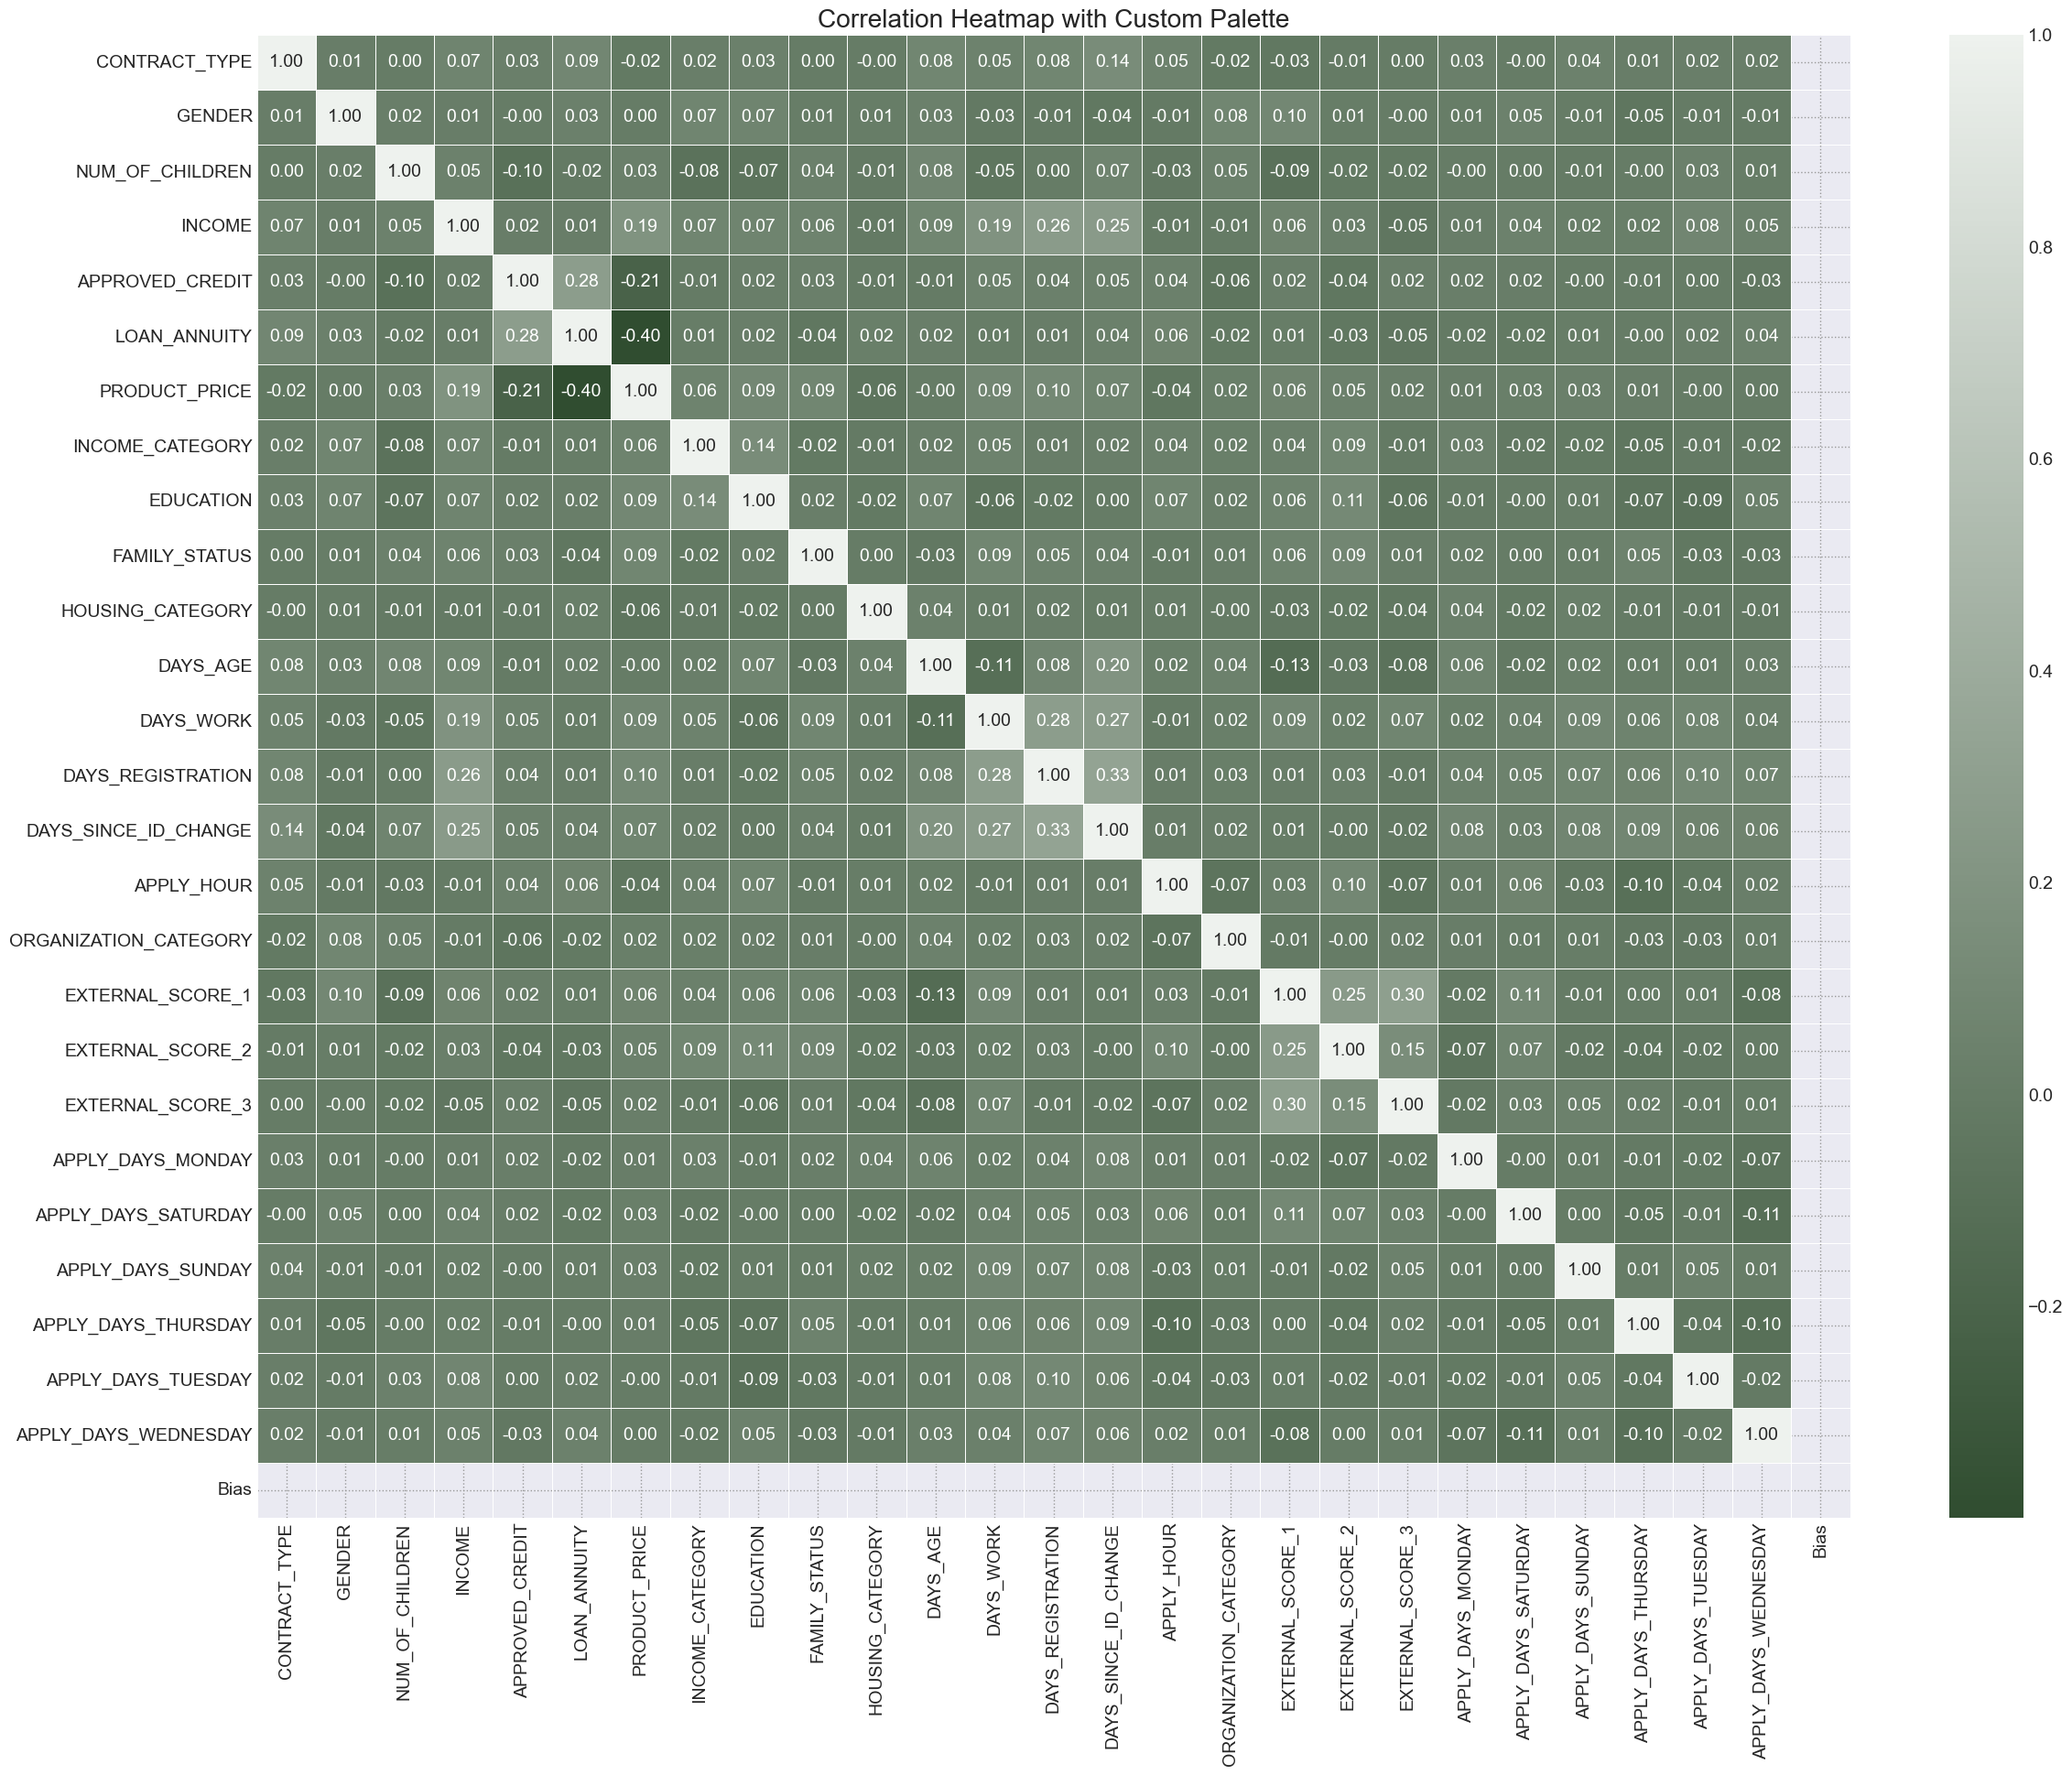

In [101]:
start_color = '#304D30'
green_palette = sns.light_palette(start_color, n_colors=8, reverse=True, as_cmap=True)

correlation_matrix = shap_df.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap=green_palette, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap with Custom Palette')
plt.show()

Analisis kami saat ini difokuskan pada data fitur yang penting yang bersifat khusus untuk individu yang mengalami keterlambatan pembayaran, yaitu data dengan nilai FLAG = 1.

In [102]:
data_important = data_flag_1.copy()
data_important.drop(['DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_SINCE_ID_CHANGE'], axis=1, inplace=True)
data_important.head()

FLAG Jenis Pinjaman Gender  Anak   Bulanan  Pinjaman  Angsuran  \
10     1     Cash loans      F     0  108000.0  225000.0   17775.0   
14     1     Cash loans      M     0  270000.0  889515.0   31644.0   
82     1     Cash loans      F     0   62100.0  314100.0   17167.5   
87     1     Cash loans      F     0  360000.0  443178.0   35145.0   
88     1     Cash loans      F     1  135000.0  550980.0   33835.5   

    Harga Produk             Pekerjaan                     Pendidikan  \
10      225000.0               Working               Higher education   
14      742500.0               Working  Secondary / secondary special   
82      225000.0               Working  Secondary / secondary special   
87      391500.0  Commercial associate               Higher education   
88      450000.0               Working  Secondary / secondary special   

                  Status     Tempat Tinggal Hari Pengajuan  Jam Pengajuan  \
10  Single / not married       With parents      WEDNESDAY             12   
14               Married  House / apartment         MONDAY             14   
82  Single / not married  House / apartment       THURSDAY              9   
87  Single / not married    Co-op apartment         FRIDAY             19   
88               Married  House / apartment        TUESDAY              8   

        Kategori Pekerjaan   Score 1   Score 2   Score 3  Umur  Lama_Bekerja  \
10                   Other  0.000269  0.000010  0.000527    38            20   
14  Business Entity Type 3  0.640231  0.574258  0.706205    45             2   
82              Government  0.299795  0.351055  0.248536    28             5   
87  Business Entity Type 3  0.383590  0.672110  0.095070    27             2   
88            Kindergarten  0.376661  0.728698  0.285180    25             1   

    Pindah_Lokasi  Pergantian_ID  
10              7             11  
14              7              0  
82              5              5  
87             13              7  
88              4              3

In [103]:
data_important[['Pergantian_ID', 'Pindah_Lokasi', 'Bulanan', 'Umur']].describe()

Pergantian_ID  Pindah_Lokasi       Bulanan         Umur
count    6172.000000    6172.000000  6.172000e+03  6172.000000
mean        6.943454      11.825988  1.602046e+05    40.168017
std         4.190282       9.061692  8.234641e+04    11.527529
min         0.000000       0.000000  2.925000e+04    21.000000
25%         3.000000       4.000000  1.125000e+05    31.000000
50%         7.000000      11.000000  1.350000e+05    38.000000
75%        11.000000      18.000000  2.025000e+05    49.000000
max        16.000000      62.000000  1.350000e+06    68.000000

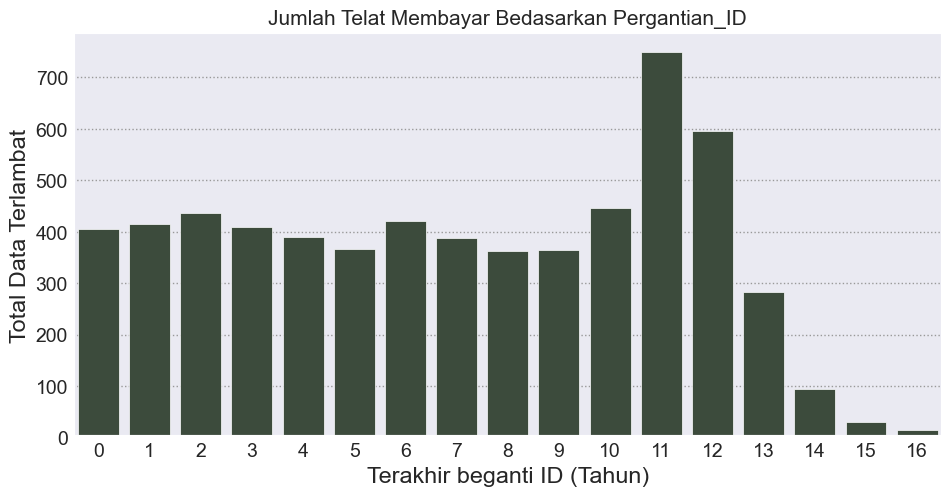

In [104]:
plt.figure(figsize=(10,5))
sns.countplot(x='Pergantian_ID', data=data_important, color=pal_1)
plt.title("Jumlah Telat Membayar Bedasarkan Pergantian_ID", fontsize=15)
plt.ylabel('Total Data Terlambat')
plt.xlabel('Terakhir beganti ID (Tahun)')
plt.show()

Berdasarkan data yang tersedia, rata-rata usia individu yang mengalami keterlambatan pembayaran berkisar antara 0 hingga 16 tahun. Menariknya, ditemukan bahwa individu yang paling sering mengalami keterlambatan pembayaran umumnya terjadi dalam 11 tahun terakhir, dengan kecenderungan mereka untuk mengganti ID.

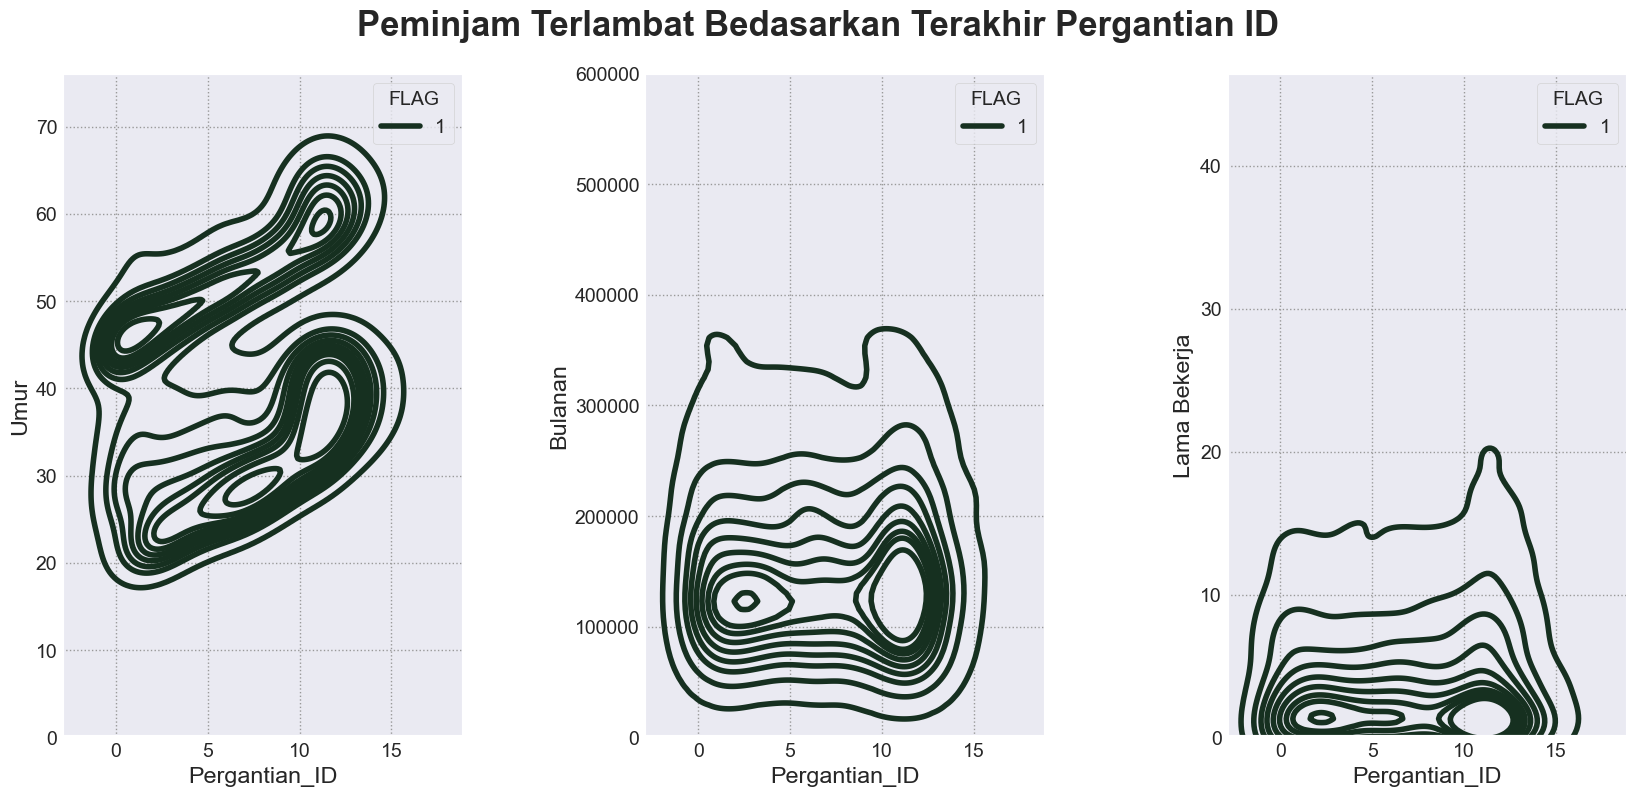

In [105]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

sns.kdeplot(x='Pergantian_ID', y='Umur', hue='FLAG', data=data_flag_1, fill=False, ax=axes[0], palette=pal)
axes[0].set_ylabel("Umur")
axes[0].set_ylim(0, None)

sns.kdeplot(x='Pergantian_ID', y='Bulanan', hue='FLAG', data=data_flag_1, fill=False, ax=axes[1], palette=pal)
axes[1].set_ylabel("Bulanan")
axes[1].set_ylim(0, 600000)

sns.kdeplot(x='Pergantian_ID', y='Lama_Bekerja', hue='FLAG', fill=False, data=data_flag_1, ax=axes[2], palette=pal)
axes[2].set_ylabel("Lama Bekerja")
axes[2].set_ylim(0, None)

plt.suptitle("Peminjam Terlambat Bedasarkan Terakhir Pergantian ID", fontsize=25, fontweight='bold')
plt.subplots_adjust(top=0.9, wspace=0.45)
plt.show()

Individu yang melakukan penggantian ID cenderung memiliki rentang usia antara 20 hingga 70 tahun. Sementara itu, dalam hal pendapatan bulanan, ditemukan bahwa rata-rata pendapatan mereka berkisar antara 100 hingga 180 ribu per bulan. Perlu dicatat bahwa pergantian ID umumnya terjadi dalam rentang 1 hingga 4 tahun sebelum mengajukan pinjaman.

Pada sisi lain, analisis data menunjukkan bahwa individu yang memiliki lama bekerja cenderung berkisar sekitar 1 tahun. Selain itu, mereka juga cenderung melakukan pergantian ID dalam rentang waktu 1 hingga 4 tahun sebelum mengambil pinjaman.

**Pergantian ID dapat menjadi tanda peringatan dini dari keterlambatan pembayaran pinjaman**. Individu yang mengganti ID dalam rentang waktu 1 hingga 4 tahun sebelum mengajukan pinjaman cenderung mengalami keterlambatan pembayaran dengan bulanan yang relatif rendah. Hal ini dapat disebabkan oleh berbagai faktor, seperti:

- Individu tersebut memiliki riwayat kredit yang buruk.
- Individu tersebut sedang mengalami kesulitan keuangan.
- Individu tersebut sedang mencoba menghindari tanggung jawab finansial.

**Lama bekerja yang singkat dapat menjadi tanda peringatan dini dari keterlambatan pembayaran pinjaman**. Individu yang memiliki lama bekerja kurang dari 1 tahun cenderung mengalami keterlambatan pembayaran. Hal ini dapat disebabkan oleh berbagai faktor, seperti:

- Individu tersebut belum memiliki pengalaman kerja yang cukup.
- Individu tersebut belum memiliki penghasilan yang stabil.
- Individu tersebut belum memiliki riwayat kredit yang baik.

### Berikut adalah beberapa langkah yang dapat diambil STC Paylater untuk menerapkan keputusan ini:

1. STC Paylater dapat menambahkan fitur pergantian ID ke dalam model kreditnya. Fitur ini dapat digunakan untuk menghitung skor risiko pinjaman.
2. STC Paylater dapat menerapkan batas pinjaman untuk individu yang telah mengganti ID dalam rentang waktu 1 hingga 4 tahun sebelum mengajukan pinjaman. Hal ini dapat membantu mengurangi risiko kerugian bagi STC Paylater.

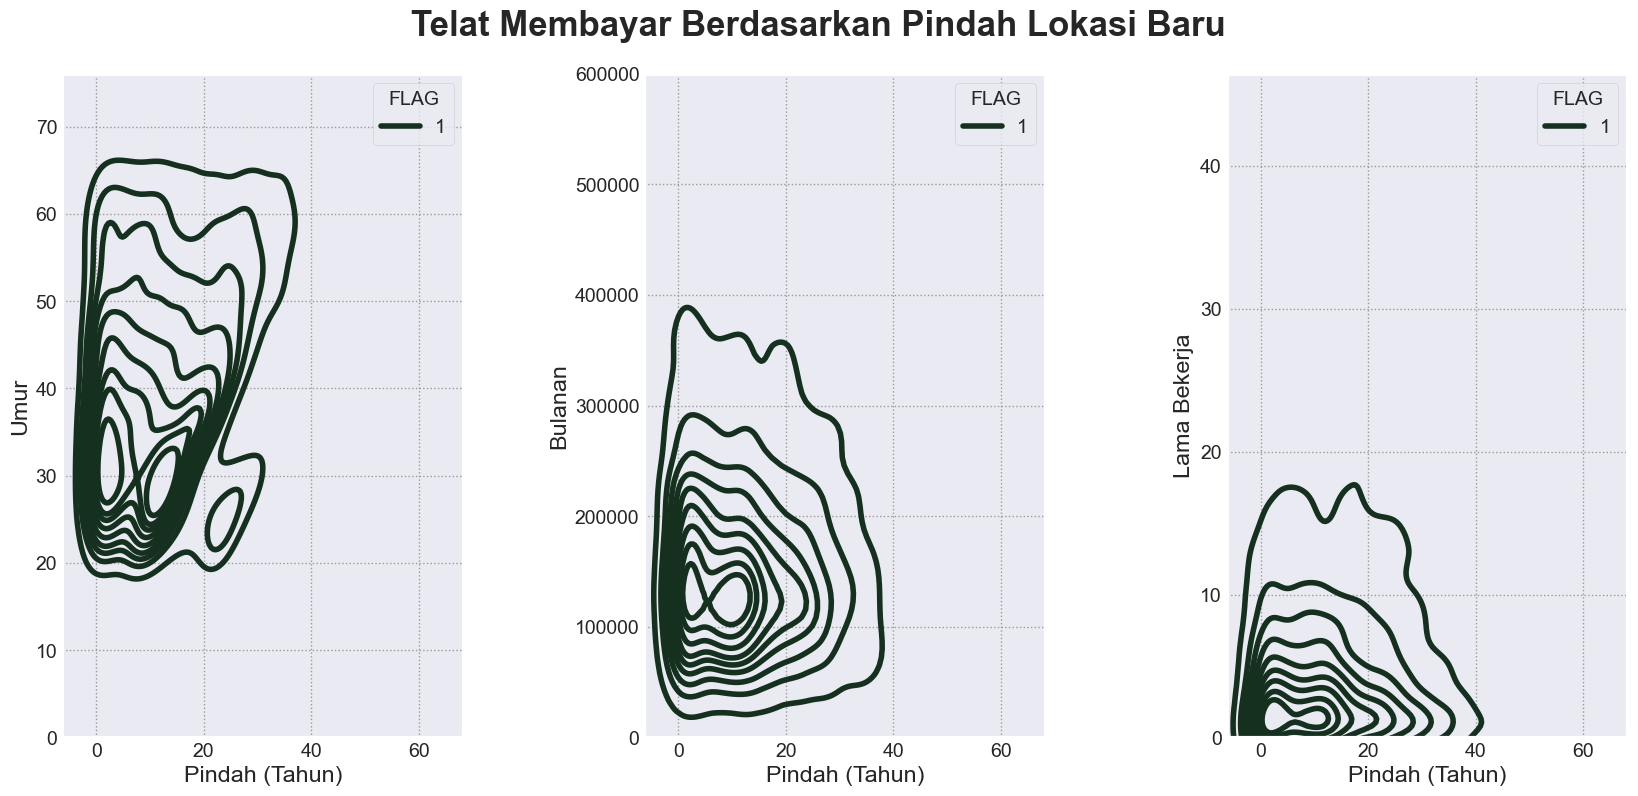

In [106]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

sns.kdeplot(x='Pindah_Lokasi', y='Umur', hue='FLAG', data=data_flag_1, fill=False, ax=axes[0], palette=pal)
axes[0].set_ylabel("Umur")
axes[0].set_xlabel("Pindah (Tahun)")
axes[0].set_ylim(0, None)

sns.kdeplot(x='Pindah_Lokasi', y='Bulanan', hue='FLAG', data=data_flag_1, fill=False, ax=axes[1], palette=pal)
axes[1].set_ylabel("Bulanan")
axes[1].set_xlabel("Pindah (Tahun)")
axes[1].set_ylim(0, 600000)

sns.kdeplot(x='Pindah_Lokasi', y='Lama_Bekerja', hue='FLAG', fill=False, data=data_flag_1, ax=axes[2], palette=pal)
axes[2].set_ylabel("Lama Bekerja")
axes[2].set_xlabel("Pindah (Tahun)")
axes[2].set_ylim(0, None)

fig.suptitle('Telat Membayar Berdasarkan Pindah Lokasi Baru', fontsize=25, fontweight='bold')
plt.subplots_adjust(top=0.9, wspace=0.45)
plt.show()

Dalam analisis lebih lanjut terkait individu yang pindah ke lokasi baru, ditemukan bahwa rentang usia mereka berkisar antara 20 hingga 60 tahun, dengan durasi perpindahan yang bervariasi dari 0 hingga 40 tahun. Meskipun variasi umur dan durasi perpindahan cukup luas, data menunjukkan kecenderungan terfokus pada rentang umur 25 hingga 35 tahun, dengan perpindahan lokasi sekitar baru saja pindah hingga 5 tahun di lokasi baru dengan pendapatan individu setelah pindah ke lokasi baru cenderung berkisar antara 100 hingga 150 ribu, sementara lama kerja mereka umumnya minimal satu tahun.

1. STC Paylater dapat menerapkan batas pinjaman untuk individu yang telah pindah ke lokasi baru dalam waktu kurang dari 5 tahun, memiliki pendapatan bulanan kurang dari 150 ribu, atau memiliki lama kerja kurang dari 1 tahun. Hal ini dapat membantu mengurangi risiko kerugian bagi STC Paylater.

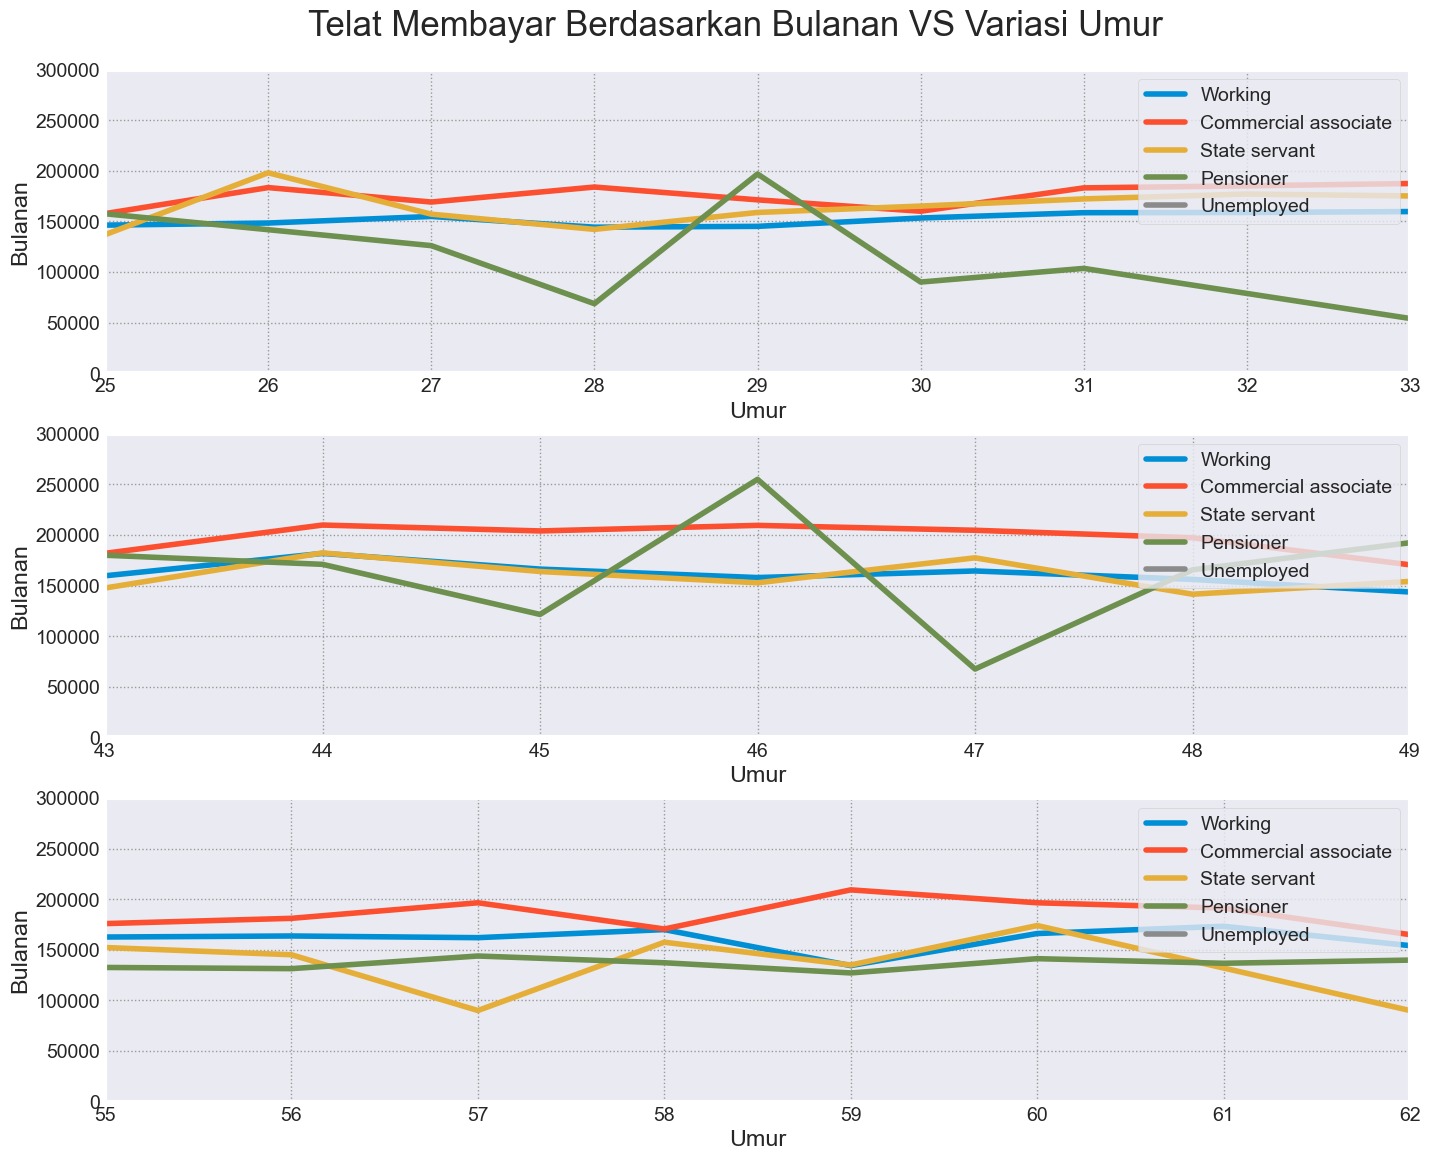

In [107]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

sns.lineplot(data=data_important, x='Umur', y='Bulanan', hue='Pekerjaan', ci=None, ax=axes[0])
axes[0].set_title('')
axes[0].set_xlabel('Umur')
axes[0].set_ylabel('Bulanan')
axes[0].set_xlim(25, 33)
axes[0].set_ylim(0, 300000)
axes[0].legend(loc='upper right')

sns.lineplot(data=data_important, x='Umur', y='Bulanan', hue='Pekerjaan', ci=None, ax=axes[1])
axes[1].set_title('')
axes[1].set_xlabel('Umur')
axes[1].set_ylabel('Bulanan')
axes[1].set_xlim(43, 49)
axes[1].set_ylim(0, 300000)
axes[1].legend(loc='upper right')

sns.lineplot(data=data_important, x='Umur', y='Bulanan', hue='Pekerjaan', ci=None, ax=axes[2])
axes[2].set_title('')
axes[2].set_xlabel('Umur')
axes[2].set_ylabel('Bulanan')
axes[2].set_xlim(55, 62)
axes[2].set_ylim(0, 300000)
axes[2].legend(loc='upper right')


fig.suptitle('Telat Membayar Berdasarkan Bulanan VS Variasi Umur', fontsize=25)
plt.subplots_adjust(top=0.93, wspace=0.2)
plt.show()

Dalam data beberapa individu yang mengalami keterlambatan pembayaran dengan rentang usia 25 hingga 33 tahun, terdapat temuan bahwa pensioner (pensiunan) memiliki pendapatan yang berbeda beda dengan kisaran sekitar 50 hingga 200 ribu per bulan. Hal ini menunjukkan kemungkinan tinggi bagi mereka untuk mengalami keterlambatan dalam melakukan pembayaran sesuai dengan waktu yang ditentukan.

Selain itu, dalam rentang usia 43 hingga 49 tahun, beberapa individu pensioner juga menunjukkan pola yang serupa dengan pendapatan yang tidak stabil. Rentang penghasilan bulanan untuk beberapa data individu pensioner berbeda-beda, berkisar antara 75 hingga 250 ribu per bulan. Hal ini menunjukkan adanya variasi dalam kemampuan pembayaran, yang dapat mempengaruhi ketepatan waktu dalam melunasi kewajiban.

# **7. RECOMENDATION**

### **Rekomendasi:**<br>
Penetapan kebijakan kredit STC berdasarkan analisis fitur importance dari model CAT-Boost menghasilkan rekomendasi yang terstruktur dan efektif. Dengan merangkumnya dalam "P3KS" (Pedoman Penetapan Pinjaman dan Kelayakan STC), perusahaan dapat meningkatkan proses penilaian kredit dengan mempertimbangkan faktor-faktor kritis seperti lama bekerja, perubahan ID, dan lokasi baru. Rekomendasi ini diharapkan dapat mengoptimalkan keputusan pemberian pinjaman, mengurangi risiko keterlambatan pembayaran, dan meningkatkan kepercayaan dari berbagai segmen peminjam. Berikut merupakan rumusan rekomendasi yang peneliti usulkan.<br>
![Rumusan.png](../Image/Rumusan.png)